In [1]:
#Essential data science libraries
import pandas as pd
import seaborn as sns
import glob
import pickle
import os
%pylab inline

from IPython.display import display, HTML

# # Feature engineering
# import featuretools as ft
# from featuretools import selection

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [24]:
def categories_uniques(df):
    """
    Cette fonction prend en entrée un DataFrame et affiche des informations 
    sur les colonnes qualitatives, notamment le nombre de valeurs uniques,
    le pourcentage de valeurs nulles, et si une colonne a moins de 11 valeurs 
    uniques, elle affiche également un graphique montrant la distribution de ces valeurs.
    """
    
    # Réinitialisation de l'index du DataFrame
    df = df.reset_index()
    
    # Sélection des colonnes qualitatives
    df_qualitatif = df.select_dtypes(include=['object'])
    print(f"-->Nombre de colonnes qualitatives: {len(df_qualitatif.columns)}")
    print('\n')
    for colonne in df_qualitatif:
        print(f"Nom de la colonne : {colonne}")
        
        # Affichage du nombre de valeurs uniques pour la colonne
        print(f"Nombre de valeurs uniques : {df_qualitatif[colonne].nunique()}")
        
        # Calcul et affichage du pourcentage de valeurs nulles pour la colonne
        print(f"Pourcentage de valeurs nulles : {(df_qualitatif[colonne].isnull().sum()) / len(df):.2%}")
        print("===========================")
        print('\n')
        # Si le nombre de valeurs uniques est inférieur à 11, affichez les valeurs et leur distribution
        if df_qualitatif[colonne].nunique() < 11:
            print(df_qualitatif[colonne].unique())
            print(f"{df_qualitatif[colonne].value_counts().to_string(header=None)}")
            
            # Visualisation de la distribution des valeurs
            plt.figure(figsize=(20, 6))  
            sns.countplot(data=df, x=colonne)
            plt.title(f"Distribution des valeurs pour la colonne : {colonne}")  # Ajout d'un titre
            plt.show()
            
            print("_________________________________")


            
            
# Fonction pour calculer les valeurs manquantes par colonne

def tableau_valeurs_manquantes(df):
    # Total de valeurs manquantes
    val_manquantes = df.isnull().sum()
    
    # Pourcentage de valeurs manquantes
    pourcentage_val_manquantes = 100 * df.isnull().sum() / len(df)
    
    # Création d'un tableau avec les résultats
    tableau_val_manquantes = pd.concat([val_manquantes, pourcentage_val_manquantes], axis=1)
    
    # Renommage des colonnes
    tableau_colonnes_renommees = tableau_val_manquantes.rename(
        columns = {0 : 'Valeurs Manquantes', 1 : '% du Total des Valeurs'})
    
    # Trie le tableau par pourcentage de valeurs manquantes décroissant
    tableau_colonnes_renommees = tableau_colonnes_renommees[
        tableau_colonnes_renommees.iloc[:,1] != 0].sort_values(
    '% du Total des Valeurs', ascending=False).round(1)
    
    # Affiche un résumé
    print("Votre dataframe choisi a " + str(df.shape[1]) + " colonnes.\n"      
          "Il y a " + str(tableau_colonnes_renommees.shape[0]) +
          " colonnes qui ont des valeurs manquantes.")
    
    # Retourne le dataframe avec les informations sur les valeurs manquantes
    return tableau_colonnes_renommees


In [3]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
pd.set_option("max_colwidth", 400)


In [101]:
#Graphing…
#plt.style.use('seaborn-whitegrid')
plt.style.use('grayscale')
# plt.style.use('fivethirtyeight')
plt.rcParams.update(
    {
     'xtick.labelsize':20,
     'ytick.labelsize':20,
     'axes.labelsize': 20,
     'legend.fontsize': 20,
     'axes.titlesize':30,
     'axes.titleweight':'bold',
     'axes.titleweight':'bold'
    })

In [5]:
# voir les versions des packages
!pip list

Package             Version
------------------- ---------
Bottleneck          1.3.5
Brotli              1.0.9
certifi             2023.7.22
charset-normalizer  3.2.0
cloudpickle         2.2.1
colorama            0.4.6
featuretools        1.27.0
holidays            0.30
idna                3.4
importlib-resources 6.0.1
joblib              1.3.2
mkl-service         2.4.0
numexpr             2.8.4
numpy               1.22.3
packaging           23.1
pandas              1.5.3
pip                 23.2.1
platformdirs        3.10.0
pooch               1.7.0
protobuf            3.20.3
psutil              5.9.0
PySocks             1.7.1
python-dateutil     2.8.2
pytz                2023.3
requests            2.31.0
scikit-learn        1.3.0
scipy               1.10.1
setuptools          68.0.0
six                 1.16.0
threadpoolctl       3.2.0
tqdm                4.66.1
typing_extensions   4.7.1
tzdata              2023.3
urllib3             2.0.4
wheel               0.38.4
win-inet-pton      

## 1. Description des données <a class="anchor" id="partie1"></a>

In [6]:
def data_describe(folder):
    '''Check the number of rows, columns, missing values and duplicates.
       Count type of columns.
       Memory indication'''

    data_dict = {}
    for file in folder:
        try:
            data = pd.read_csv(file)  # Try with utf-8 first
        except UnicodeDecodeError:
            data = pd.read_csv(file, encoding='ISO-8859-1')  # If it fails, try with 'ISO-8859-1'
        data_dict[file] = [data.shape[0], 
                           data.shape[1],
                            round(data.isna().sum().sum()/data.size*100, 2),
                            round(data.duplicated().sum().sum()/data.size*100, 2),
                            data.select_dtypes(include=['object']).shape[1],
                            data.select_dtypes(include=['float']).shape[1],
                            data.select_dtypes(include=['int']).shape[1],
                            data.select_dtypes(include=['bool']).shape[1],
                            round(data.memory_usage().sum()/1024**2, 3)]

        comparative_table = pd.DataFrame.from_dict(data = data_dict, 
                                                   columns = ['Rows', 'Columns', '%NaN', '%Duplicate', 
                                                              'object_dtype','float_dtype', 'int_dtype', 
                                                              'bool_dtype', 'MB_Memory'], 
                                                   orient='index')
    print("SUMMARY FILES…")
    return(comparative_table)

In [7]:
print("CHECKLIST DATA EXPLORER :")
display(os.listdir('./data/'))

CHECKLIST DATA EXPLORER :


['application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'sample_submission.csv']

In [8]:
#Data description
data_describe(folder = glob.glob('.//data//*.csv'))

SUMMARY FILES…


Rows  Columns   %NaN   
.//data\application_test.csv                   48744      121  23.81  \
.//data\application_train.csv                 307511      122  24.40   
.//data\bureau.csv                           1716428       17  13.50   
.//data\bureau_balance.csv                  27299925        3   0.00   
.//data\credit_card_balance.csv              3840312       23   6.65   
.//data\HomeCredit_columns_description.csv       219        5  12.15   
.//data\installments_payments.csv           13605401        8   0.01   
.//data\POS_CASH_balance.csv                10001358        8   0.07   
.//data\previous_application.csv             1670214       37  17.98   
.//data\sample_submission.csv                  48744        2   0.00   

                                            %Duplicate  object_dtype   
.//data\application_test.csv                       0.0            16  \
.//data\application_train.csv                      0.0            16   
.//data\bureau.csv                                 0.0             3   
.//data\bureau_balance.csv                         0.0             1   
.//data\credit_card_balance.csv                    0.0             1   
.//data\HomeCredit_columns_description.csv         0.0             4   
.//data\installments_payments.csv                  0.0             0   
.//data\POS_CASH_balance.csv                       0.0             1   
.//data\previous_application.csv                   0.0            16   
.//data\sample_submission.csv                      0.0             0   

                                            float_dtype  int_dtype   
.//data\application_test.csv                         65         40  \
.//data\application_train.csv                        65         41   
.//data\bureau.csv                                    8          6   
.//data\bureau_balance.csv                            0          2   
.//data\credit_card_balance.csv                      15          7   
.//data\HomeCredit_columns_description.csv            0          1   
.//data\installments_payments.csv                     5          3   
.//data\POS_CASH_balance.csv                          2          5   
.//data\previous_application.csv                     15          6   
.//data\sample_submission.csv                         1          1   

                                            bool_dtype  MB_Memory  
.//data\application_test.csv                         0     44.998  
.//data\application_train.csv                        0    286.227  
.//data\bureau.csv                                   0    222.620  
.//data\bureau_balance.csv                           0    624.846  
.//data\credit_card_balance.csv                      0    673.883  
.//data\HomeCredit_columns_description.csv           0      0.008  
.//data\installments_payments.csv                    0    830.408  
.//data\POS_CASH_balance.csv                         0    610.435  
.//data\previous_application.csv                     0    471.481  
.//data\sample_submission.csv                        0      0.744

In [9]:
def features(folder):
    '''Comparative data with missing values, 
       and many descriptive statistics.'''
    
    data_object = {}
    data_numeric = {}
    
    for file in folder:
        try:
            data = pd.read_csv(file)  # Try with utf-8 first
        except UnicodeDecodeError:
            data = pd.read_csv(file, encoding='ISO-8859-1')  # If it fails, try with 'ISO-8859-1'
        
        data_object[file] = [(x, data[x].dtype, 
                              data[x].isna().sum().sum(),
                              int(data[x].count())) for x in data.select_dtypes(exclude=['int', 'float'])]
        
        data_numeric[file] = [(x, data[x].dtype, 
                               int(data[x].isna().sum().sum()), 
                               int(data[x].count()), 
                               int(data[x].mean()), 
                               round(data[x].std(),1),
                               round(data[x].min(),1), 
                               round(data[x].max(),1)) for x in data.select_dtypes(exclude='object')]
        

    comparative_object = pd.DataFrame.from_dict(data = data_object, orient='index')
    dict_of_object = {name: pd.DataFrame(file) for name,file in data_object.items()}
    df1 = pd.concat(dict_of_object, axis=0)
    df1.columns=['features','dtype','nan','count']
    
    comparative_numeric = pd.DataFrame.from_dict(data = data_numeric, orient='index')
    dict_of_numeric = {name: pd.DataFrame(file) for name,file in data_numeric.items()}
    df2 = pd.concat(dict_of_numeric, axis=0)
    df2.columns=['features','dtype','nan','count', 'mean', 'std', 'min','max']
        
    return df1, df2

In [10]:
#Data description
features(folder=glob.glob('.//data//*.csv'))[0]

features   
.//data\application_test.csv               0            NAME_CONTRACT_TYPE  \
                                           1                   CODE_GENDER   
                                           2                  FLAG_OWN_CAR   
                                           3               FLAG_OWN_REALTY   
                                           4               NAME_TYPE_SUITE   
                                           5              NAME_INCOME_TYPE   
                                           6           NAME_EDUCATION_TYPE   
                                           7            NAME_FAMILY_STATUS   
                                           8             NAME_HOUSING_TYPE   
                                           9               OCCUPATION_TYPE   
                                           10   WEEKDAY_APPR_PROCESS_START   
                                           11            ORGANIZATION_TYPE   
                                           12           FONDKAPREMONT_MODE   
                                           13               HOUSETYPE_MODE   
                                           14           WALLSMATERIAL_MODE   
                                           15          EMERGENCYSTATE_MODE   
.//data\application_train.csv              0            NAME_CONTRACT_TYPE   
                                           1                   CODE_GENDER   
                                           2                  FLAG_OWN_CAR   
                                           3               FLAG_OWN_REALTY   
                                           4               NAME_TYPE_SUITE   
                                           5              NAME_INCOME_TYPE   
                                           6           NAME_EDUCATION_TYPE   
                                           7            NAME_FAMILY_STATUS   
                                           8             NAME_HOUSING_TYPE   
                                           9               OCCUPATION_TYPE   
                                           10   WEEKDAY_APPR_PROCESS_START   
                                           11            ORGANIZATION_TYPE   
                                           12           FONDKAPREMONT_MODE   
                                           13               HOUSETYPE_MODE   
                                           14           WALLSMATERIAL_MODE   
                                           15          EMERGENCYSTATE_MODE   
.//data\bureau.csv                         0                 CREDIT_ACTIVE   
                                           1               CREDIT_CURRENCY   
                                           2                   CREDIT_TYPE   
.//data\bureau_balance.csv                 0                        STATUS   
.//data\credit_card_balance.csv            0          NAME_CONTRACT_STATUS   
.//data\HomeCredit_columns_description.csv 0                         Table   
                                           1                           Row   
                                           2                   Description   
                                           3                       Special   
.//data\POS_CASH_balance.csv               0          NAME_CONTRACT_STATUS   
.//data\previous_application.csv           0            NAME_CONTRACT_TYPE   
                                           1    WEEKDAY_APPR_PROCESS_START   
                                           2   FLAG_LAST_APPL_PER_CONTRACT   
                                           3        NAME_CASH_LOAN_PURPOSE   
                                           4          NAME_CONTRACT_STATUS   
                                           5             NAME_PAYMENT_TYPE   
                                           6            CODE_REJECT_REASON   
                                           7               NAME_TYPE_SUITE   
                                           8              NAME_CLIENT_TYPE   
          

In [11]:
#Data description
features(folder=glob.glob('.//data//*.csv'))[1]

features   
.//data\application_test.csv               0                      SK_ID_CURR  \
                                           1                    CNT_CHILDREN   
                                           2                AMT_INCOME_TOTAL   
                                           3                      AMT_CREDIT   
                                           4                     AMT_ANNUITY   
                                           5                 AMT_GOODS_PRICE   
                                           6      REGION_POPULATION_RELATIVE   
                                           7                      DAYS_BIRTH   
                                           8                   DAYS_EMPLOYED   
                                           9               DAYS_REGISTRATION   
                                           10                DAYS_ID_PUBLISH   
                                           11                    OWN_CAR_AGE   
                                           12                     FLAG_MOBIL   
                                           13                 FLAG_EMP_PHONE   
                                           14                FLAG_WORK_PHONE   
                                           15               FLAG_CONT_MOBILE   
                                           16                     FLAG_PHONE   
                                           17                     FLAG_EMAIL   
                                           18                CNT_FAM_MEMBERS   
                                           19           REGION_RATING_CLIENT   
                                           20    REGION_RATING_CLIENT_W_CITY   
                                           21        HOUR_APPR_PROCESS_START   
                                           22     REG_REGION_NOT_LIVE_REGION   
                                           23     REG_REGION_NOT_WORK_REGION   
                                           24    LIVE_REGION_NOT_WORK_REGION   
                                           25         REG_CITY_NOT_LIVE_CITY   
                                           26         REG_CITY_NOT_WORK_CITY   
                                           27        LIVE_CITY_NOT_WORK_CITY   
                                           28                   EXT_SOURCE_1   
                                           29                   EXT_SOURCE_2   
                                           30                   EXT_SOURCE_3   
                                           31                 APARTMENTS_AVG   
                                           32               BASEMENTAREA_AVG   
                                           33    YEARS_BEGINEXPLUATATION_AVG   
                                           34                YEARS_BUILD_AVG   
                                           35                 COMMONAREA_AVG   
                                           36                  ELEVATORS_AVG   
                                           37                  ENTRANCES_AVG   
                                           38                  FLOORSMAX_AVG   
                                           39                  FLOORSMIN_AVG   
                                           40                   LANDAREA_AVG   
                                           41           LIVINGAPARTMENTS_AVG   
                                           42                 LIVINGAREA_AVG   
                                           43        NONLIVINGAPARTMENTS_AVG   
                                           44              NONLIVINGAREA_AVG   
                                           45                APARTMENTS_MODE   
                                           46              BASEMENTAREA_MODE   
                                           47   YEARS_BEGINEXPLUATATION_MODE   
                                           48               YEARS_BUILD_MODE   
                                           49                COMMONA

##### HomeCredit_columns_description

In [149]:
df_description = pd.read_csv('.//data//HomeCredit_columns_description.csv', encoding='ISO-8859-1')

display(HTML('<span style="font-size: 15px; font-weight: bold;">INFO:</span>'))
print(df_description.info())
print('_____________________________')
display(HTML('<span style="font-size: 15px; font-weight: bold;">Nunique:</span>'))
print(df_description.nunique())
df_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   219 non-null    int64 
 1   Table        219 non-null    object
 2   Row          219 non-null    object
 3   Description  219 non-null    object
 4   Special      86 non-null     object
dtypes: int64(1), object(4)
memory usage: 8.7+ KB
None
_____________________________


Unnamed: 0     219
Table            7
Row            196
Description    163
Special          7
dtype: int64


Unnamed: 0                         Table                           Row   
0             1  application_{train|test}.csv                    SK_ID_CURR  \
1             2  application_{train|test}.csv                        TARGET   
2             5  application_{train|test}.csv            NAME_CONTRACT_TYPE   
3             6  application_{train|test}.csv                   CODE_GENDER   
4             7  application_{train|test}.csv                  FLAG_OWN_CAR   
5             8  application_{train|test}.csv               FLAG_OWN_REALTY   
6             9  application_{train|test}.csv                  CNT_CHILDREN   
7            10  application_{train|test}.csv              AMT_INCOME_TOTAL   
8            11  application_{train|test}.csv                    AMT_CREDIT   
9            12  application_{train|test}.csv                   AMT_ANNUITY   
10           13  application_{train|test}.csv               AMT_GOODS_PRICE   
11           14  application_{train|test}.csv               NAME_TYPE_SUITE   
12           15  application_{train|test}.csv              NAME_INCOME_TYPE   
13           16  application_{train|test}.csv           NAME_EDUCATION_TYPE   
14           17  application_{train|test}.csv            NAME_FAMILY_STATUS   
15           18  application_{train|test}.csv             NAME_HOUSING_TYPE   
16           19  application_{train|test}.csv    REGION_POPULATION_RELATIVE   
17           20  application_{train|test}.csv                    DAYS_BIRTH   
18           21  application_{train|test}.csv                 DAYS_EMPLOYED   
19           22  application_{train|test}.csv             DAYS_REGISTRATION   
20           23  application_{train|test}.csv               DAYS_ID_PUBLISH   
21           24  application_{train|test}.csv                   OWN_CAR_AGE   
22           25  application_{train|test}.csv                    FLAG_MOBIL   
23           26  application_{train|test}.csv                FLAG_EMP_PHONE   
24           27  application_{train|test}.csv               FLAG_WORK_PHONE   
25           28  application_{train|test}.csv              FLAG_CONT_MOBILE   
26           29  application_{train|test}.csv                    FLAG_PHONE   
27           30  application_{train|test}.csv                    FLAG_EMAIL   
28           31  application_{train|test}.csv               OCCUPATION_TYPE   
29           32  application_{train|test}.csv               CNT_FAM_MEMBERS   
30           33  application_{train|test}.csv          REGION_RATING_CLIENT   
31           34  application_{train|test}.csv   REGION_RATING_CLIENT_W_CITY   
32           35  application_{train|test}.csv    WEEKDAY_APPR_PROCESS_START   
33           36  application_{train|test}.csv       HOUR_APPR_PROCESS_START   
34           37  application_{train|test}.csv    REG_REGION_NOT_LIVE_REGION   
35           38  application_{train|test}.csv    REG_REGION_NOT_WORK_REGION   
36           39  application_{train|test}.csv   LIVE_REGION_NOT_WORK_REGION   
37           40  application_{train|test}.csv        REG_CITY_NOT_LIVE_CITY   
38           41  application_{train|test}.csv        REG_CITY_NOT_WORK_CITY   
39           42  application_{train|test}.csv       LIVE_CITY_NOT_WORK_CITY   
40           43  application_{train|test}.csv             ORGANIZATION_TYPE   
41           44  application_{train|test}.csv                  EXT_SOURCE_1   
42           45  application_{train|test}.csv                  EXT_SOURCE_2   
43           46  application_{train|test}.csv                  EXT_SOURCE_3   
44           47  application_{train|test}.csv                APARTMENTS_AVG   
45           48  application_{train|test}.csv              BASEMENTAREA_AVG   
46           49  application_{train|test}.csv   YEARS_BEGINEXPLUATATION_AVG   
47           50  application_{train|test}.csv               YEARS_BUILD_AVG   
48           51  application_{train|test}.csv                COMMONAREA_AVG   
49           52  application_{train|test}.csv          

##### EDA application_train | test

In [12]:
df_train = pd.read_csv('.//data//application_train.csv').sort_values("SK_ID_CURR")
df_test = pd.read_csv('.//data//application_test.csv').sort_values("SK_ID_CURR")


In [13]:
df_train.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
0      100002       1         Cash loans           M            N  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY   
0               Y             0          202500.0    406597.5      24700.5  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE   
0         351000.0   Unaccompanied          Working  \
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE   
0  Secondary / secondary special  Single / not married  House / apartment  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION   
0                    0.018801       -9461           -637            -3648.0  \
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE   
0            -2120          NaN           1               1                0  \
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS   
0                 1           1           0        Laborers              1.0  \
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY   
0                     2                            2  \
1                     1                            1   
2                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START   
0                  WEDNESDAY                       10  \
1                     MONDAY                       11   
2                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION   
0                           0                           0  \
1                           0                           0   
2                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY   
0                            0                       0  \
1                            0                       0   
2                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE   
0                       0                        0  Business Entity Type 3  \
1                       0                        0                  School   
2                       0                        0              Government   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG   
0      0.083037      0.262949      0.139376          0.0247            0.0369  \
1      0.311267      0.622246           NaN          0.0959            0.0529   
2           NaN      0.555912      0.729567             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG   
0                       0.9722           0.6192          0.0143  \
1                       0.9851           0.7960          0.0605   
2                          NaN              NaN             NaN   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG   
0     

Avec le nombre élevé de colonnes que vous avez dans votre dataframe, une présentation détaillée de chaque colonne serait très longue. Néanmoins, je peux fournir une description générale basée sur les noms des colonnes et le contexte.

1. **Identifiants et cibles**:
   - `SK_ID_CURR`: Identifiant unique du client.
   - `TARGET`: La variable cible, probablement indiquant si un événement particulier s'est produit (par exemple, si un prêt a été en défaut).

2. **Informations personnelles**:
   - `NAME_CONTRACT_TYPE`, `CODE_GENDER`, `FLAG_OWN_CAR`, `FLAG_OWN_REALTY`, etc.: Informations démographiques et de base sur le client, telles que le type de contrat, le sexe, la possession de voiture et de biens immobiliers.

3. **Informations financières**:
   - `AMT_INCOME_TOTAL`, `AMT_CREDIT`, `AMT_ANNUITY`, etc.: Détails financiers du client tels que le revenu total, le montant du crédit, les annuités, etc.

4. **Historique du travail et de la vie**:
   - `DAYS_BIRTH`, `DAYS_EMPLOYED`, `DAYS_REGISTRATION`, etc.: Informations sur l'âge, les jours depuis l'embauche, les jours depuis l'enregistrement, etc.

5. **Détails de contact**:
   - `FLAG_MOBIL`, `FLAG_EMP_PHONE`, etc.: Indicateurs sur les différents types de numéros de téléphone et de contacts que le client possède.

6. **Informations sur le logement**:
   - `APARTMENTS_AVG`, `BASEMENTAREA_AVG`, etc. (et les versions `_MODE` et `_MEDI`): Informations sur les caractéristiques de la résidence du client, telles que la superficie moyenne de l'appartement, la superficie du sous-sol, etc.

7. **Évaluation des risques**:
   - `EXT_SOURCE_1`, `EXT_SOURCE_2`, `EXT_SOURCE_3`: Scores d'une source externe évaluant probablement la solvabilité ou d'autres facteurs de risque.

8. **Détails sociaux**:
   - `OBS_30_CNT_SOCIAL_CIRCLE`, `DEF_30_CNT_SOCIAL_CIRCLE`, etc.: Détails sur le cercle social du client, par exemple combien de personnes dans son cercle social ont observé des incidents en 30 jours.

9. **Documents**:
   - `FLAG_DOCUMENT_2`, `FLAG_DOCUMENT_3`, etc.: Indicateurs de différents documents fournis ou vérifiés.

10. **Enquêtes auprès des bureaux de crédit**:
   - `AMT_REQ_CREDIT_BUREAU_HOUR`, `AMT_REQ_CREDIT_BUREAU_DAY`, etc.: Nombre de demandes de renseignements faites au nom du client à différents bureaux de crédit.

11. **Autres**:
   - Les colonnes restantes, comme `NAME_INCOME_TYPE`, `NAME_EDUCATION_TYPE`, `ORGANIZATION_TYPE`, etc., fournissent des informations supplémentaires sur le type de revenu, l'éducation, et où le client travaille.

Si vous avez accès à `HomeCredit_columns_description.csv`, il contiendra probablement des descriptions détaillées pour chaque colonne, ce qui serait une excellente ressource pour comprendre davantage chaque caractéristique.

Néanmoins, si vous avez des questions spécifiques sur certaines colonnes, n'hésitez pas à me demander!

In [14]:
print('Training Features shape: ', df_train.shape)
print('Testing Features shape: ', df_test.shape)

Training Features shape:  (307511, 122)
Testing Features shape:  (48744, 121)


In [15]:
# Vérifiez si 'TARGET' est la seule différence 
display(df_train.columns.difference(df_test.columns))
print("Vérifiez ces deux fichiers pour Train (avec TARGET) et Test (sans TARGET).")


Index(['TARGET'], dtype='object')

Vérifiez ces deux fichiers pour Train (avec TARGET) et Test (sans TARGET).


In [16]:
# Distribution de la colonne Target
df_train['TARGET'].value_counts()


TARGET
0    282686
1     24825
Name: count, dtype: int64

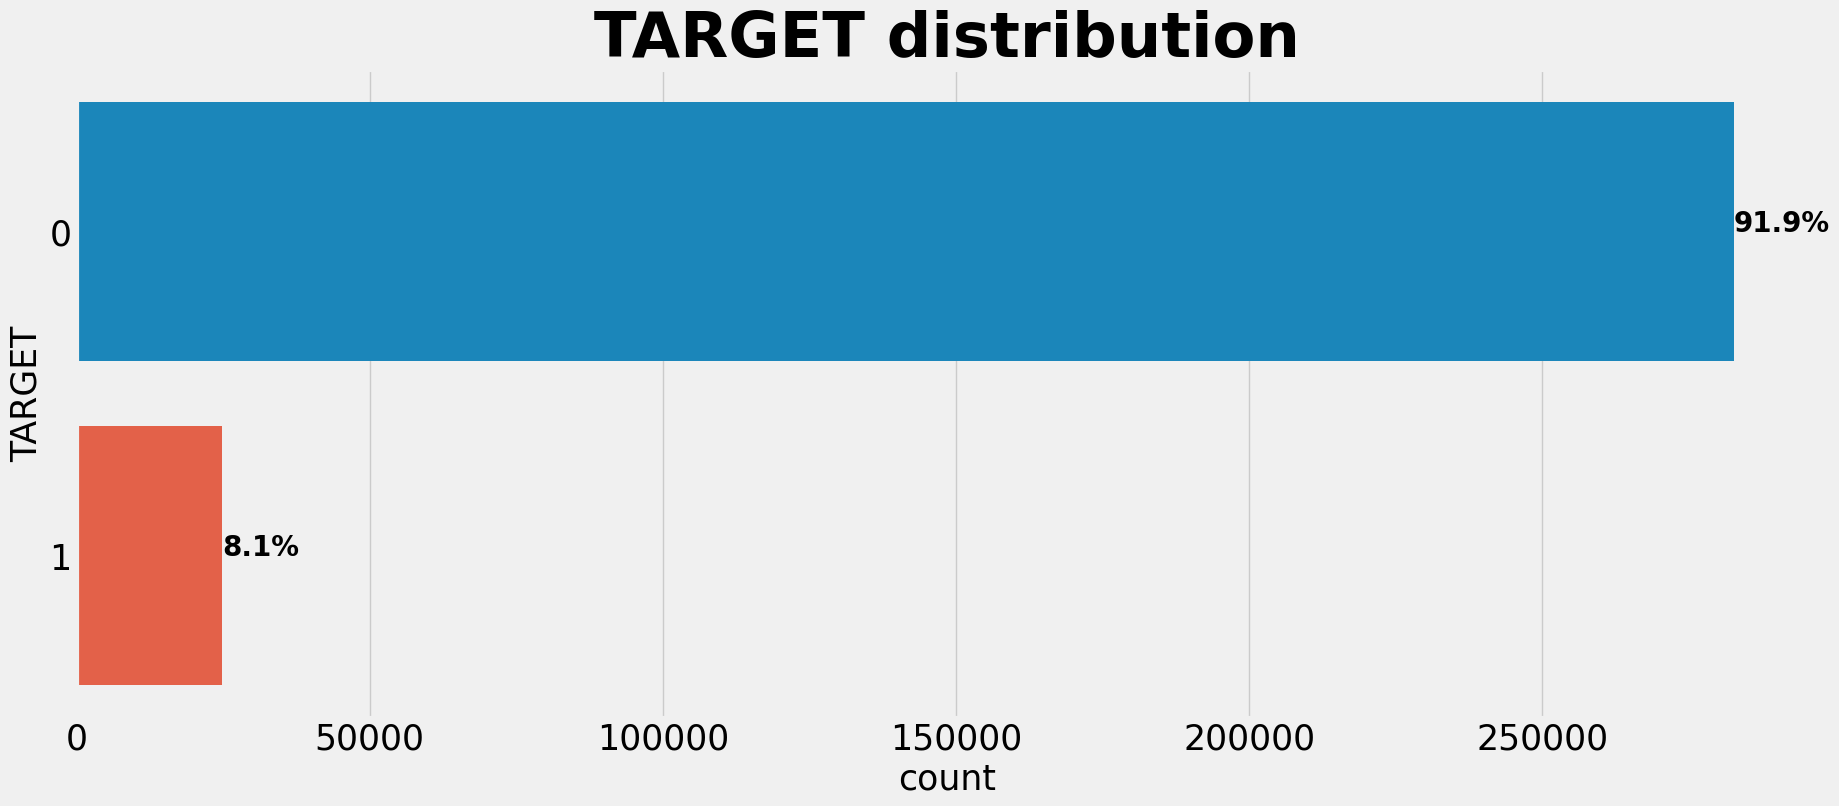

In [23]:
ax, fig = plt.subplots(figsize=(20,8)) 
ax = sns.countplot(y='TARGET', data=df_train)
ax.set_title("TARGET distribution")

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/len(df_train.TARGET))
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')
        
show()

**Notons des classes déséquilibrées. Il y a beaucoup plus de prêts remboursés à temps que de prêts non remboursés. Une fois que nous entrons dans des modèles d'apprentissage automatique plus sophistiqués, nous pouvons pondérer les classes par leur représentation dans les données pour refléter ce déséquilibre**.(une possible solution pour gérer ce déséquilibre. Lors de la mise en œuvre de modèles d'apprentissage automatique, il est possible d'attribuer un poids différent à chaque classe, basé sur sa fréquence dans l'ensemble de données. Cela permet d'accorder plus d'importance aux classes moins représentées, de sorte que le modèle ne soit pas biaisé en faveur de la classe dominante.)

-->Nombre de colonnes qualitatives: 16


Nom de la colonne : NAME_CONTRACT_TYPE
Nombre de valeurs uniques : 2
Pourcentage de valeurs nulles : 0.00%


['Cash loans' 'Revolving loans']
Cash loans         278232
Revolving loans     29279


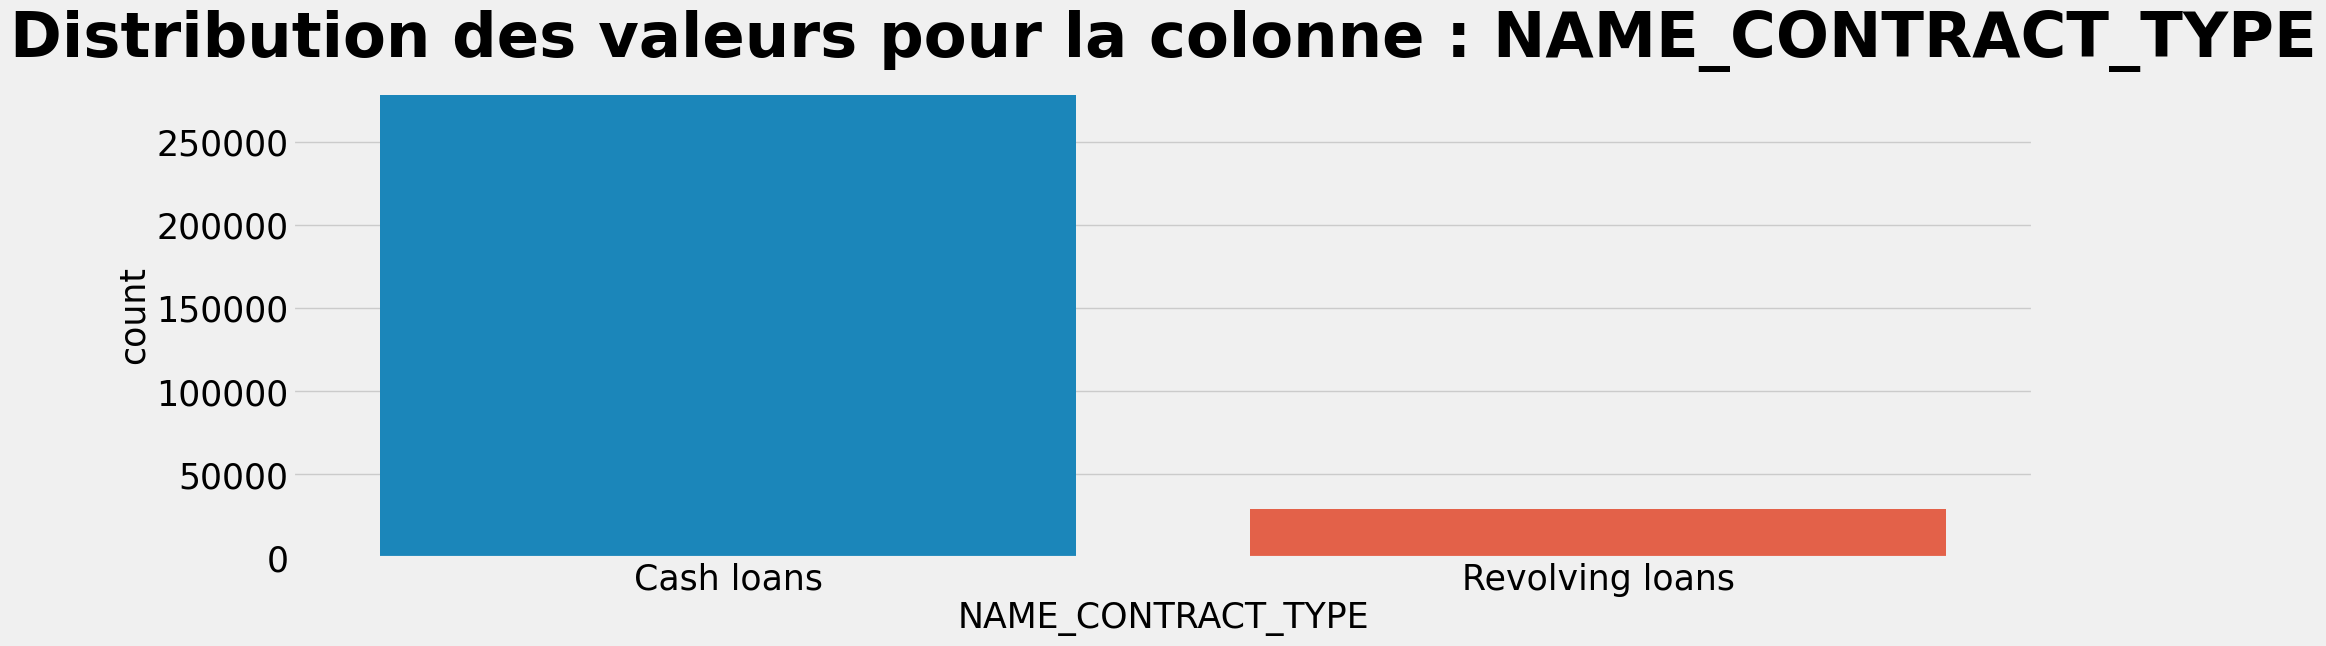

_________________________________
Nom de la colonne : CODE_GENDER
Nombre de valeurs uniques : 3
Pourcentage de valeurs nulles : 0.00%


['M' 'F' 'XNA']
F      202448
M      105059
XNA         4


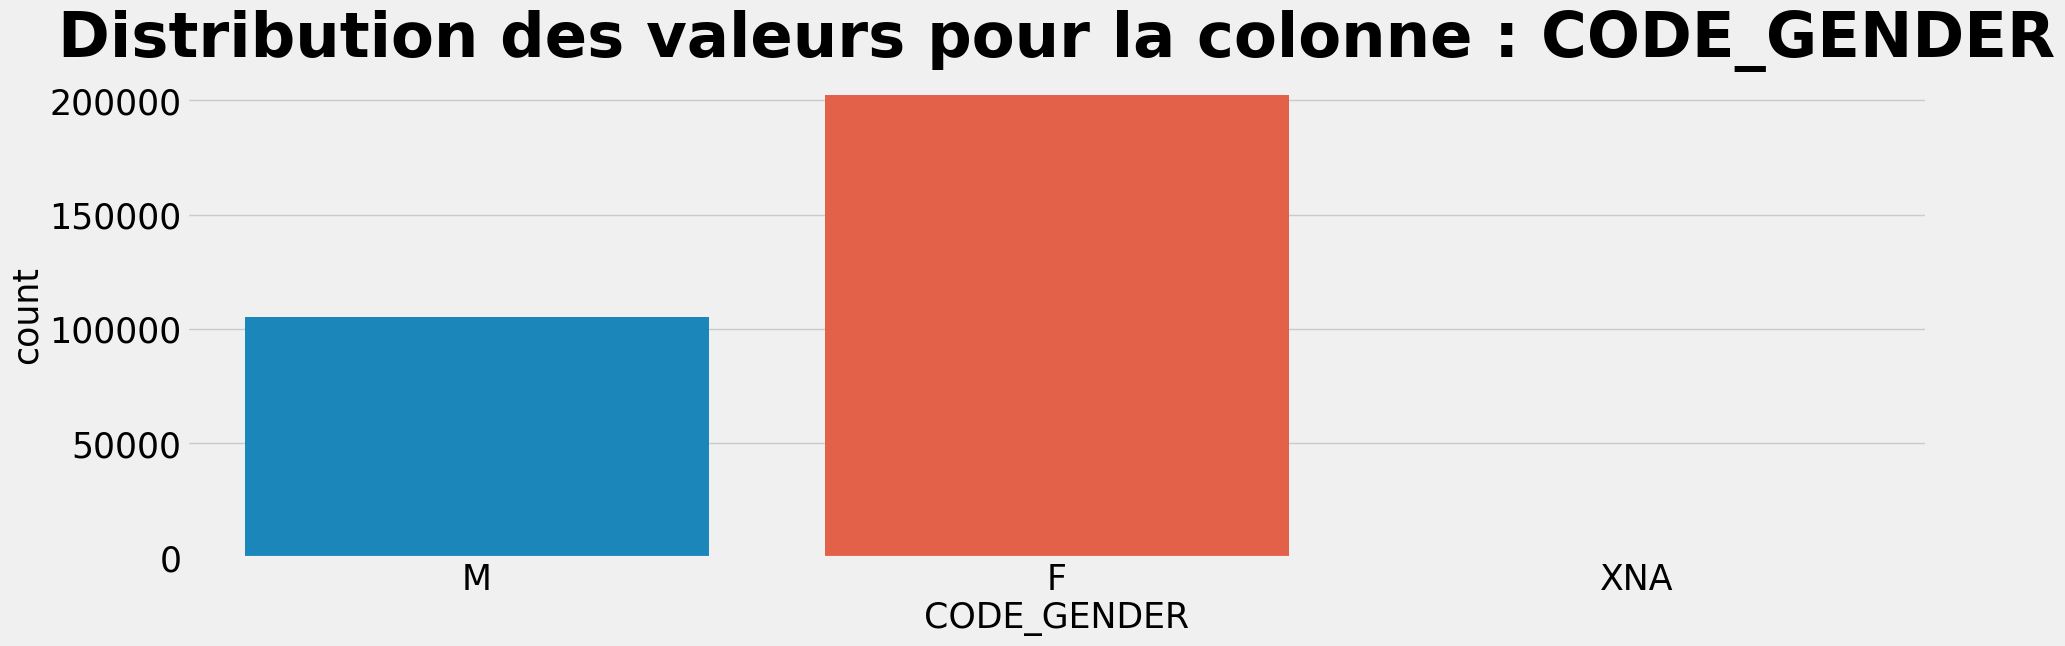

_________________________________
Nom de la colonne : FLAG_OWN_CAR
Nombre de valeurs uniques : 2
Pourcentage de valeurs nulles : 0.00%


['N' 'Y']
N    202924
Y    104587


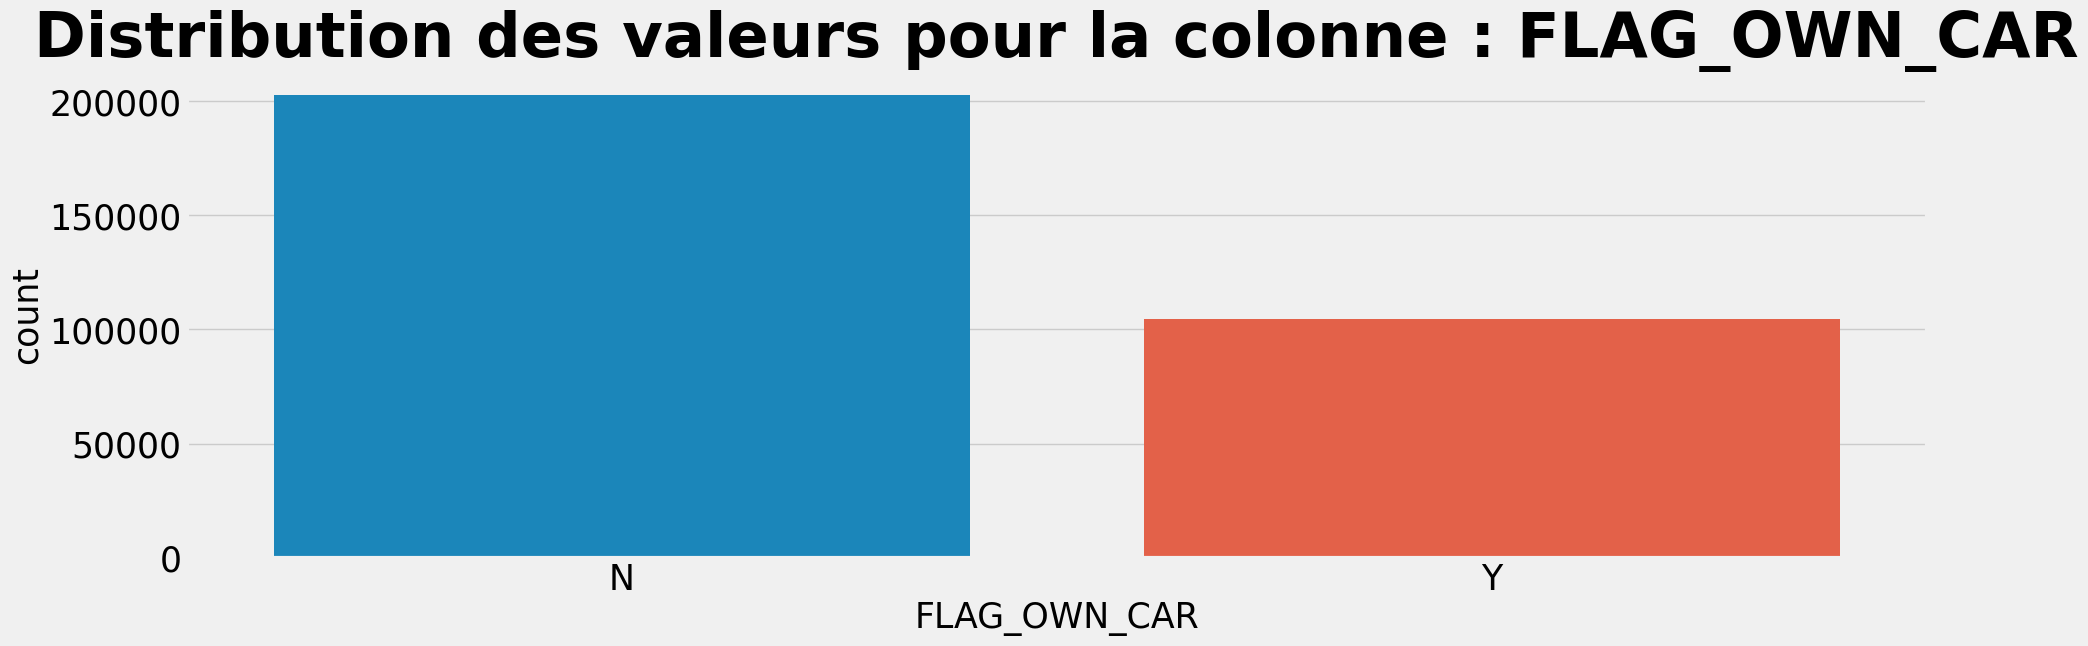

_________________________________
Nom de la colonne : FLAG_OWN_REALTY
Nombre de valeurs uniques : 2
Pourcentage de valeurs nulles : 0.00%


['Y' 'N']
Y    213312
N     94199


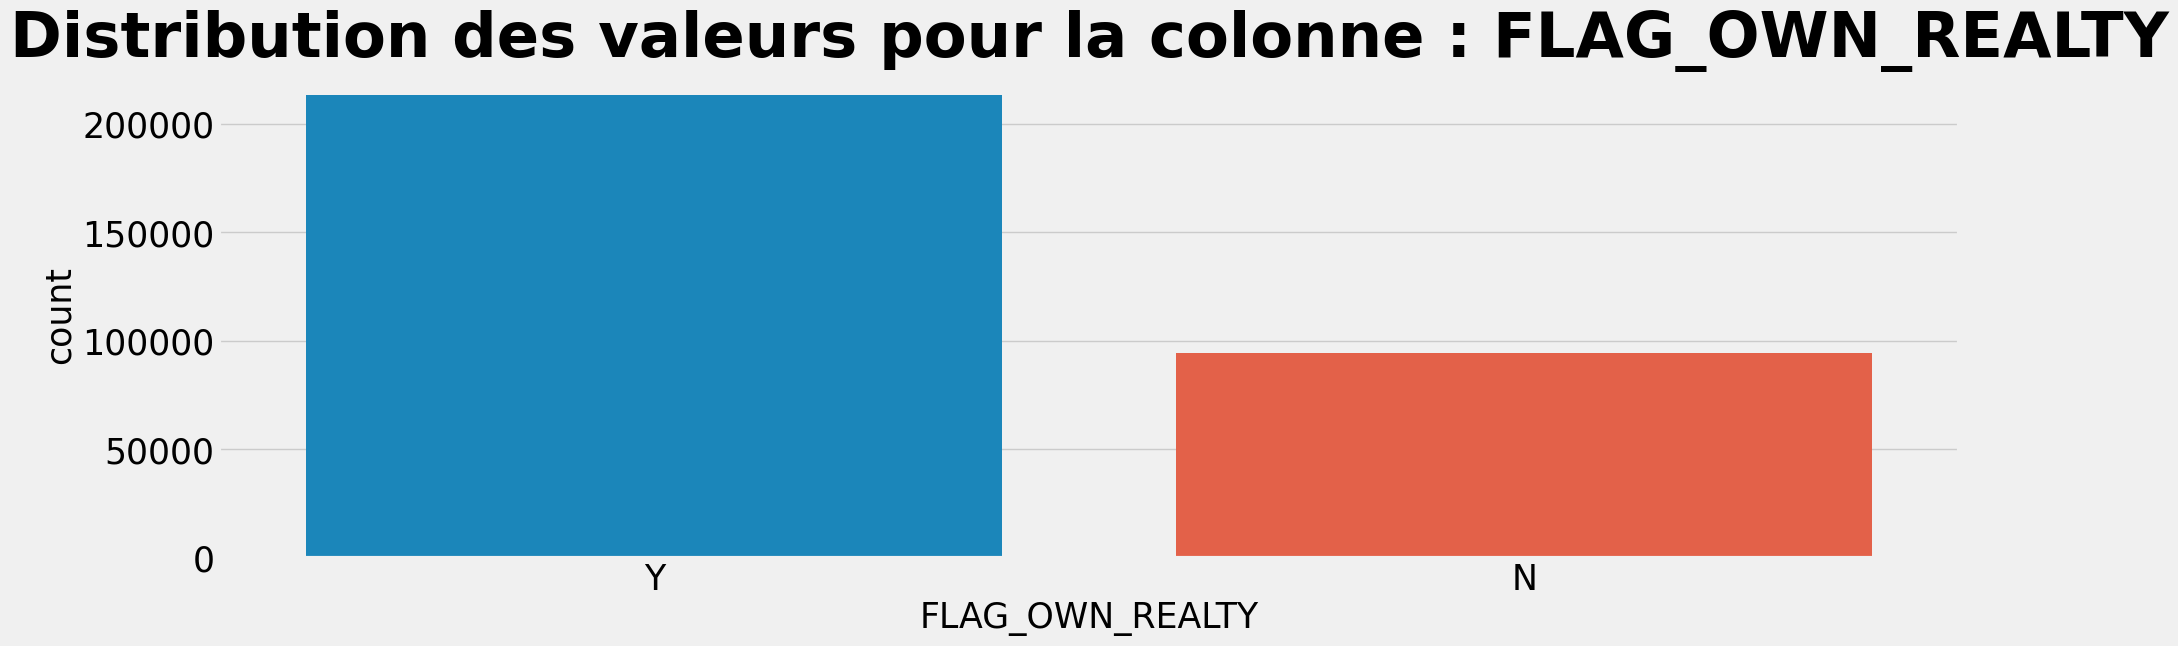

_________________________________
Nom de la colonne : NAME_TYPE_SUITE
Nombre de valeurs uniques : 7
Pourcentage de valeurs nulles : 0.42%


['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271


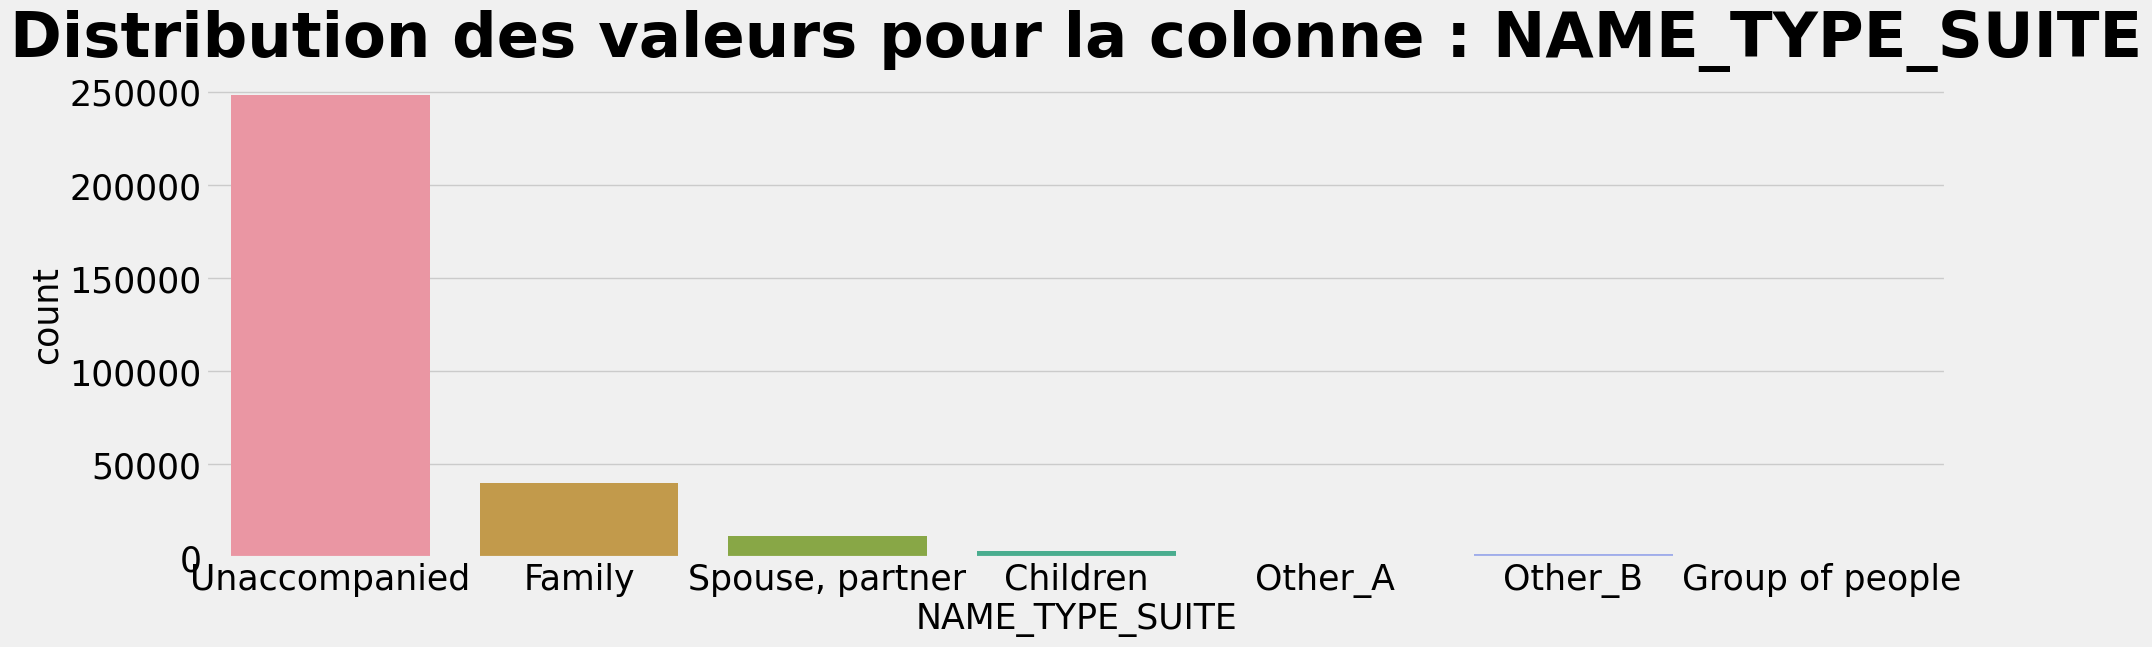

_________________________________
Nom de la colonne : NAME_INCOME_TYPE
Nombre de valeurs uniques : 8
Pourcentage de valeurs nulles : 0.00%


['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5


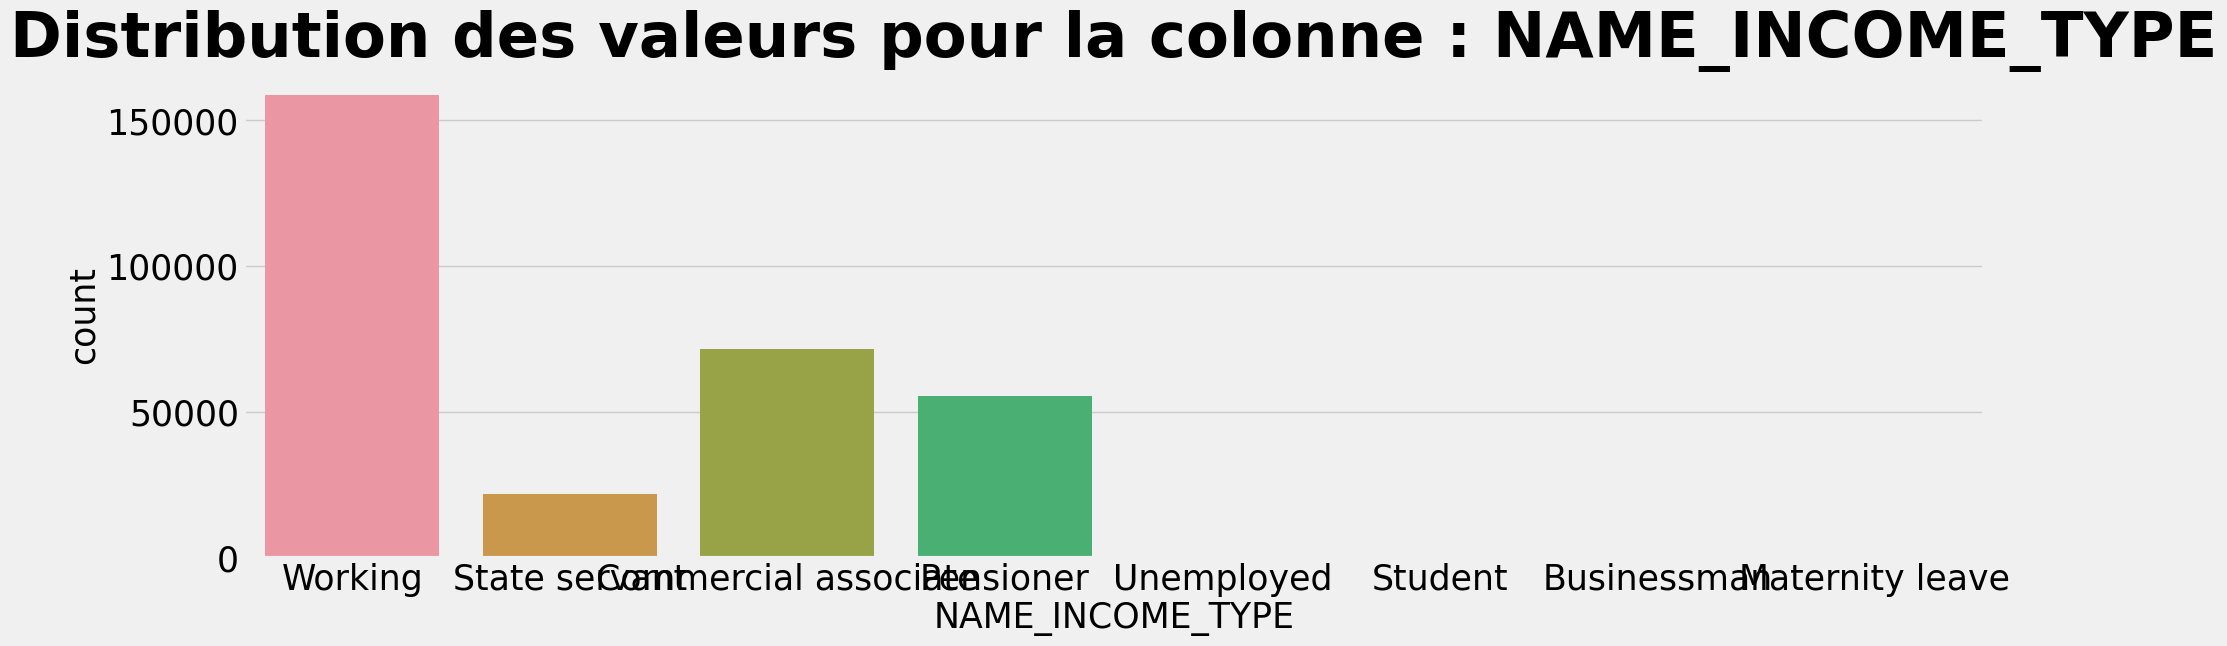

_________________________________
Nom de la colonne : NAME_EDUCATION_TYPE
Nombre de valeurs uniques : 5
Pourcentage de valeurs nulles : 0.00%


['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164


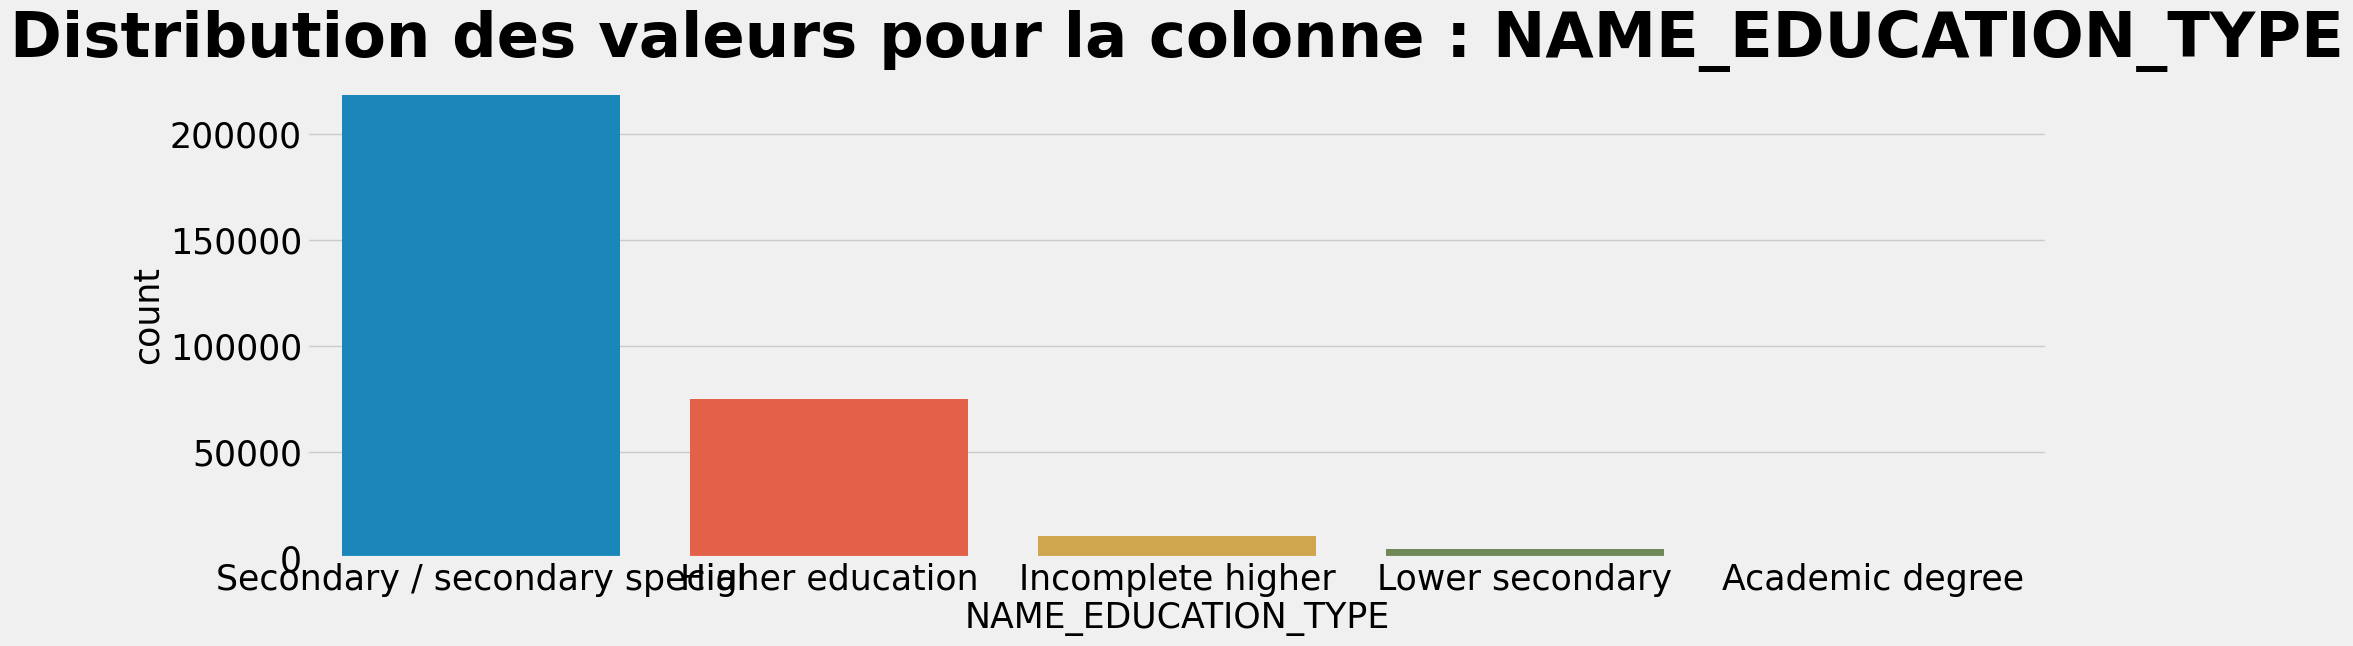

_________________________________
Nom de la colonne : NAME_FAMILY_STATUS
Nombre de valeurs uniques : 6
Pourcentage de valeurs nulles : 0.00%


['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2


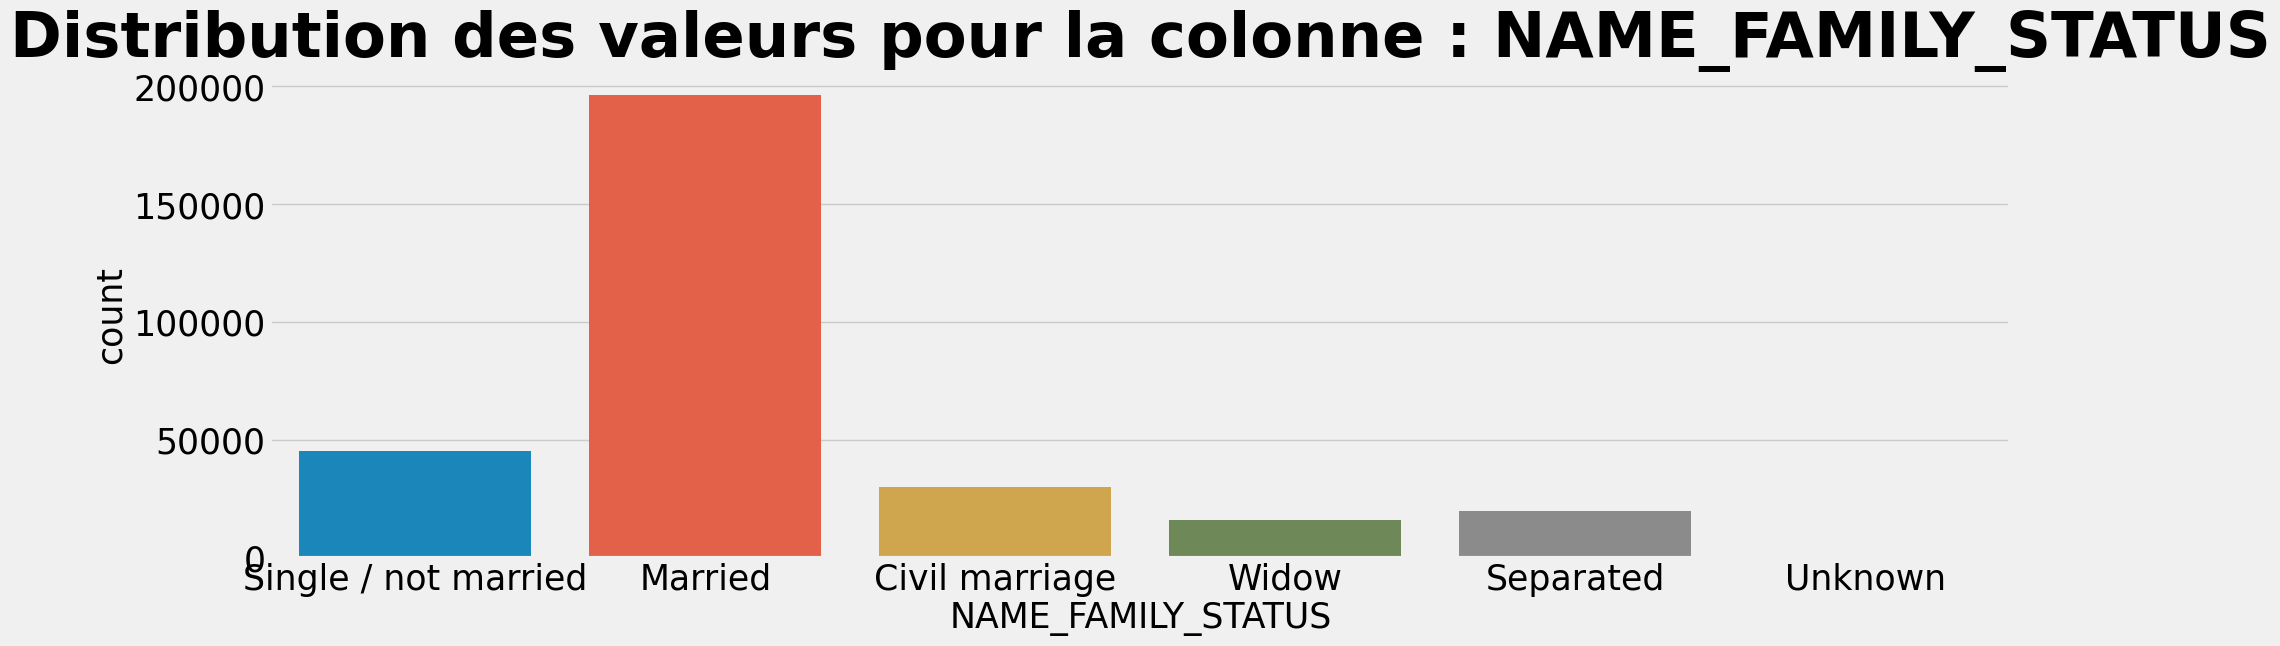

_________________________________
Nom de la colonne : NAME_HOUSING_TYPE
Nombre de valeurs uniques : 6
Pourcentage de valeurs nulles : 0.00%


['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122


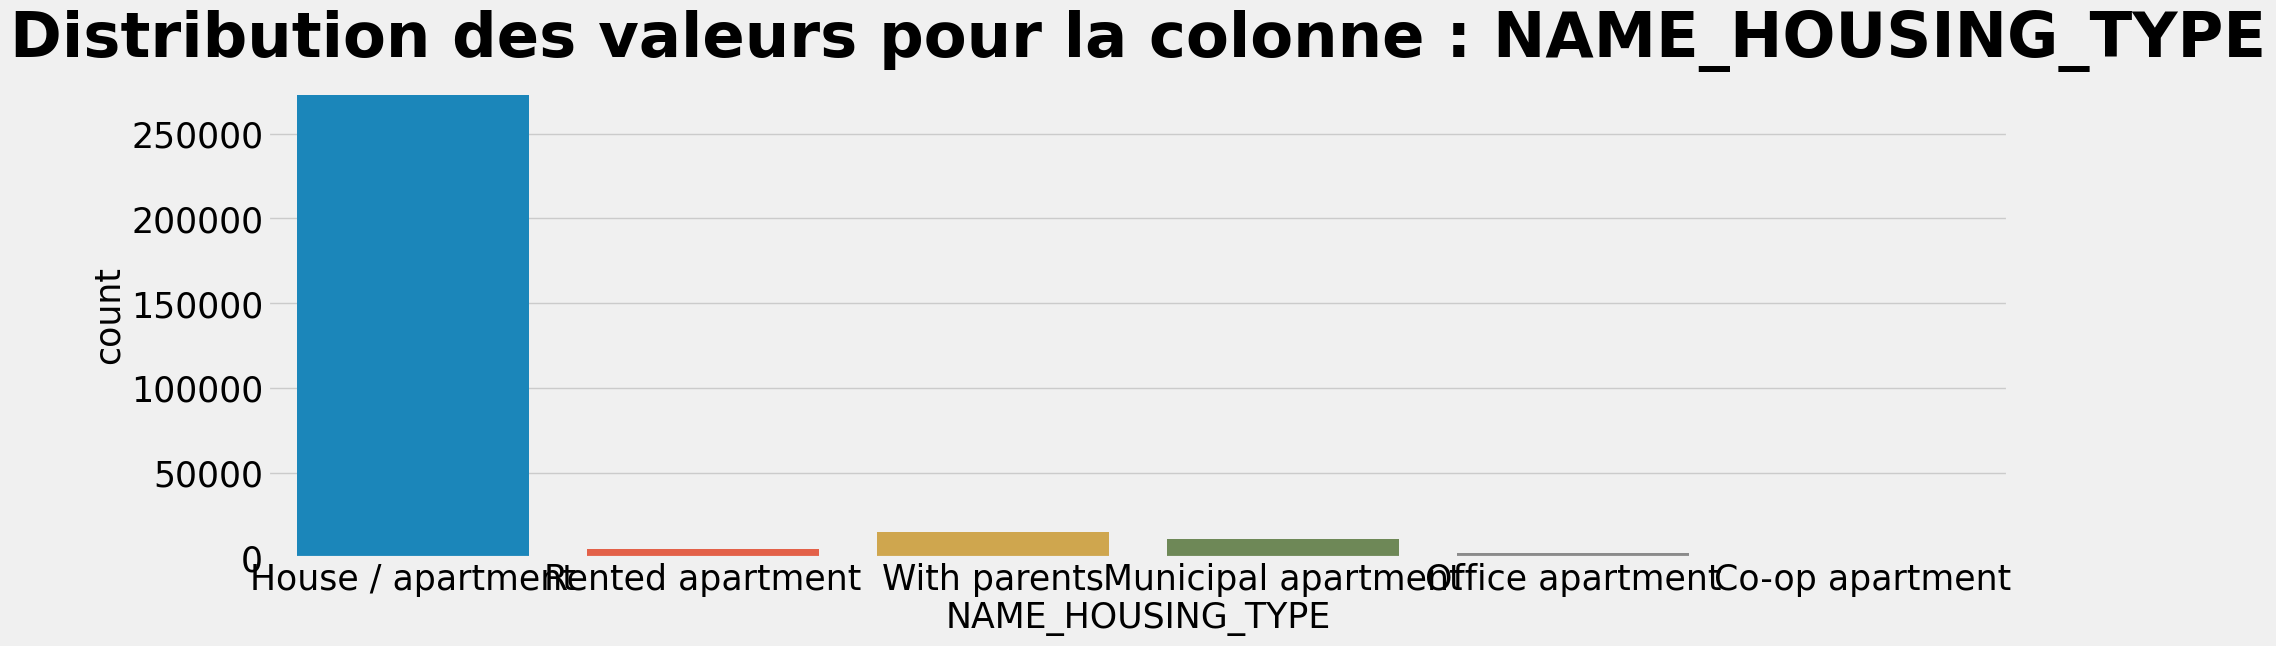

_________________________________
Nom de la colonne : OCCUPATION_TYPE
Nombre de valeurs uniques : 18
Pourcentage de valeurs nulles : 31.35%


Nom de la colonne : WEEKDAY_APPR_PROCESS_START
Nombre de valeurs uniques : 7
Pourcentage de valeurs nulles : 0.00%


['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']
TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181


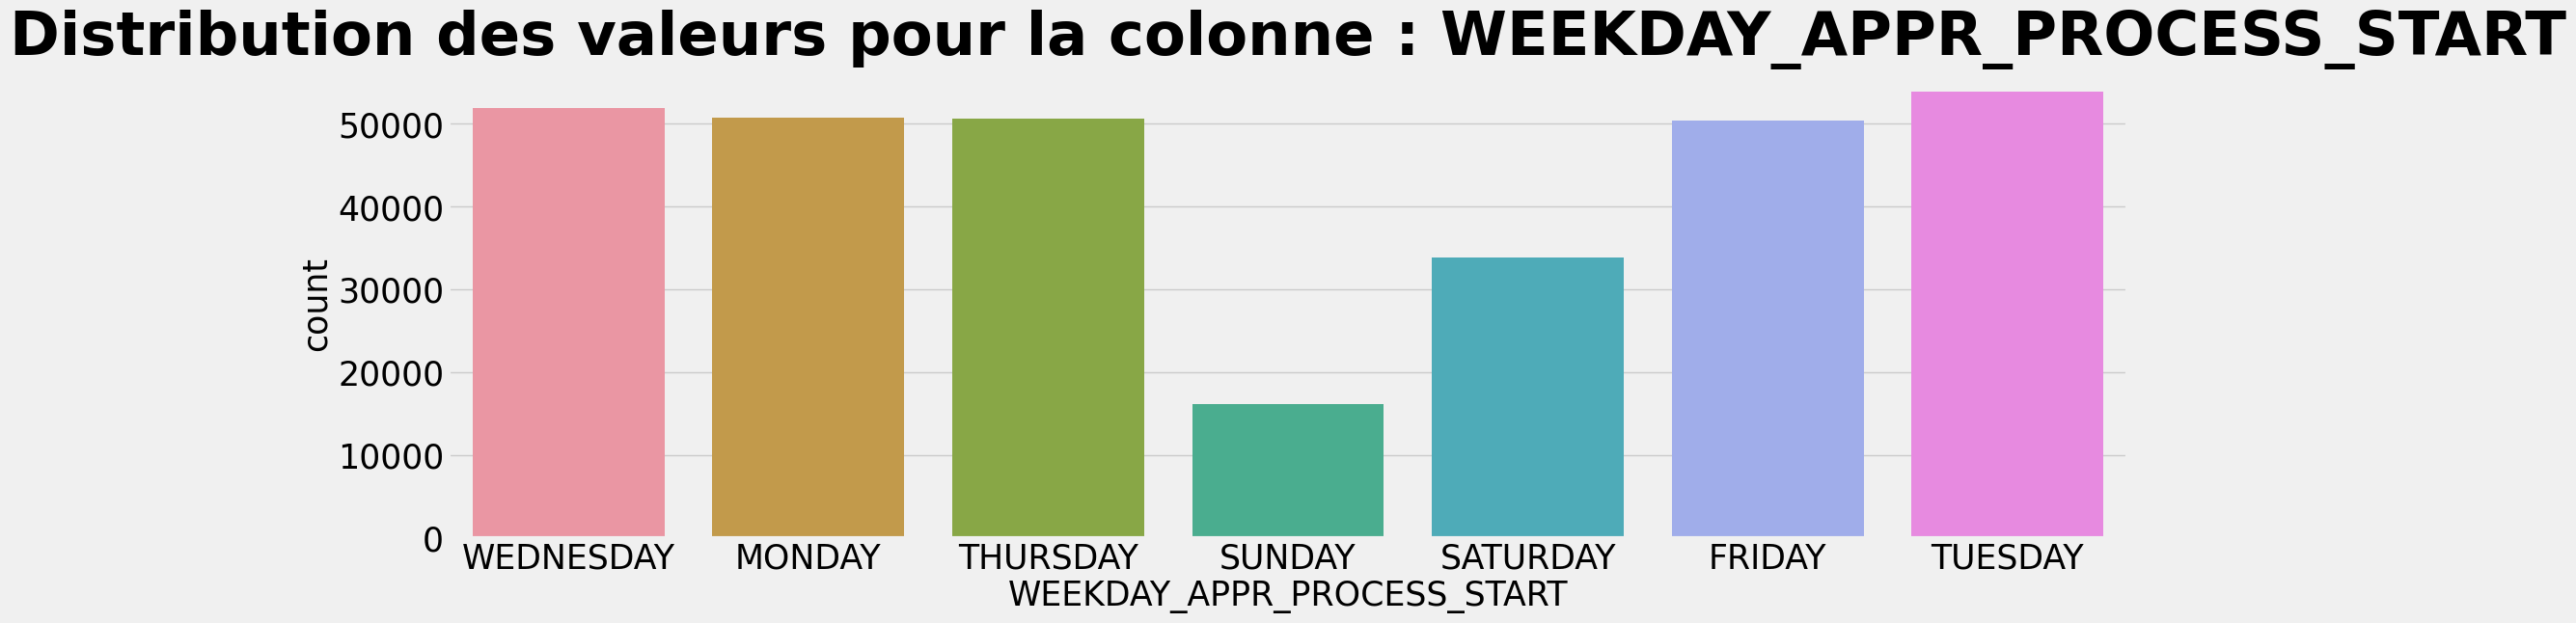

_________________________________
Nom de la colonne : ORGANIZATION_TYPE
Nombre de valeurs uniques : 58
Pourcentage de valeurs nulles : 0.00%


Nom de la colonne : FONDKAPREMONT_MODE
Nombre de valeurs uniques : 4
Pourcentage de valeurs nulles : 68.39%


['reg oper account' nan 'org spec account' 'reg oper spec account'
 'not specified']
reg oper account         73830
reg oper spec account    12080
not specified             5687
org spec account          5619


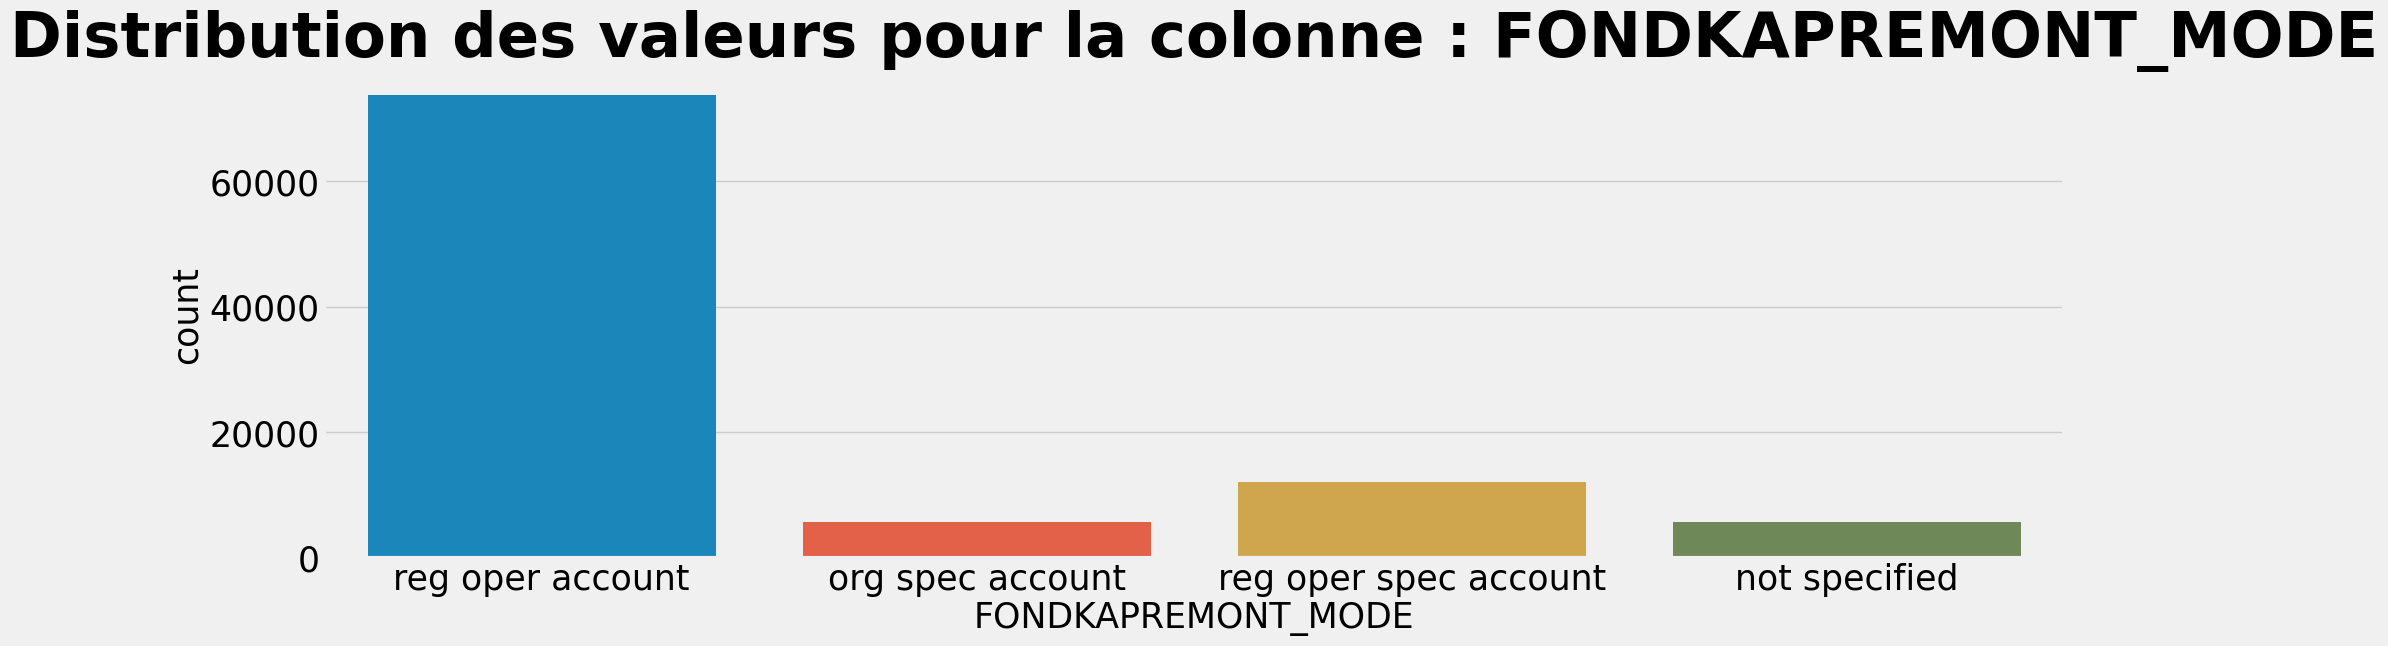

_________________________________
Nom de la colonne : HOUSETYPE_MODE
Nombre de valeurs uniques : 3
Pourcentage de valeurs nulles : 50.18%


['block of flats' nan 'terraced house' 'specific housing']
block of flats      150503
specific housing      1499
terraced house        1212


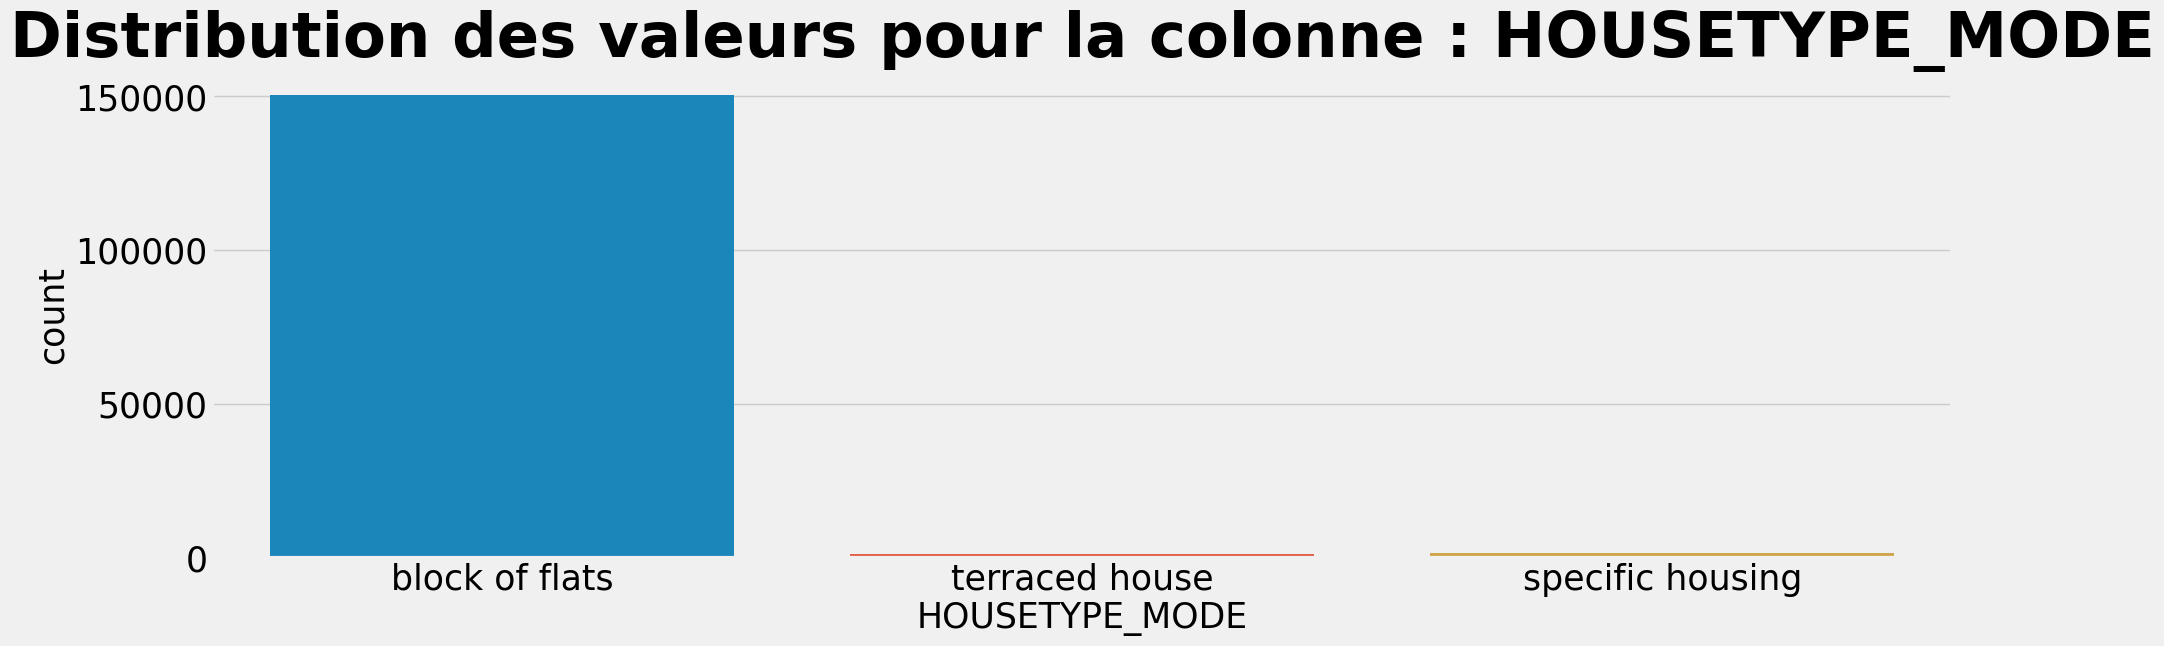

_________________________________
Nom de la colonne : WALLSMATERIAL_MODE
Nombre de valeurs uniques : 7
Pourcentage de valeurs nulles : 50.84%


['Stone, brick' 'Block' nan 'Panel' 'Mixed' 'Wooden' 'Others' 'Monolithic']
Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625


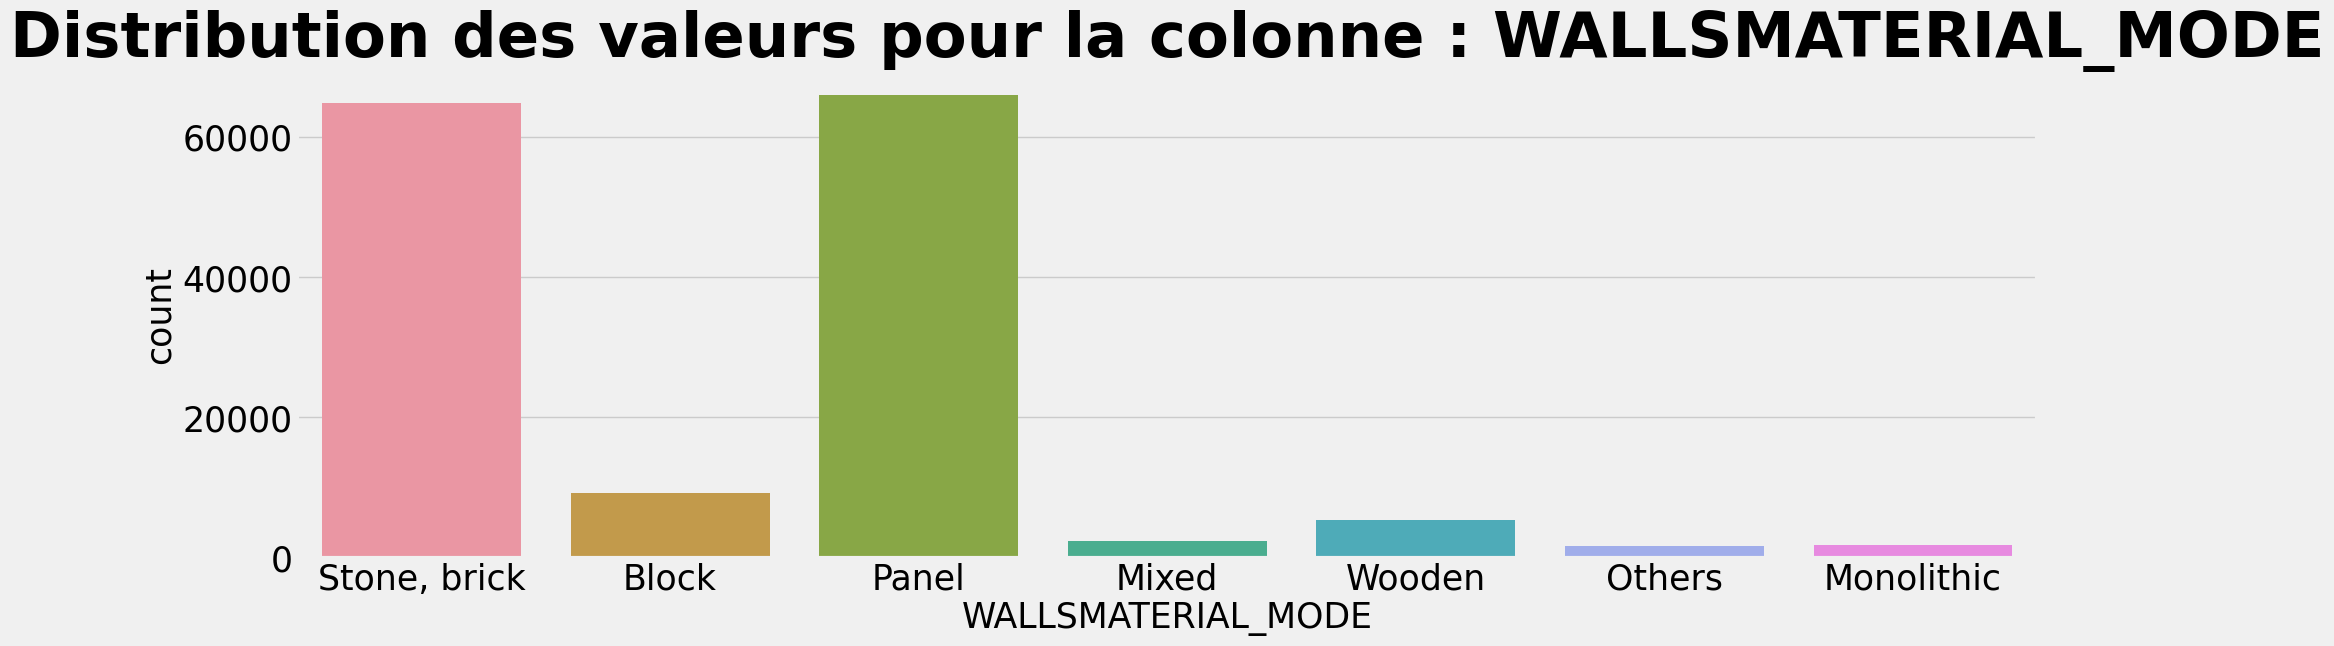

_________________________________
Nom de la colonne : EMERGENCYSTATE_MODE
Nombre de valeurs uniques : 2
Pourcentage de valeurs nulles : 47.40%


['No' nan 'Yes']
No     159428
Yes      2328


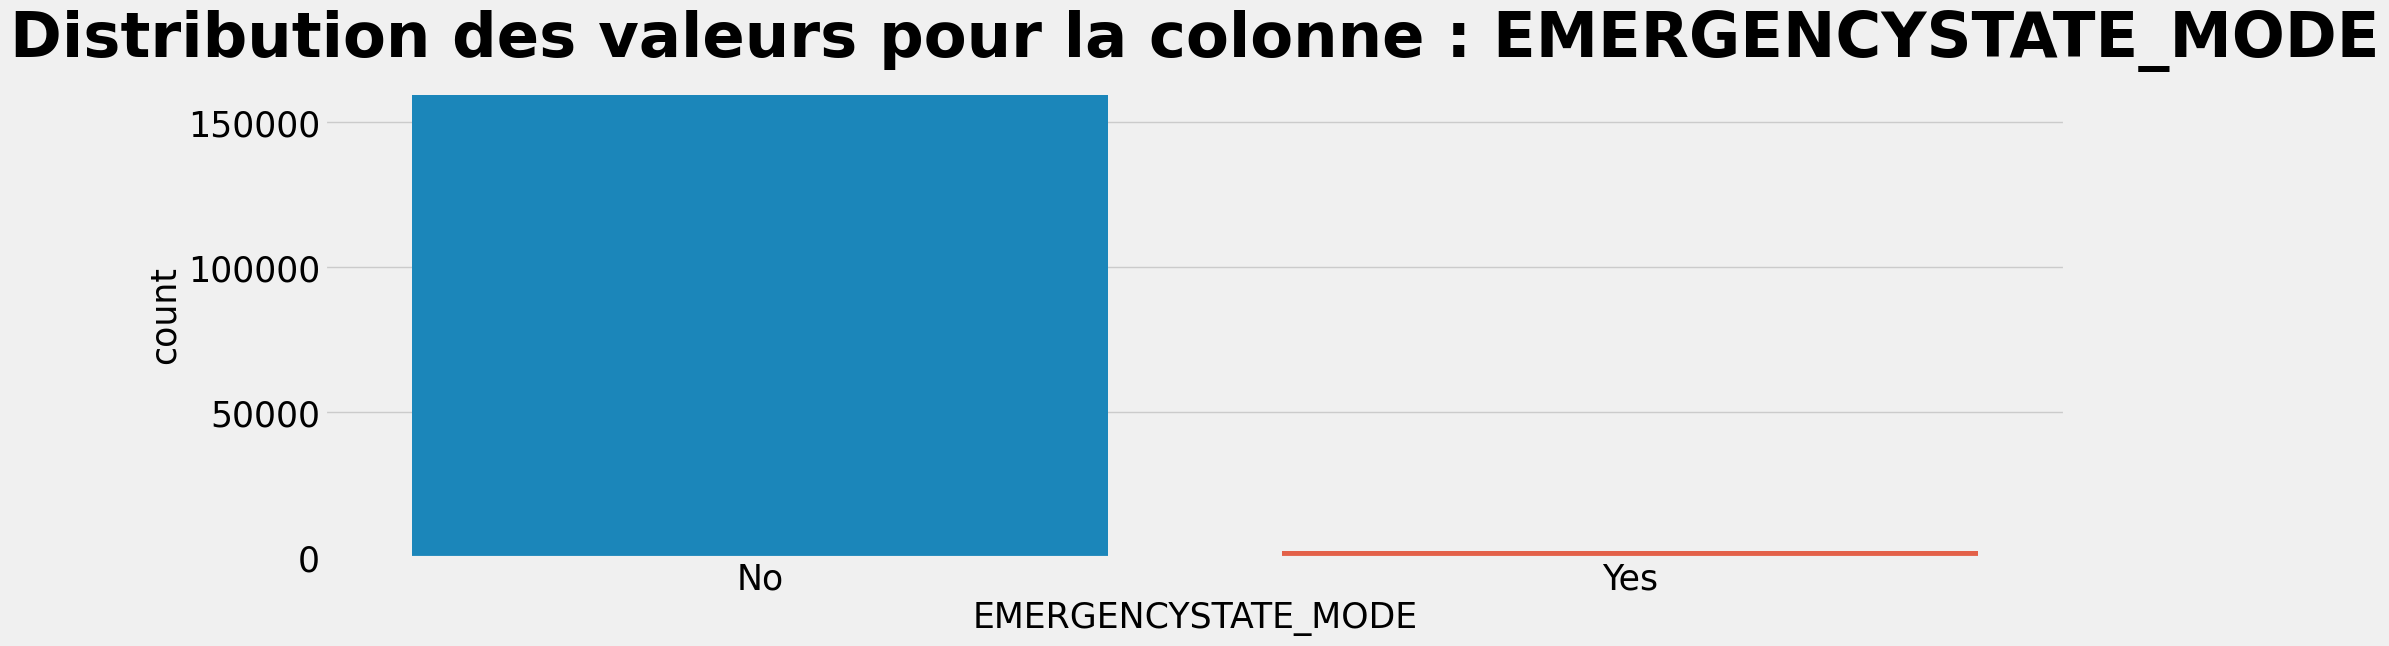

_________________________________


In [25]:
categories_uniques(df_train)

-->Nombre de colonnes qualitatives: 16


Nom de la colonne : NAME_CONTRACT_TYPE
Nombre de valeurs uniques : 2
Pourcentage de valeurs nulles : 0.00%


['Cash loans' 'Revolving loans']
Cash loans         48305
Revolving loans      439


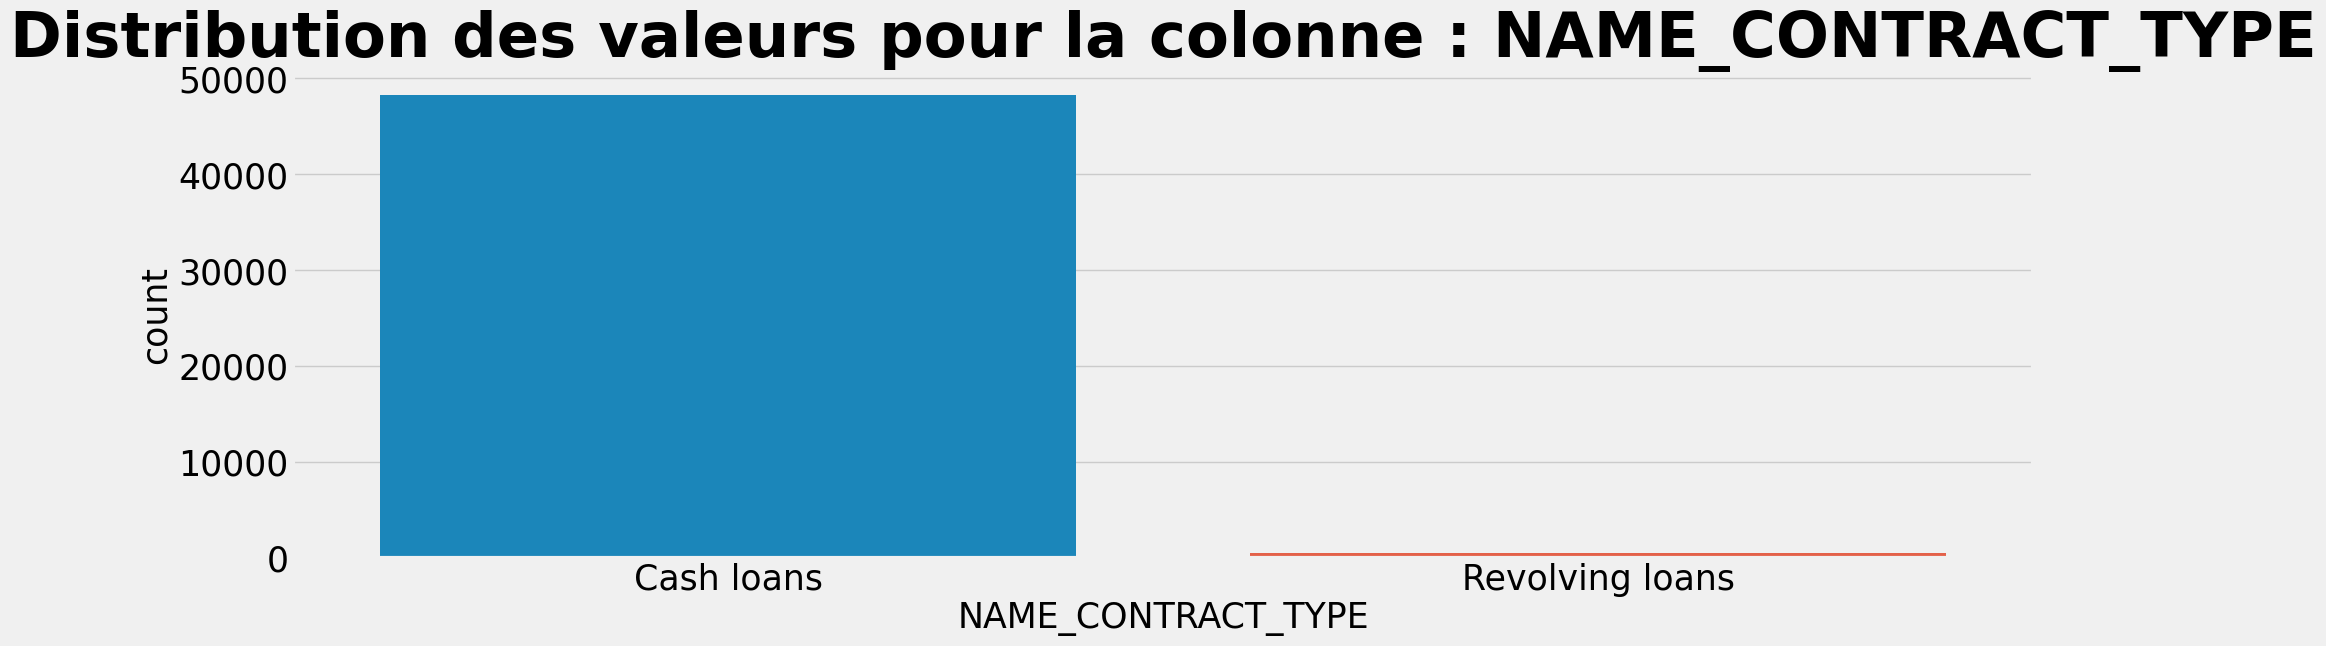

_________________________________
Nom de la colonne : CODE_GENDER
Nombre de valeurs uniques : 2
Pourcentage de valeurs nulles : 0.00%


['F' 'M']
F    32678
M    16066


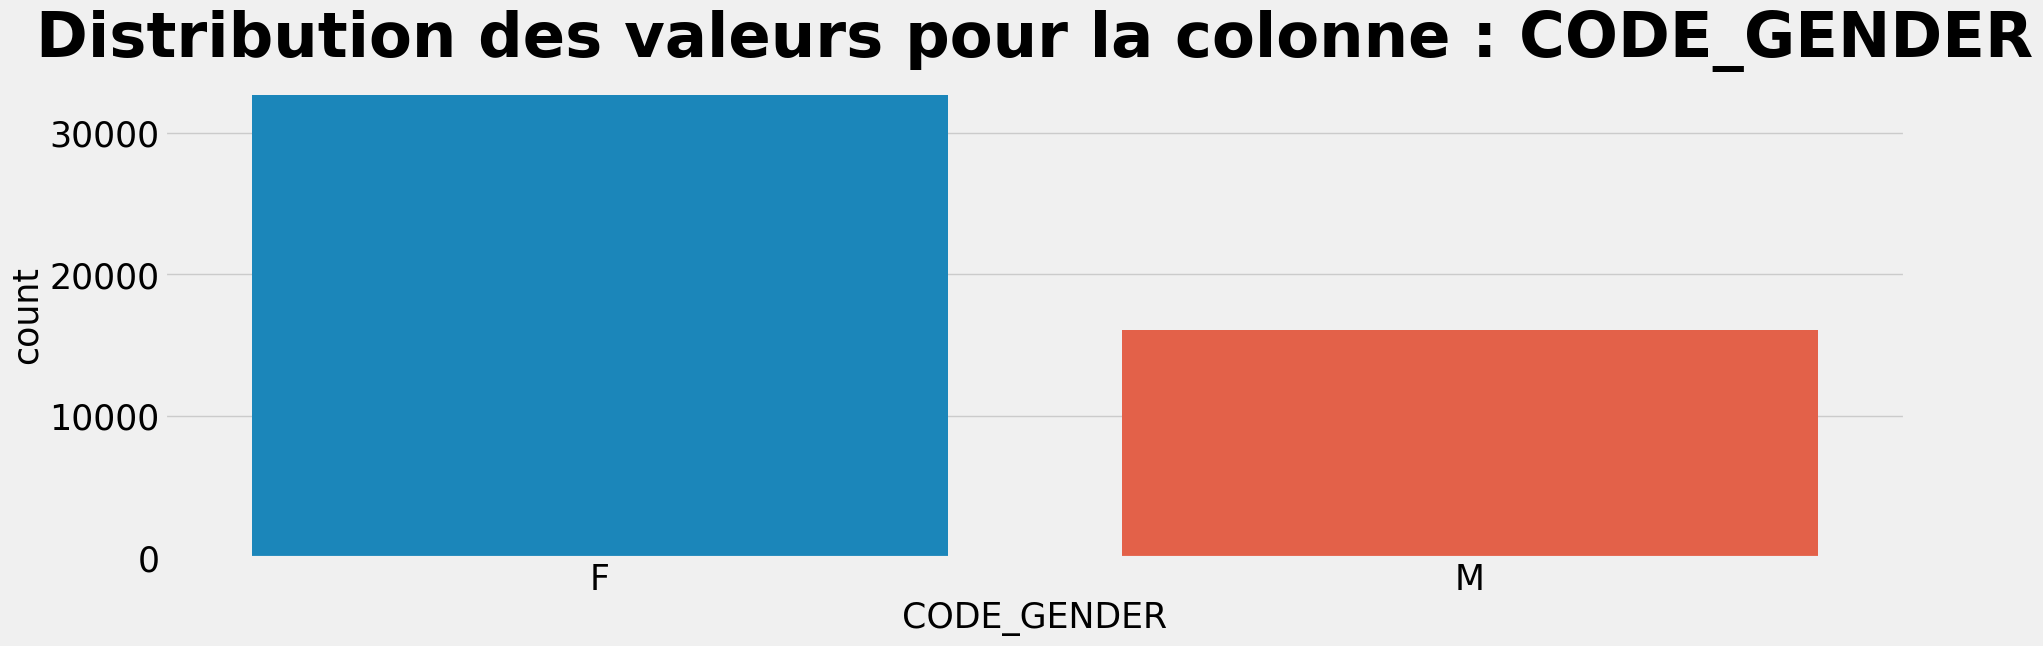

_________________________________
Nom de la colonne : FLAG_OWN_CAR
Nombre de valeurs uniques : 2
Pourcentage de valeurs nulles : 0.00%


['N' 'Y']
N    32311
Y    16433


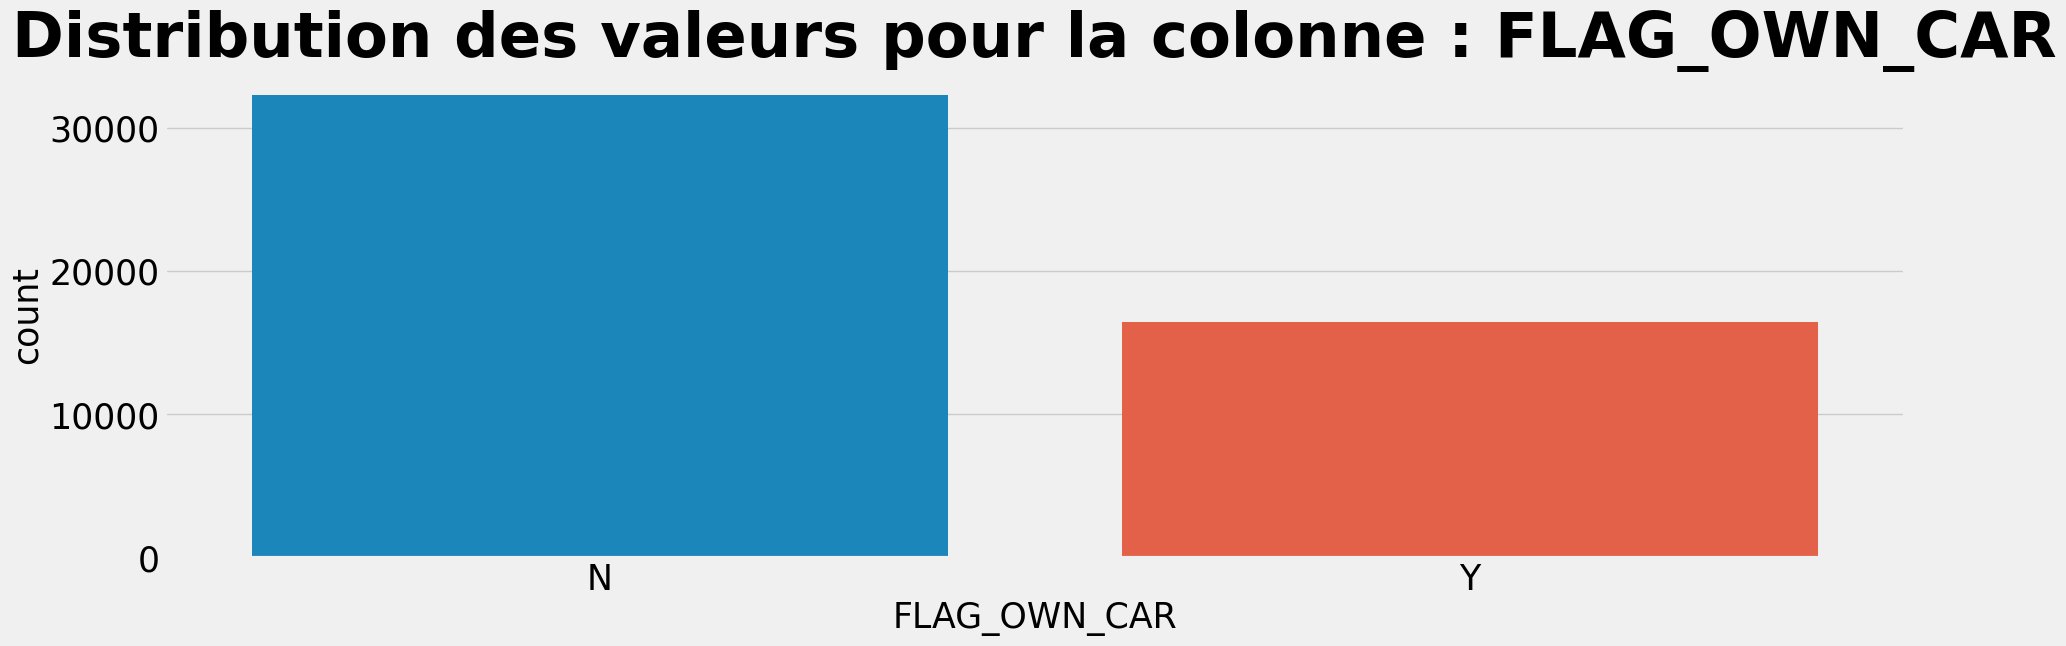

_________________________________
Nom de la colonne : FLAG_OWN_REALTY
Nombre de valeurs uniques : 2
Pourcentage de valeurs nulles : 0.00%


['Y' 'N']
Y    33658
N    15086


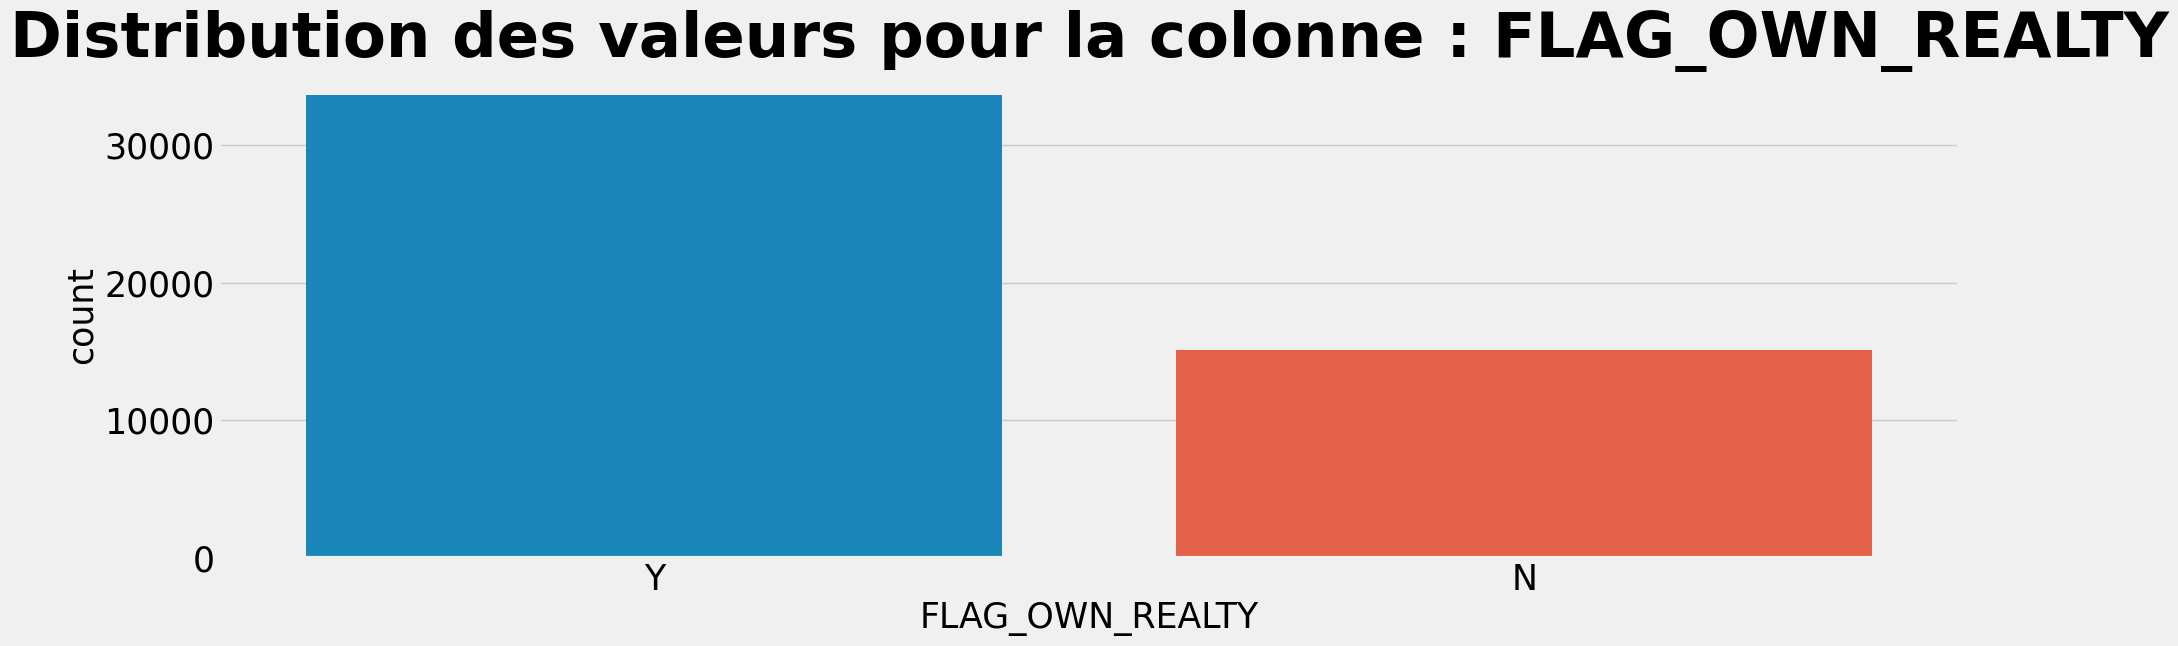

_________________________________
Nom de la colonne : NAME_TYPE_SUITE
Nombre de valeurs uniques : 7
Pourcentage de valeurs nulles : 1.87%


['Unaccompanied' nan 'Family' 'Spouse, partner' 'Group of people'
 'Other_B' 'Children' 'Other_A']
Unaccompanied      39727
Family              5881
Spouse, partner     1448
Children             408
Other_B              211
Other_A              109
Group of people       49


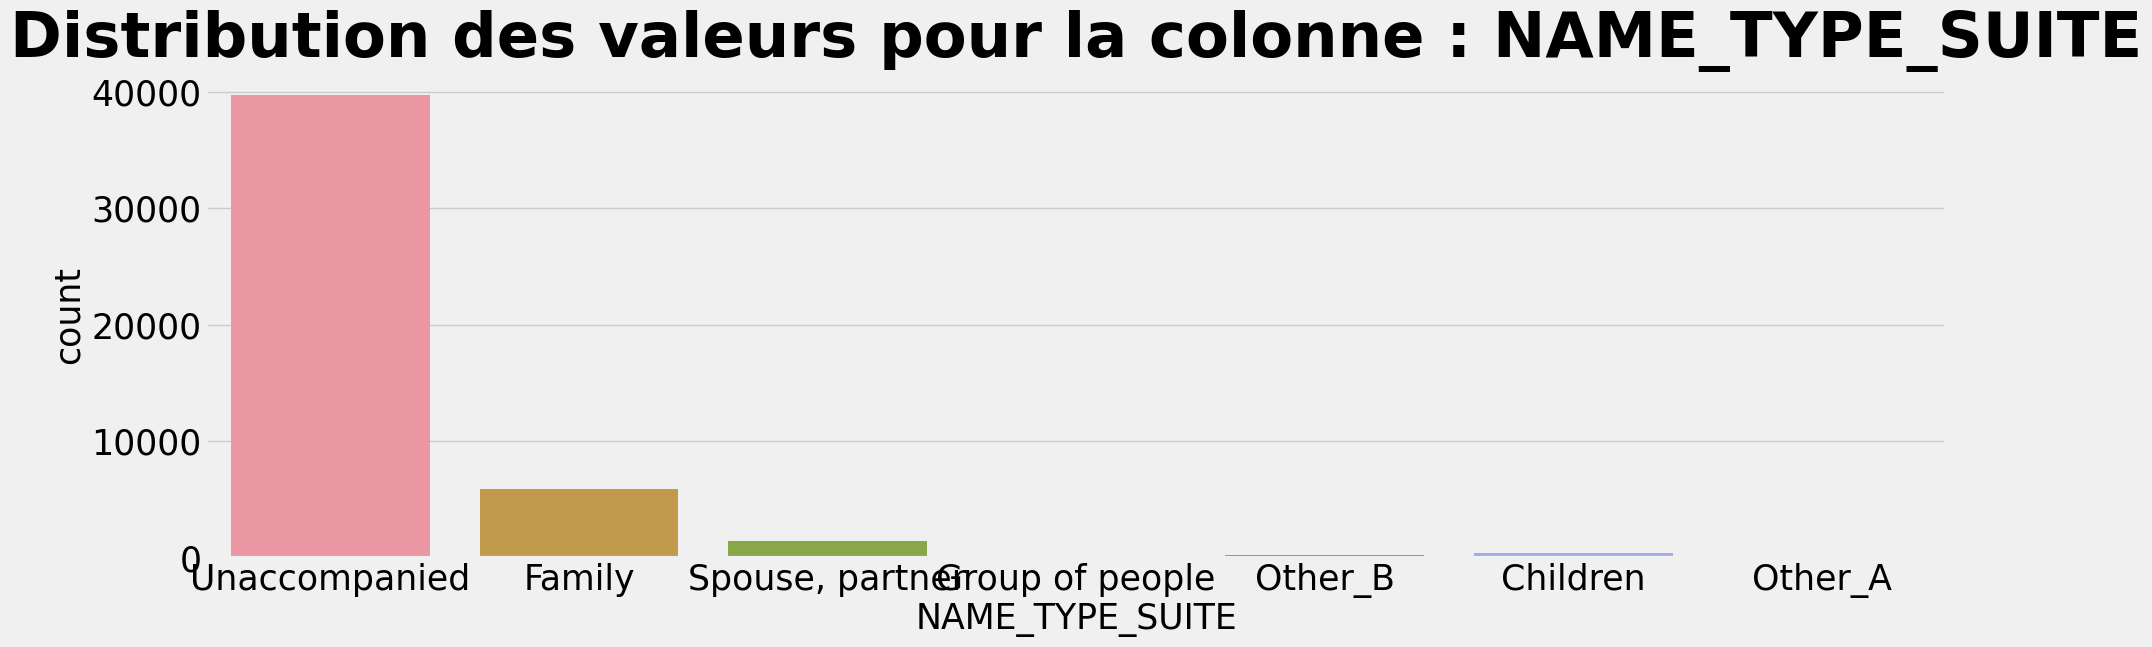

_________________________________
Nom de la colonne : NAME_INCOME_TYPE
Nombre de valeurs uniques : 7
Pourcentage de valeurs nulles : 0.00%


['Working' 'State servant' 'Pensioner' 'Commercial associate'
 'Businessman' 'Student' 'Unemployed']
Working                 24533
Commercial associate    11402
Pensioner                9273
State servant            3532
Student                     2
Businessman                 1
Unemployed                  1


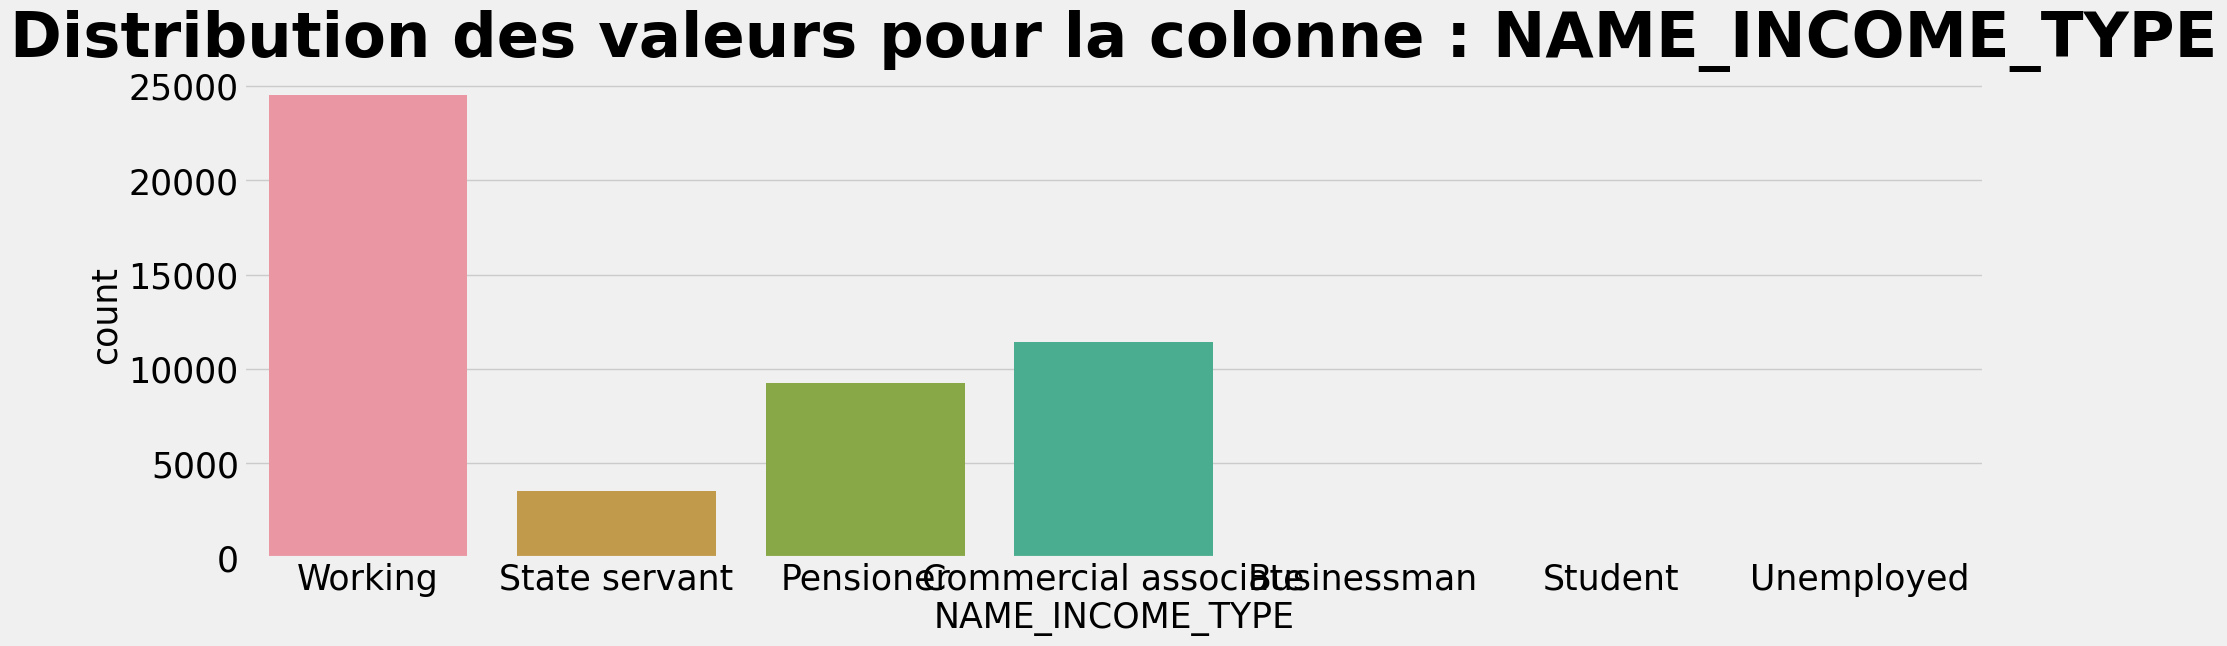

_________________________________
Nom de la colonne : NAME_EDUCATION_TYPE
Nombre de valeurs uniques : 5
Pourcentage de valeurs nulles : 0.00%


['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Secondary / secondary special    33988
Higher education                 12516
Incomplete higher                 1724
Lower secondary                    475
Academic degree                     41


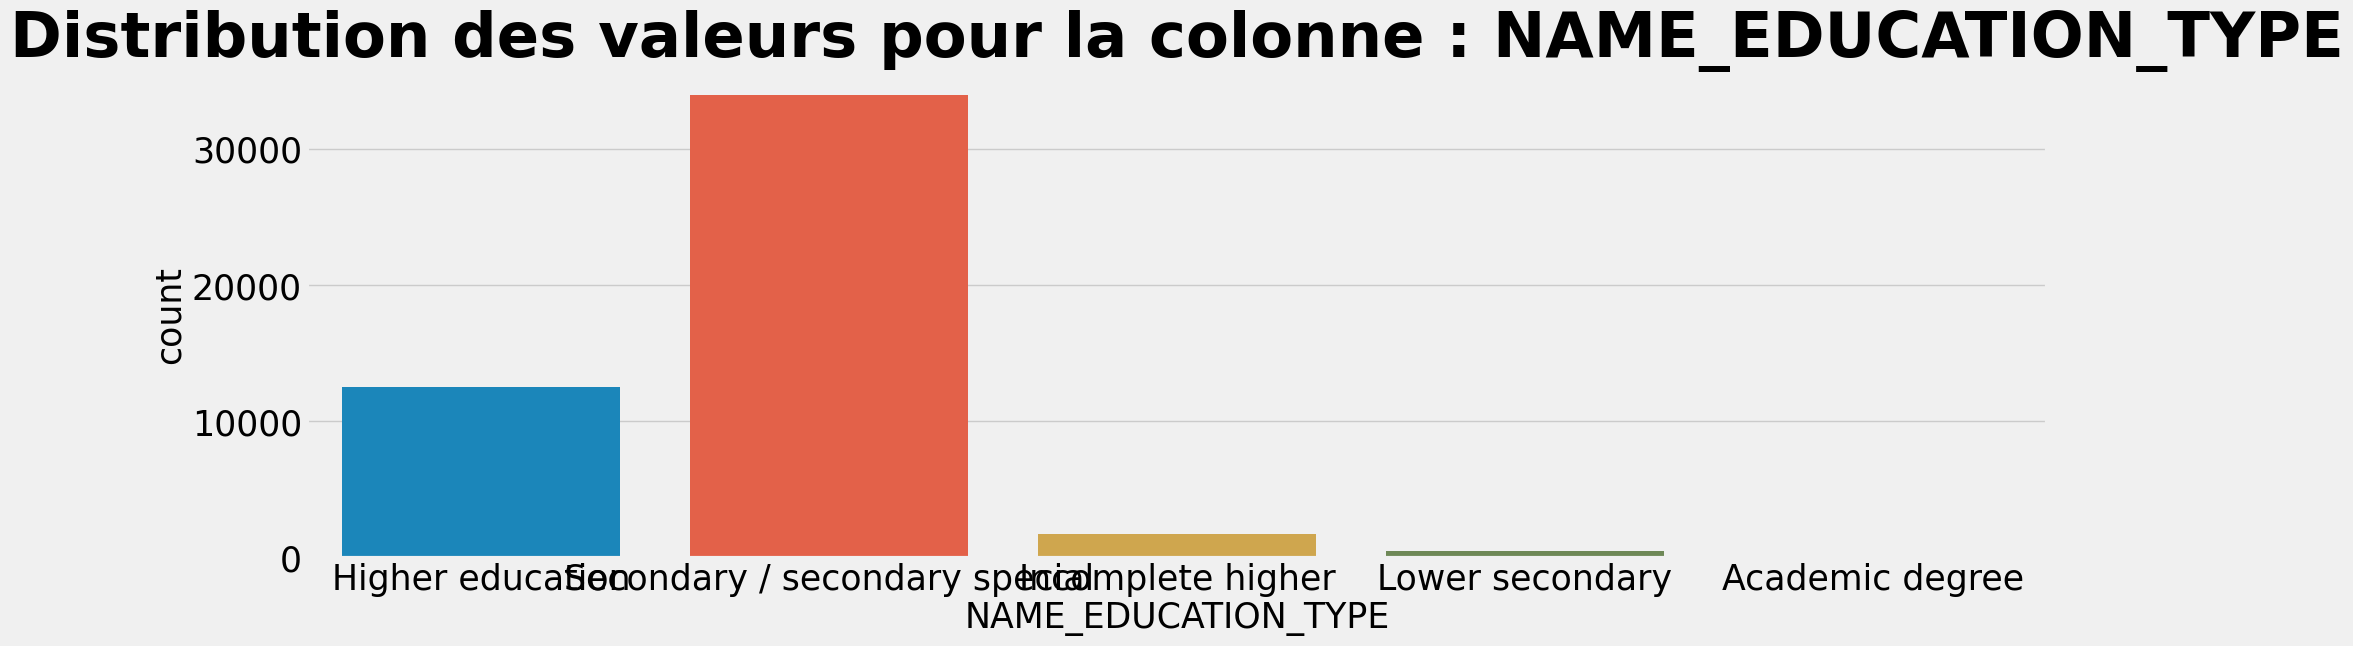

_________________________________
Nom de la colonne : NAME_FAMILY_STATUS
Nombre de valeurs uniques : 5
Pourcentage de valeurs nulles : 0.00%


['Married' 'Single / not married' 'Civil marriage' 'Widow' 'Separated']
Married                 32283
Single / not married     7036
Civil marriage           4261
Separated                2955
Widow                    2209


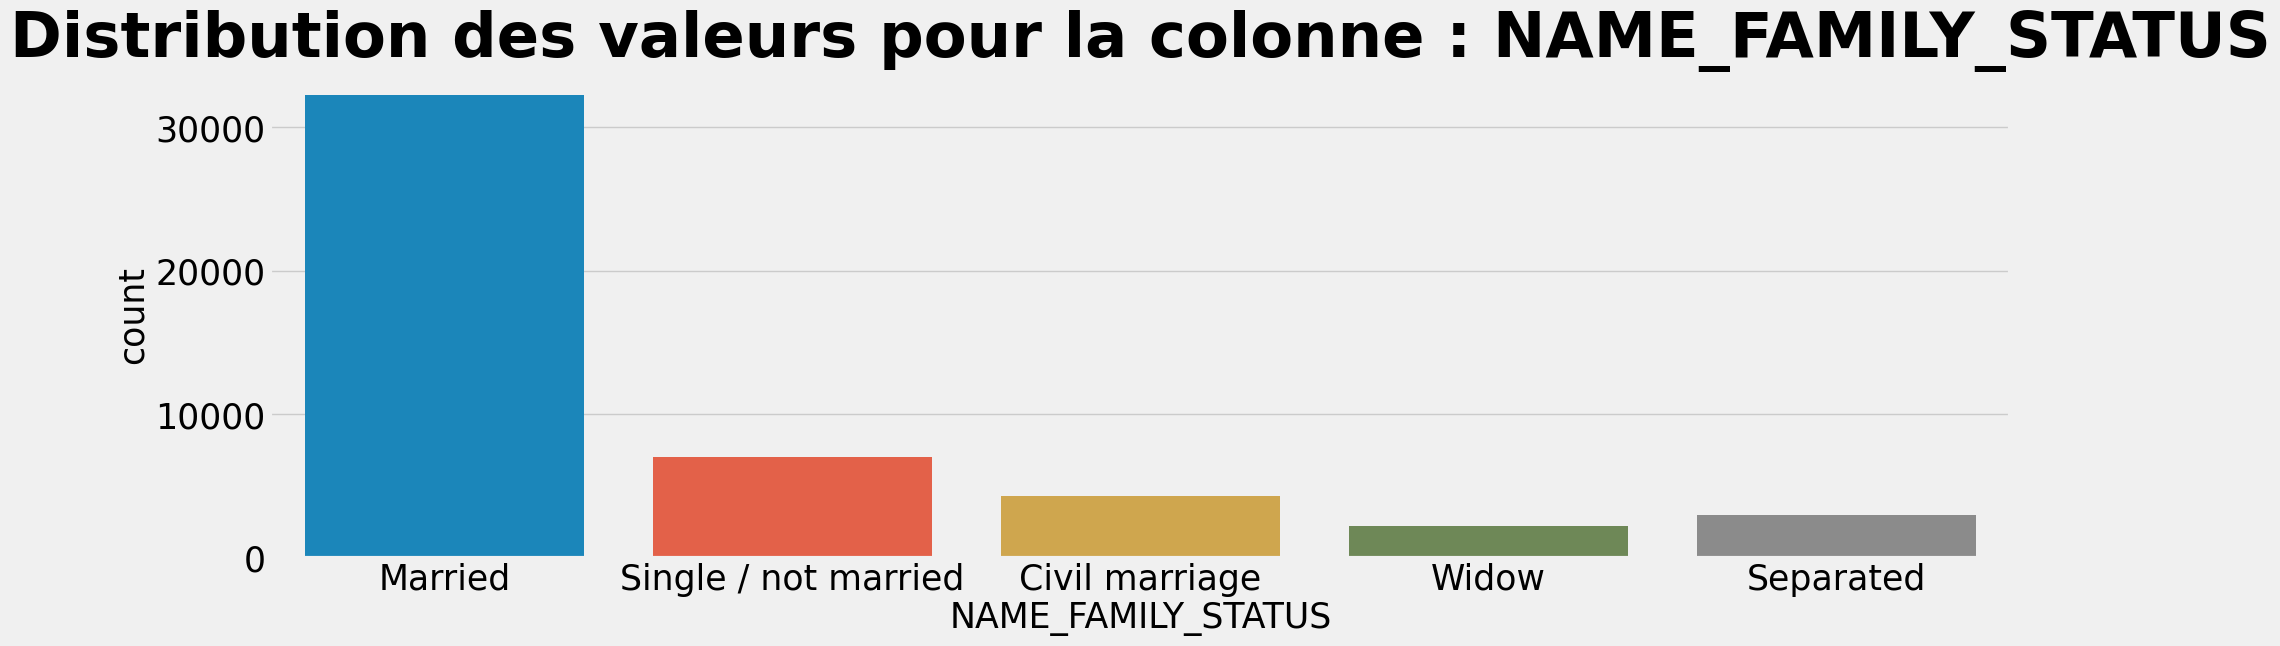

_________________________________
Nom de la colonne : NAME_HOUSING_TYPE
Nombre de valeurs uniques : 6
Pourcentage de valeurs nulles : 0.00%


['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
House / apartment      43645
With parents            2234
Municipal apartment     1617
Rented apartment         718
Office apartment         407
Co-op apartment          123


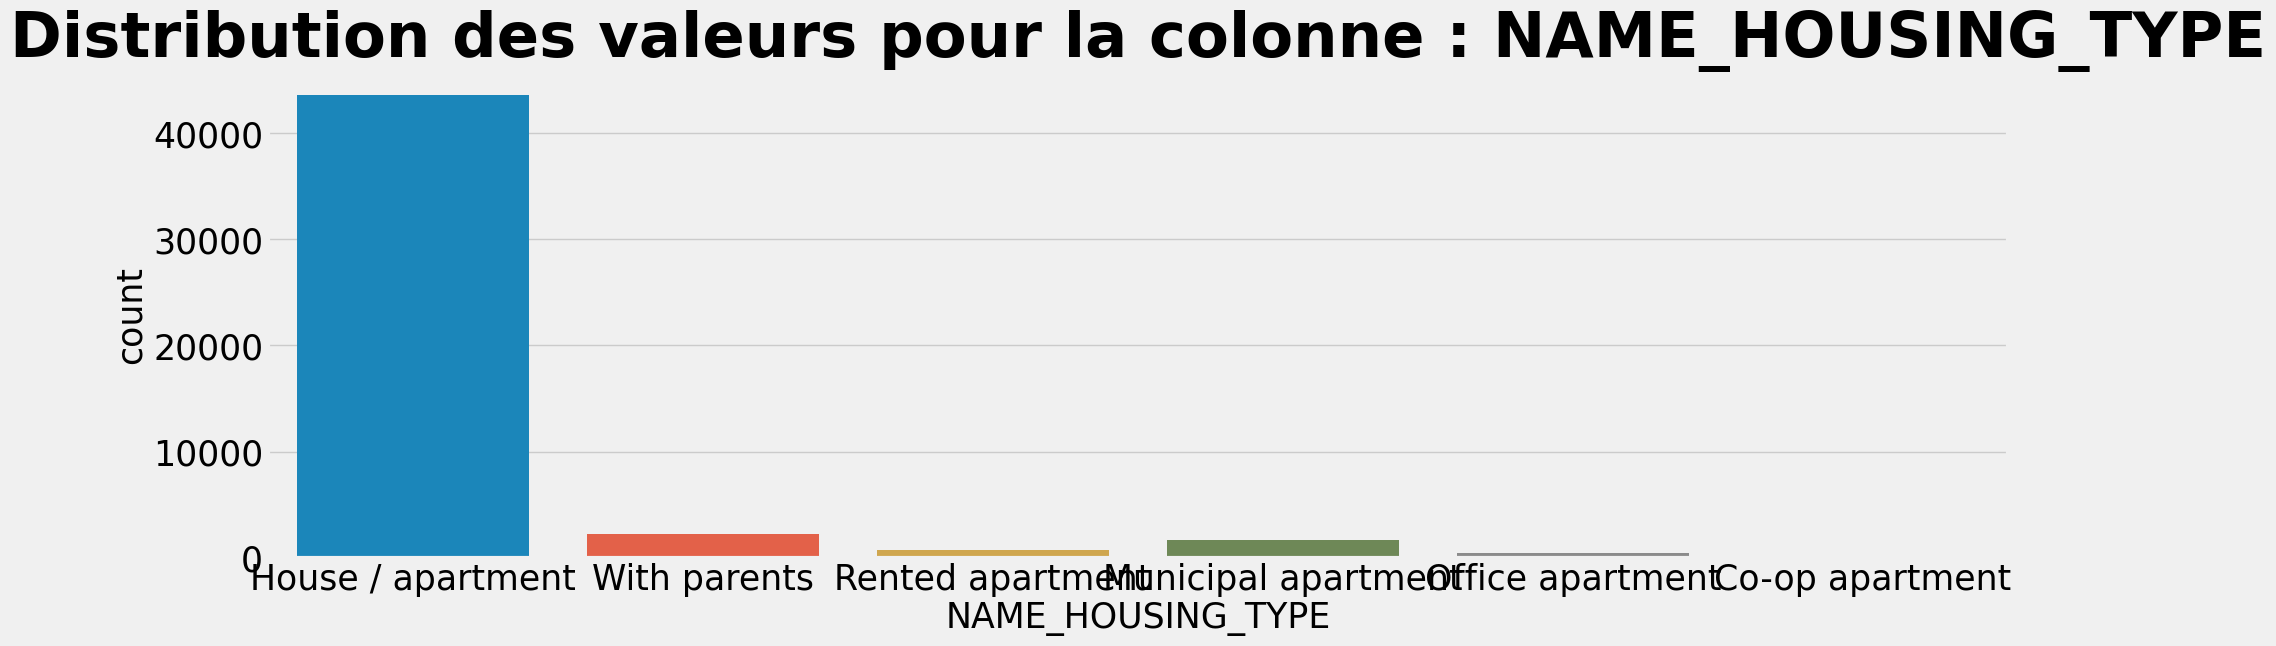

_________________________________
Nom de la colonne : OCCUPATION_TYPE
Nombre de valeurs uniques : 18
Pourcentage de valeurs nulles : 32.01%


Nom de la colonne : WEEKDAY_APPR_PROCESS_START
Nombre de valeurs uniques : 7
Pourcentage de valeurs nulles : 0.00%


['TUESDAY' 'FRIDAY' 'MONDAY' 'WEDNESDAY' 'THURSDAY' 'SATURDAY' 'SUNDAY']
TUESDAY      9751
WEDNESDAY    8457
THURSDAY     8418
MONDAY       8406
FRIDAY       7250
SATURDAY     4603
SUNDAY       1859


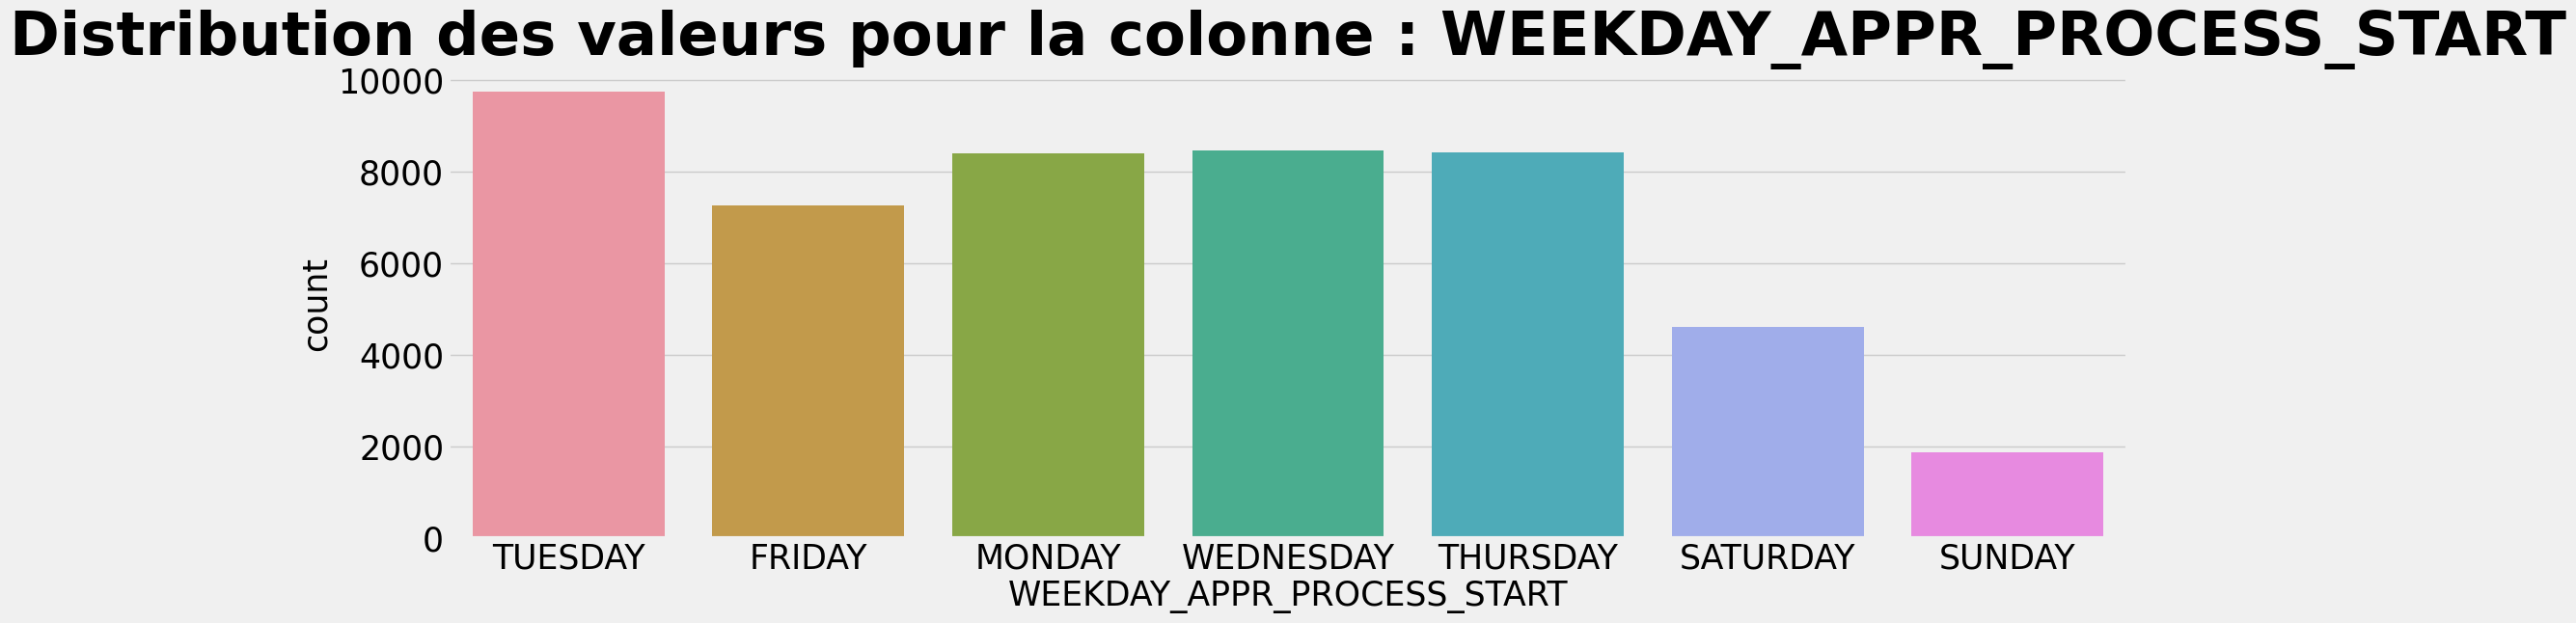

_________________________________
Nom de la colonne : ORGANIZATION_TYPE
Nombre de valeurs uniques : 58
Pourcentage de valeurs nulles : 0.00%


Nom de la colonne : FONDKAPREMONT_MODE
Nombre de valeurs uniques : 4
Pourcentage de valeurs nulles : 67.28%


[nan 'reg oper account' 'not specified' 'org spec account'
 'reg oper spec account']
reg oper account         12124
reg oper spec account     1990
org spec account           920
not specified              913


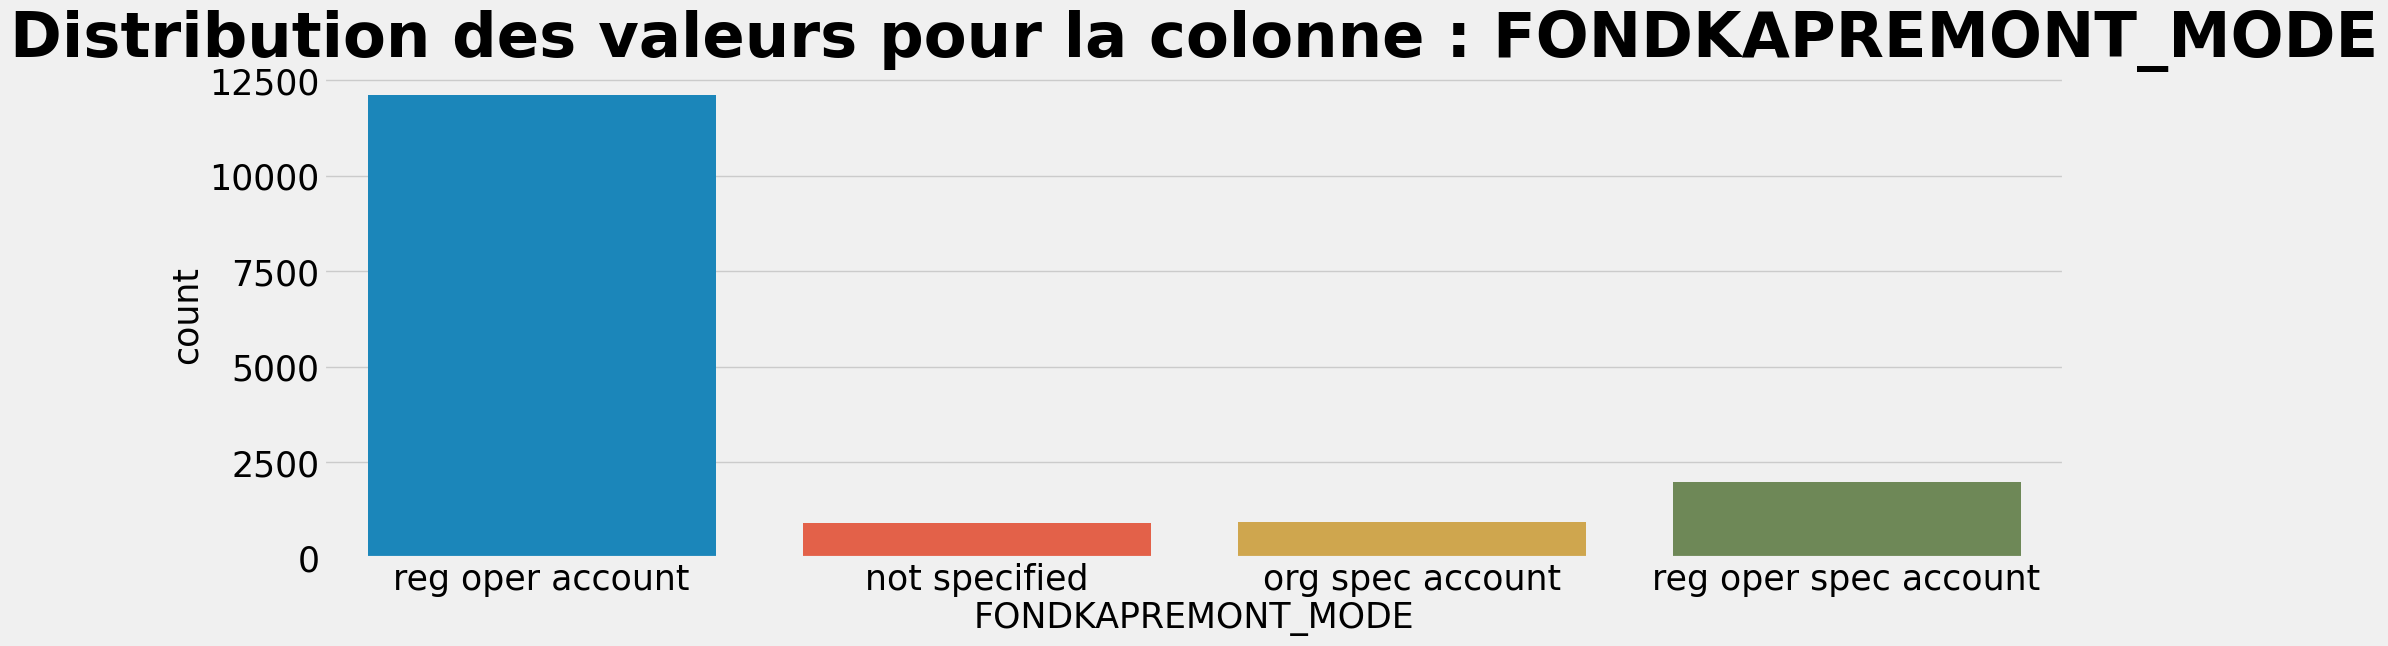

_________________________________
Nom de la colonne : HOUSETYPE_MODE
Nombre de valeurs uniques : 3
Pourcentage de valeurs nulles : 48.46%


['block of flats' nan 'specific housing' 'terraced house']
block of flats      24659
specific housing      262
terraced house        204


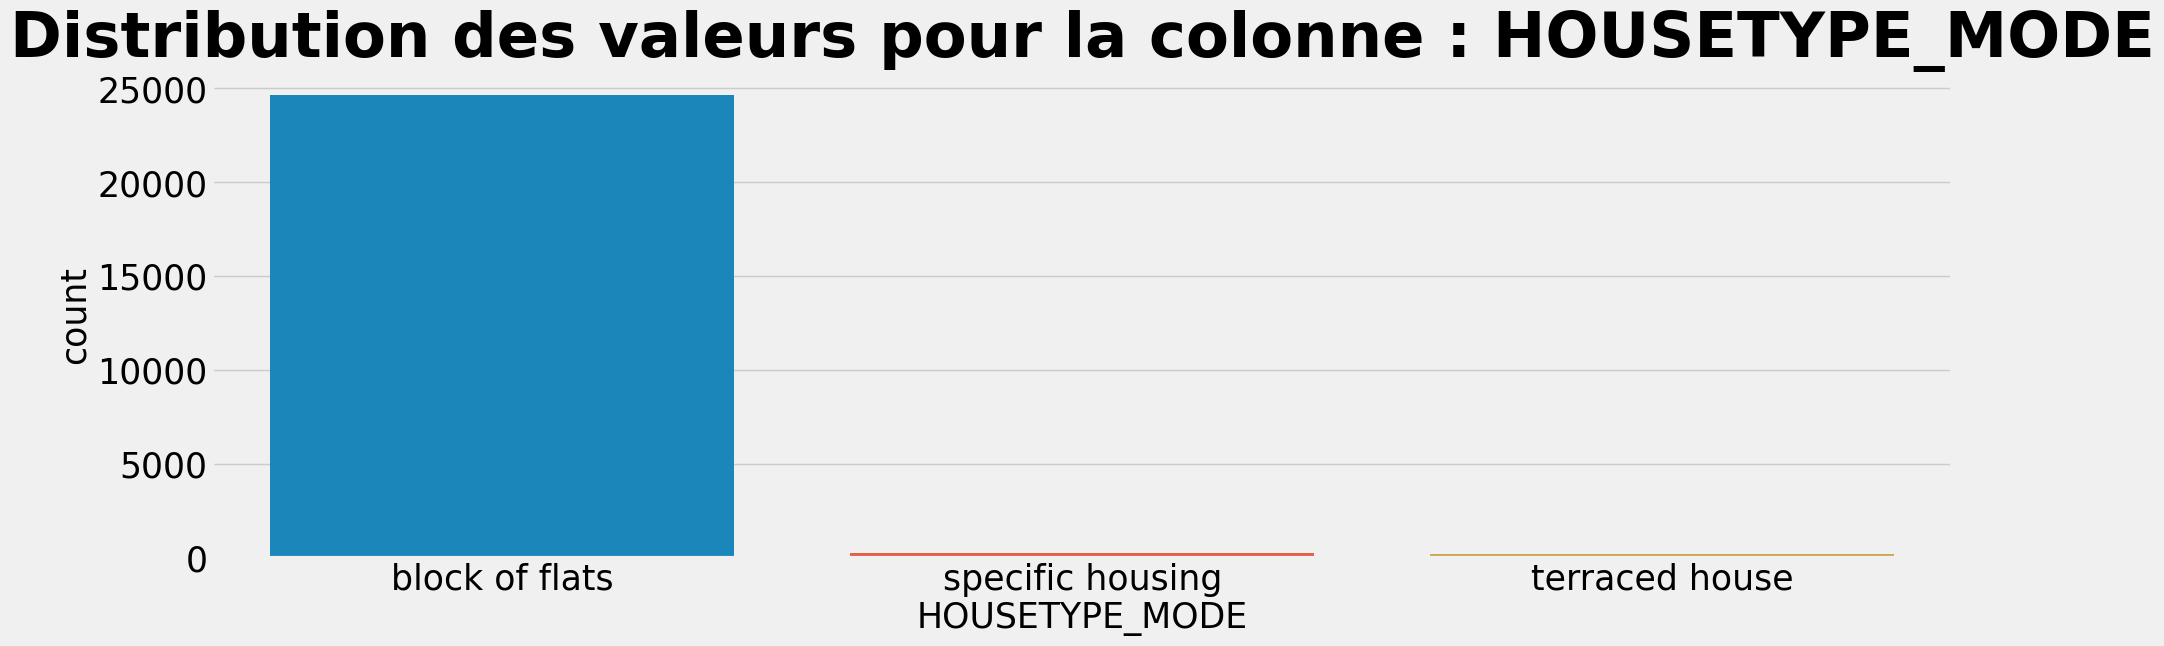

_________________________________
Nom de la colonne : WALLSMATERIAL_MODE
Nombre de valeurs uniques : 7
Pourcentage de valeurs nulles : 49.02%


['Stone, brick' nan 'Panel' 'Block' 'Wooden' 'Mixed' 'Monolithic' 'Others']
Panel           11269
Stone, brick    10434
Block            1428
Wooden            794
Mixed             353
Monolithic        289
Others            284


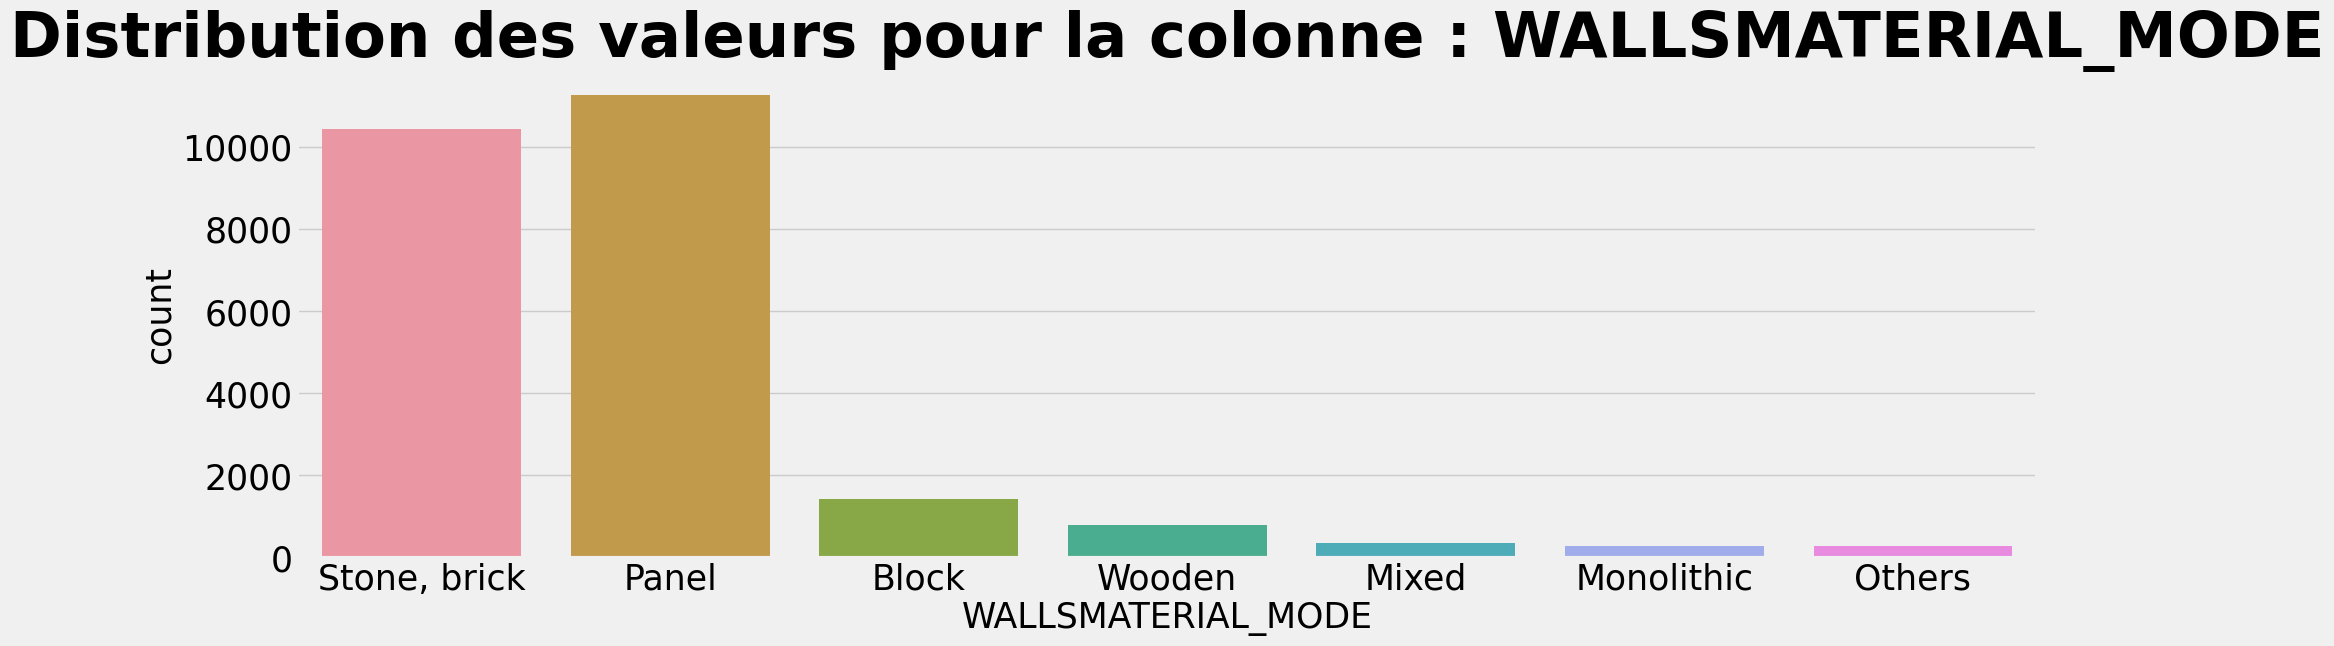

_________________________________
Nom de la colonne : EMERGENCYSTATE_MODE
Nombre de valeurs uniques : 2
Pourcentage de valeurs nulles : 45.56%


['No' nan 'Yes']
No     26179
Yes      356


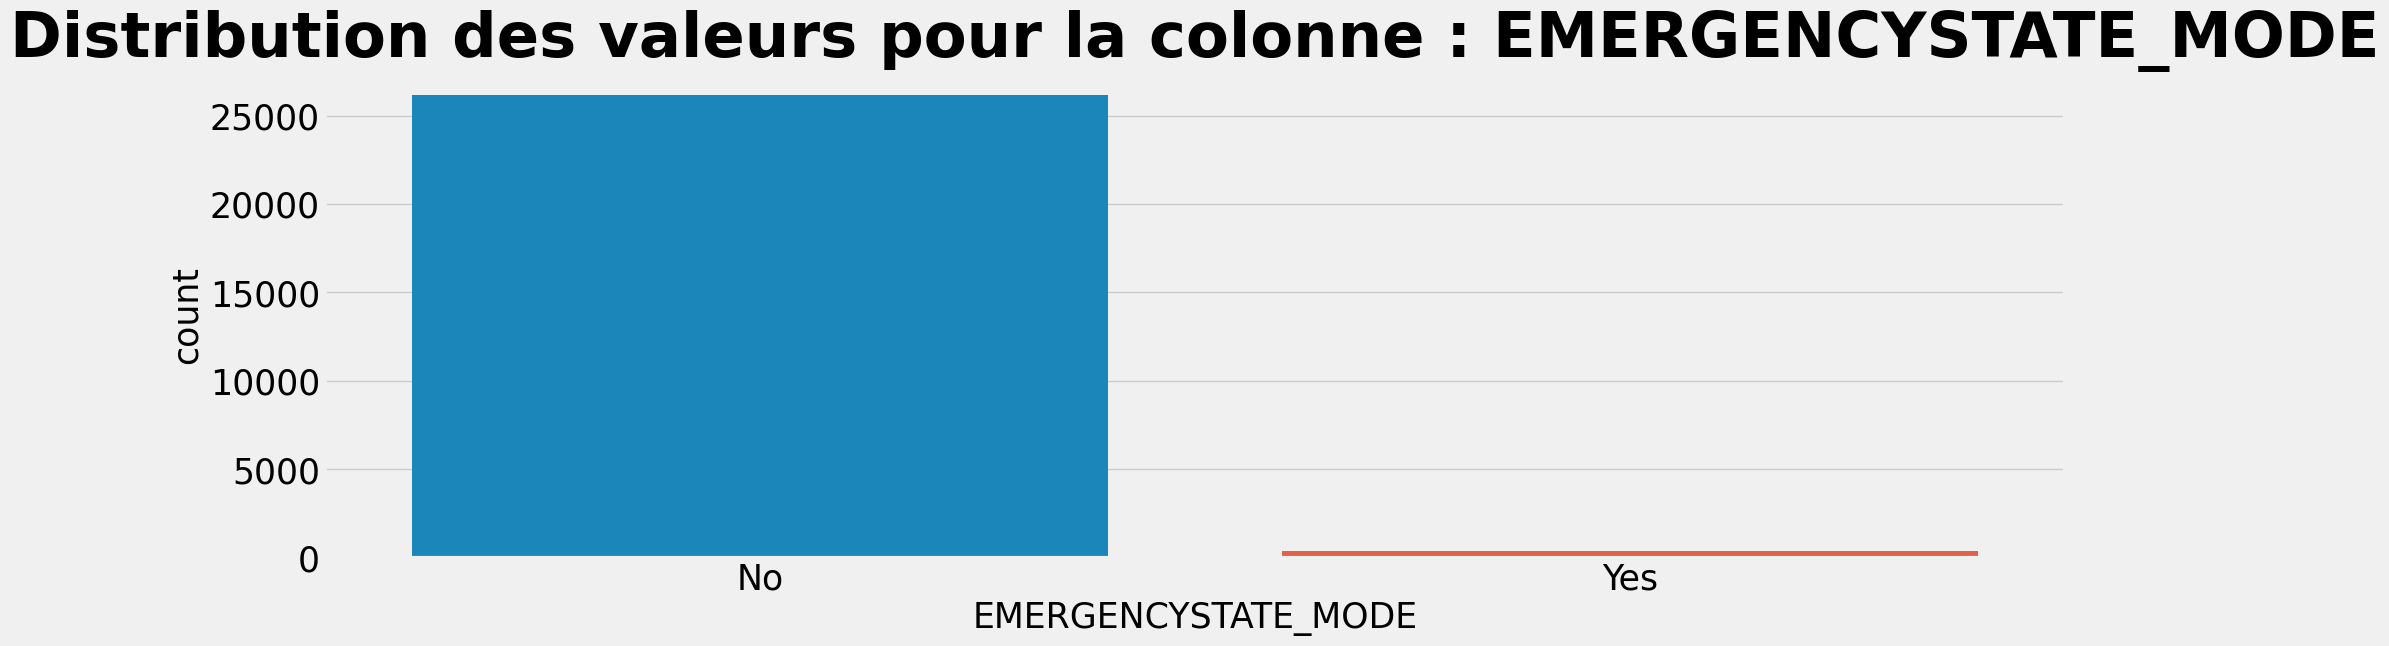

_________________________________


In [31]:
categories_uniques(df_test)

**Types de colonnes**

In [32]:
# Nombre de chaque type de colonne
df_train.dtypes.value_counts()


float64    65
int64      41
object     16
Name: count, dtype: int64

In [33]:
# Nombre de classes uniques dans chaque colonne de type objet
df_train.select_dtypes('object').nunique()


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

**Valeurs manquantes**

En modélisation, des modèles tels que XGBoost peuvent gérer les valeurs manquantes sans imputation. Plusieurs alternatives seront possibles: remplacer les NaN, supprimer les colonnes avec un pourcentage élevé de valeurs manquantes (impossible de savoir à l'avance si ces colonnes seront utiles à notre modèle). Dans l'immédiat toutes les colonnes sont conservées…

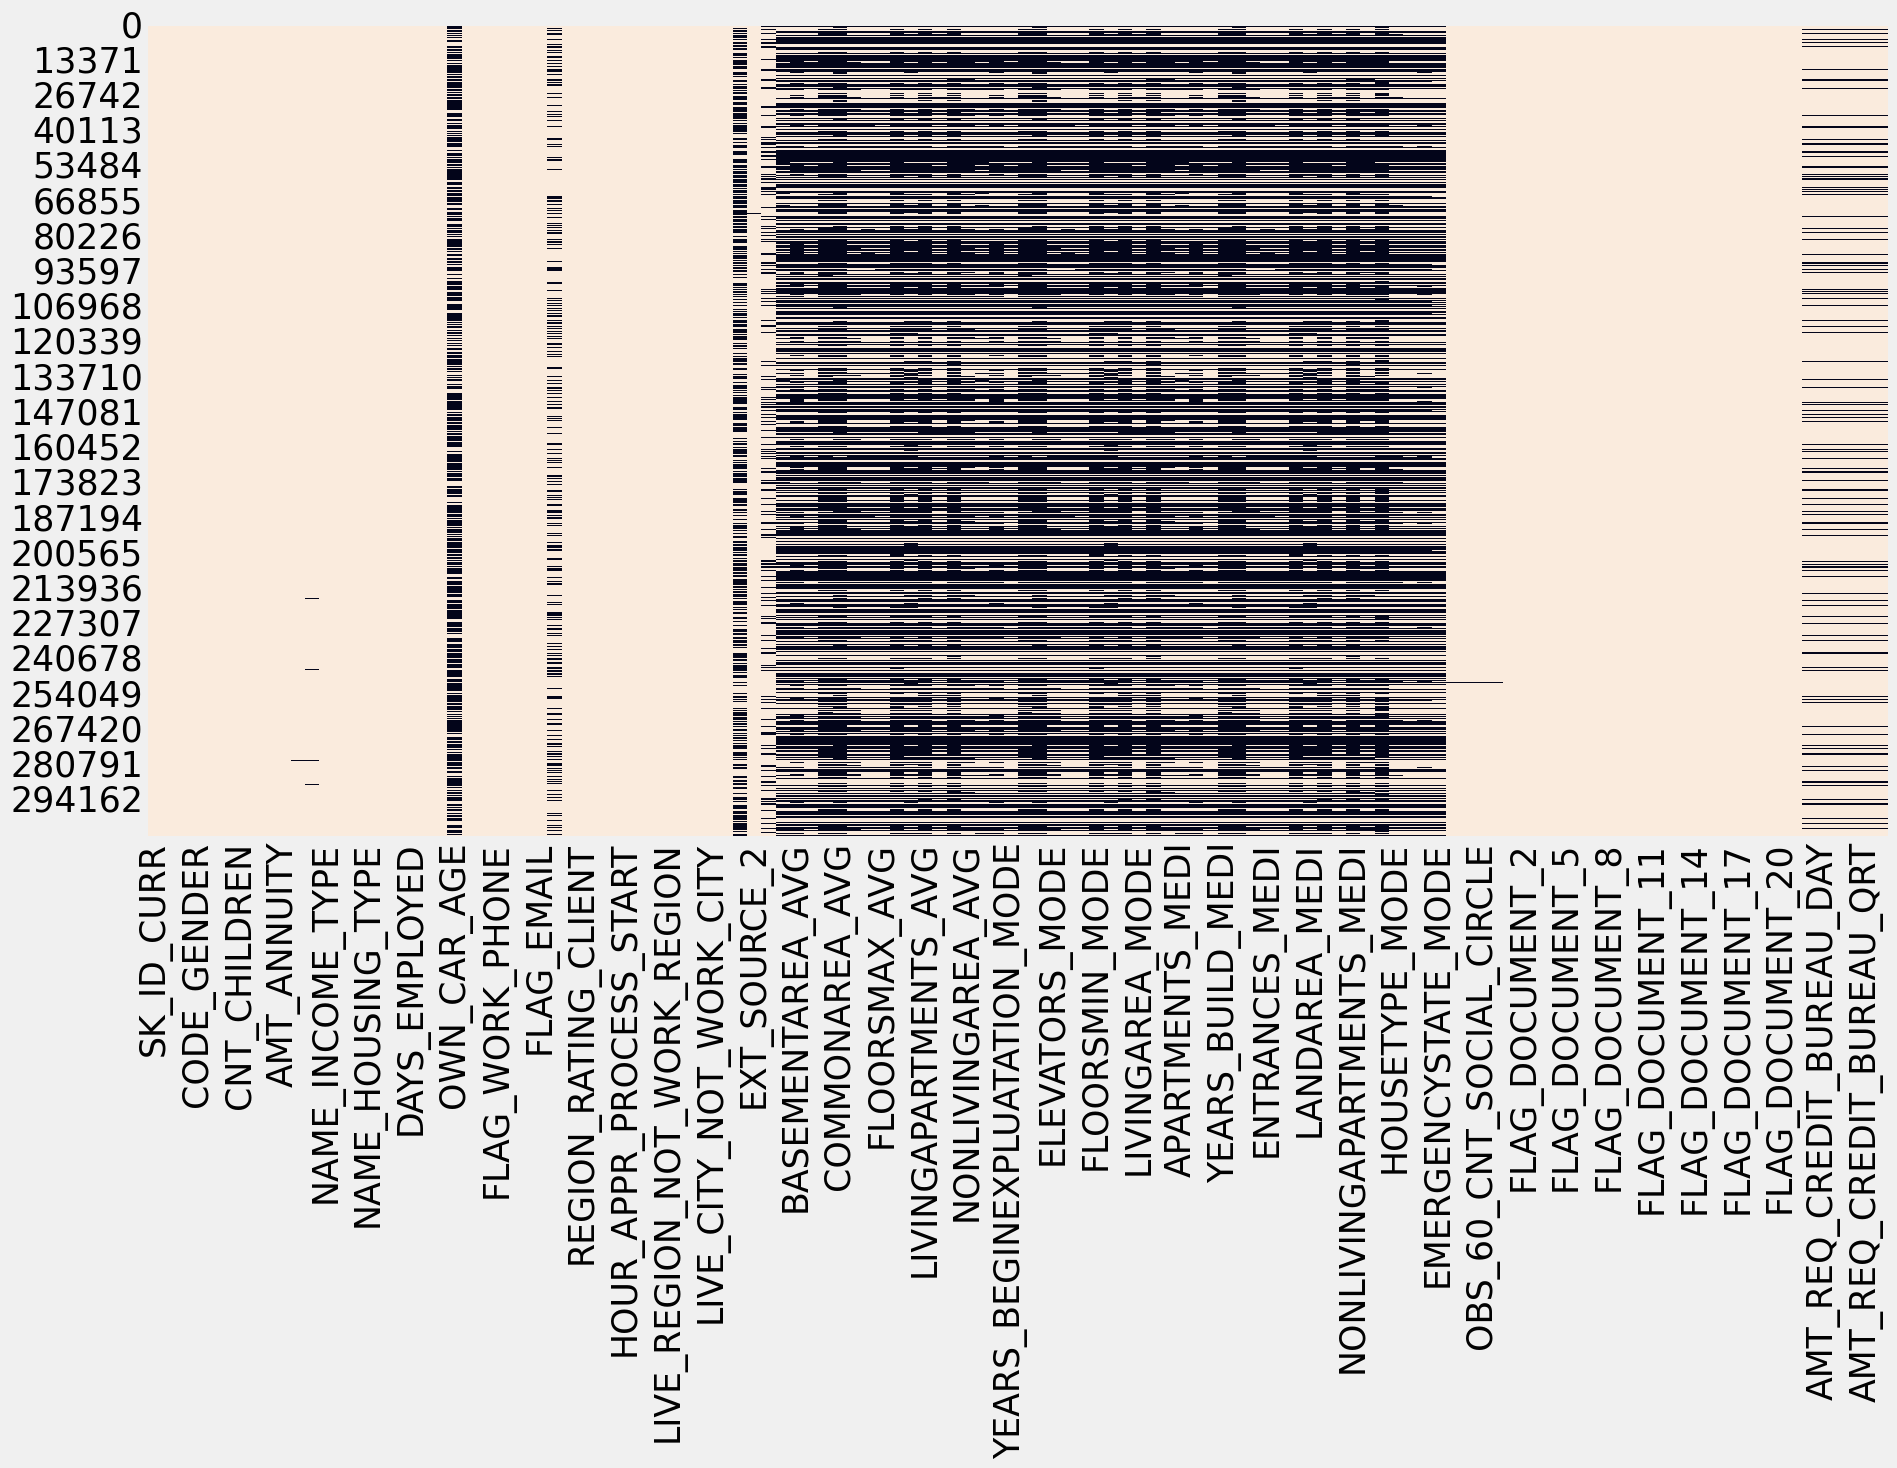

In [34]:
#Global view of the missing values (black)
plt.figure(figsize=(20,10))
sns.heatmap(df_train.notna(), cbar=False)
show()

In [36]:
def nan_check(data):
    '''Check Missing Values'''
    total = data.isnull().sum()
    percent_1 = data.isnull().sum()/data.isnull().count()*100
    percent_2 = (np.round(percent_1, 2))
    missing_data = pd.concat([total, percent_2], 
                             axis=1, keys=['Total', '%']).sort_values('%', ascending=False)
    return missing_data

print('TOP 10 Missing values from Training dataset')
nan_check(df_train)[:15]

TOP 10 Missing values from Training dataset


Total      %
COMMONAREA_MEDI           214865  69.87
COMMONAREA_AVG            214865  69.87
COMMONAREA_MODE           214865  69.87
NONLIVINGAPARTMENTS_MODE  213514  69.43
NONLIVINGAPARTMENTS_AVG   213514  69.43
NONLIVINGAPARTMENTS_MEDI  213514  69.43
FONDKAPREMONT_MODE        210295  68.39
LIVINGAPARTMENTS_MODE     210199  68.35
LIVINGAPARTMENTS_AVG      210199  68.35
LIVINGAPARTMENTS_MEDI     210199  68.35
FLOORSMIN_AVG             208642  67.85
FLOORSMIN_MODE            208642  67.85
FLOORSMIN_MEDI            208642  67.85
YEARS_BUILD_MEDI          204488  66.50
YEARS_BUILD_MODE          204488  66.50

In [38]:
print("Nb of columns in the training sample: " + str(len(nan_check(df_train))))

print("Nb of columns in the training sample with missing values: " + 
      str(len(nan_check(df_train)[nan_check(df_train)['Total']!=0])))

Nb of columns in the training sample: 122
Nb of columns in the training sample with missing values: 67


**Outliers, valeurs atypiques, anormales**

In [41]:
# Âge du client en jours au moment de la demande (déf. depuis HomeCredit_columns_description.csv)

print('DAYS_BIRTH describe: ')
df_train['colonne DAYS_BIRTH'].describe()

DAYS_BIRTH describe: 


count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

Les nombres de la colonne DAYS_BIRTH sont négatifs car ils sont enregistrés par rapport à la demande de prêt en cours. Il est nécessaire de modifier cette variable pour obtenir des chiffres plus compréhensibles pour l'analyse.

In [42]:
(df_train['DAYS_BIRTH'] / -365).describe()


count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

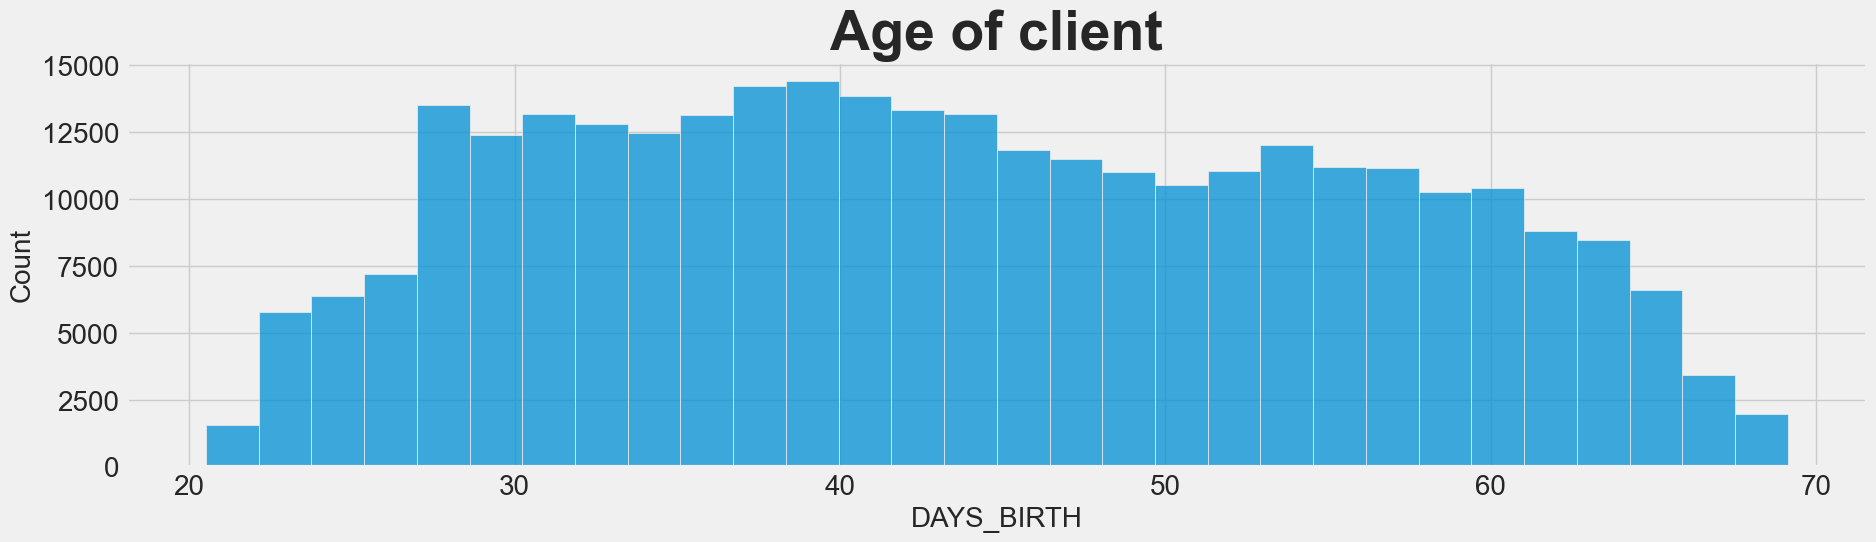

In [92]:
plt.figure(figsize=(20, 5))
sns.histplot((df_train['DAYS_BIRTH'] / -365), bins = 30).set_title('Age of client')
show()

In [44]:
# Combien de jours avant la demande la personne... (déf. depuis HomeCredit_columns_description.csv)
df_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [45]:
df_test['DAYS_EMPLOYED'].describe()

count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

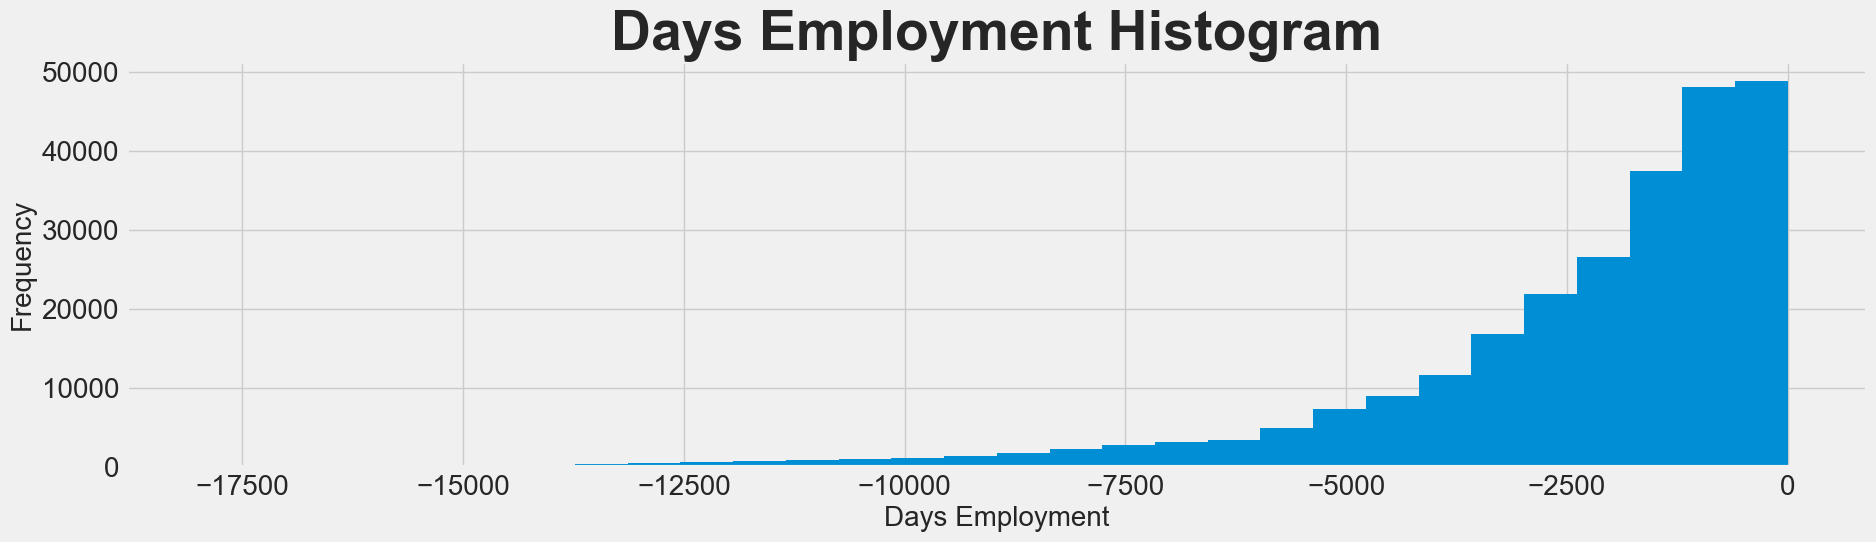

In [93]:
df_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram', figsize=(20,5), bins = 30);
plt.xlabel('Days Employment')
show()

ces données ne sont pas "normales" au sens où le Max. représente 1000 années (365243/365j). Est-ce un individu isolé? Plusieurs individus de l'échantillon?

In [50]:
print("%0.0f values with 365243 days employed for training data" % 
      len(df_train[df_train['DAYS_EMPLOYED'] == 365243]))
print("%0.0f Total values from days employed for training data" % df_train.shape[0])
print("***********************")
print("%0.0f values with 365243 days employed for testing data" % 
      len(df_test[df_test['DAYS_EMPLOYED'] == 365243]))
print("%0.0f Total values from days employed for testing data" % df_test.shape[0])

55374 values with 365243 days employed for training data
307511 Total values from days employed for training data
***********************
9274 values with 365243 days employed for testing data
48744 Total values from days employed for testing data


In [57]:
# Créer une colonne d'indicateurs pour les valeurs aberrantes
df_train['DAYS_EMPLOYED_OUTLIERS'] = df_train["DAYS_EMPLOYED"] == 365243
df_test['DAYS_EMPLOYED_OUTLIERS'] = df_test["DAYS_EMPLOYED"] == 365243

# Remplacer les valeurs aberrantes par NaN
df_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
df_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)


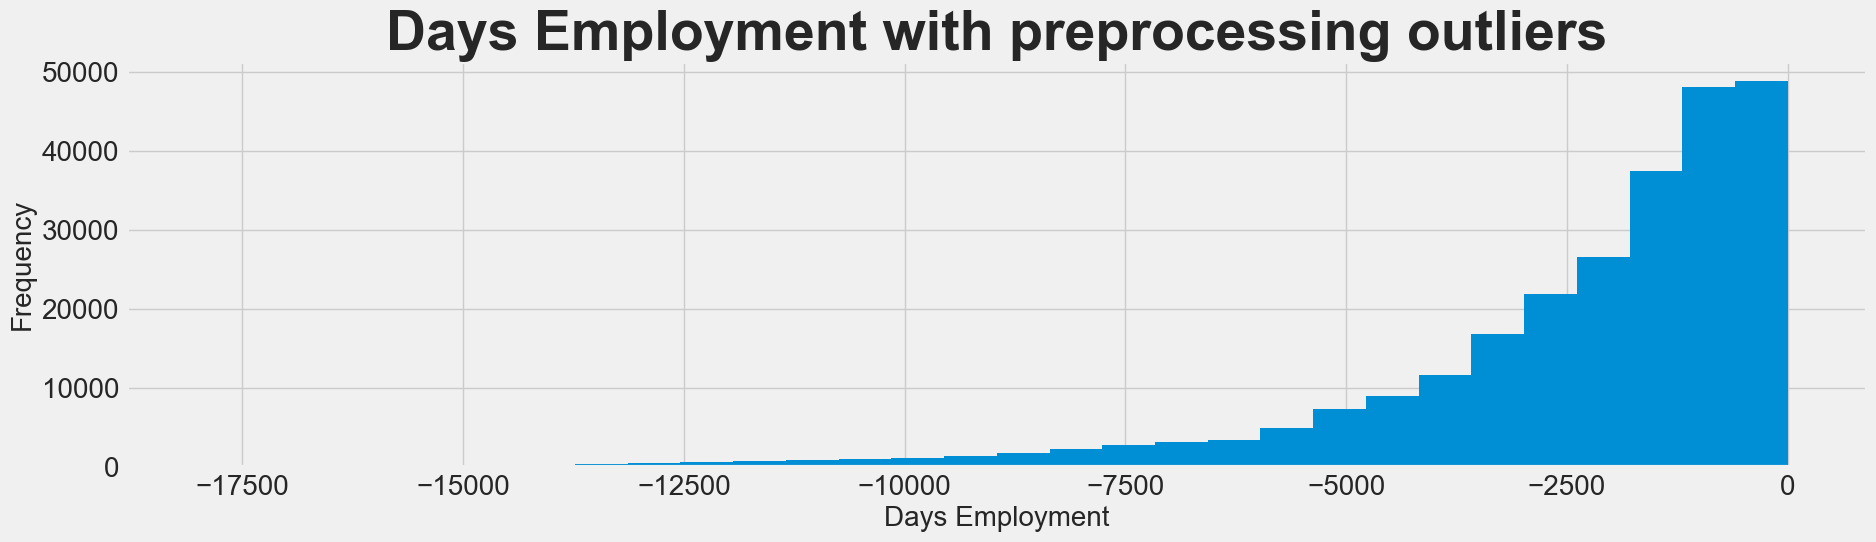

In [94]:
df_train['DAYS_EMPLOYED'].plot.hist(title ='Days Employment with preprocessing outliers', figsize=(20,5), bins = 30)
plt.xlabel('Days Employment')
show()

**Fonctions pour faciliter l'analyse des principales variables…**

Il est important de se focaliser sur les principales features pouvant être explicatives. Ici l'idée n'est pas de tout analyser en univarié ou multivarié, mais simplement d'avoir une image des points métiers qui aident à orienter nos décisions dans la "prise de risque" à l'attribution d'un crédit.

In [95]:
def plot_stat(data, feature, title) : 
    
    ax, fig = plt.subplots(figsize=(20,8)) 
    ax = sns.countplot(y=feature, data=data, order=data[feature].value_counts(ascending=False).index)
    ax.set_title(title)

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width()/len(data[feature]))
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

    show()
    
    
    
def plot_percent_target1(data, feature, title) : 
    
    cat_perc = data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    ax, fig = plt.subplots(figsize=(20,8)) 
    ax = sns.barplot(y=feature, x='TARGET', data=cat_perc)
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel("Percent of target with value 1")

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width())
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

    show()    

**Loan types** - Distribution du type de prêts contractés + comparatif avec le pourcentage des prêts avec la valeur TARGET 1(prêt non retourné).

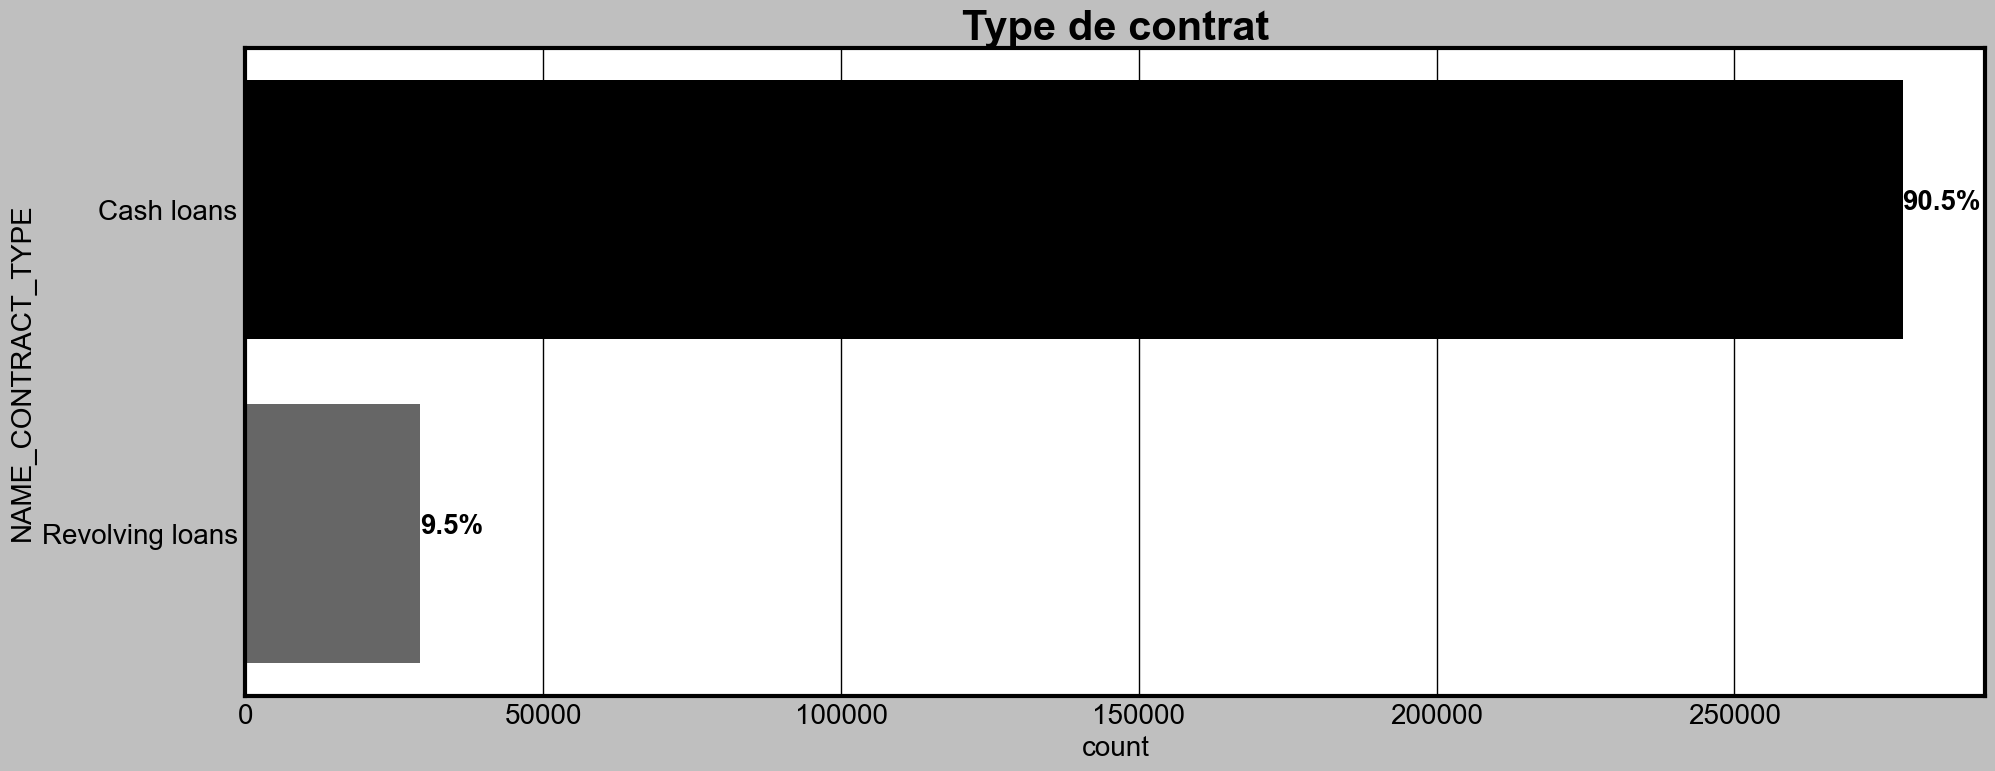

                                   -------------------------------------------------------


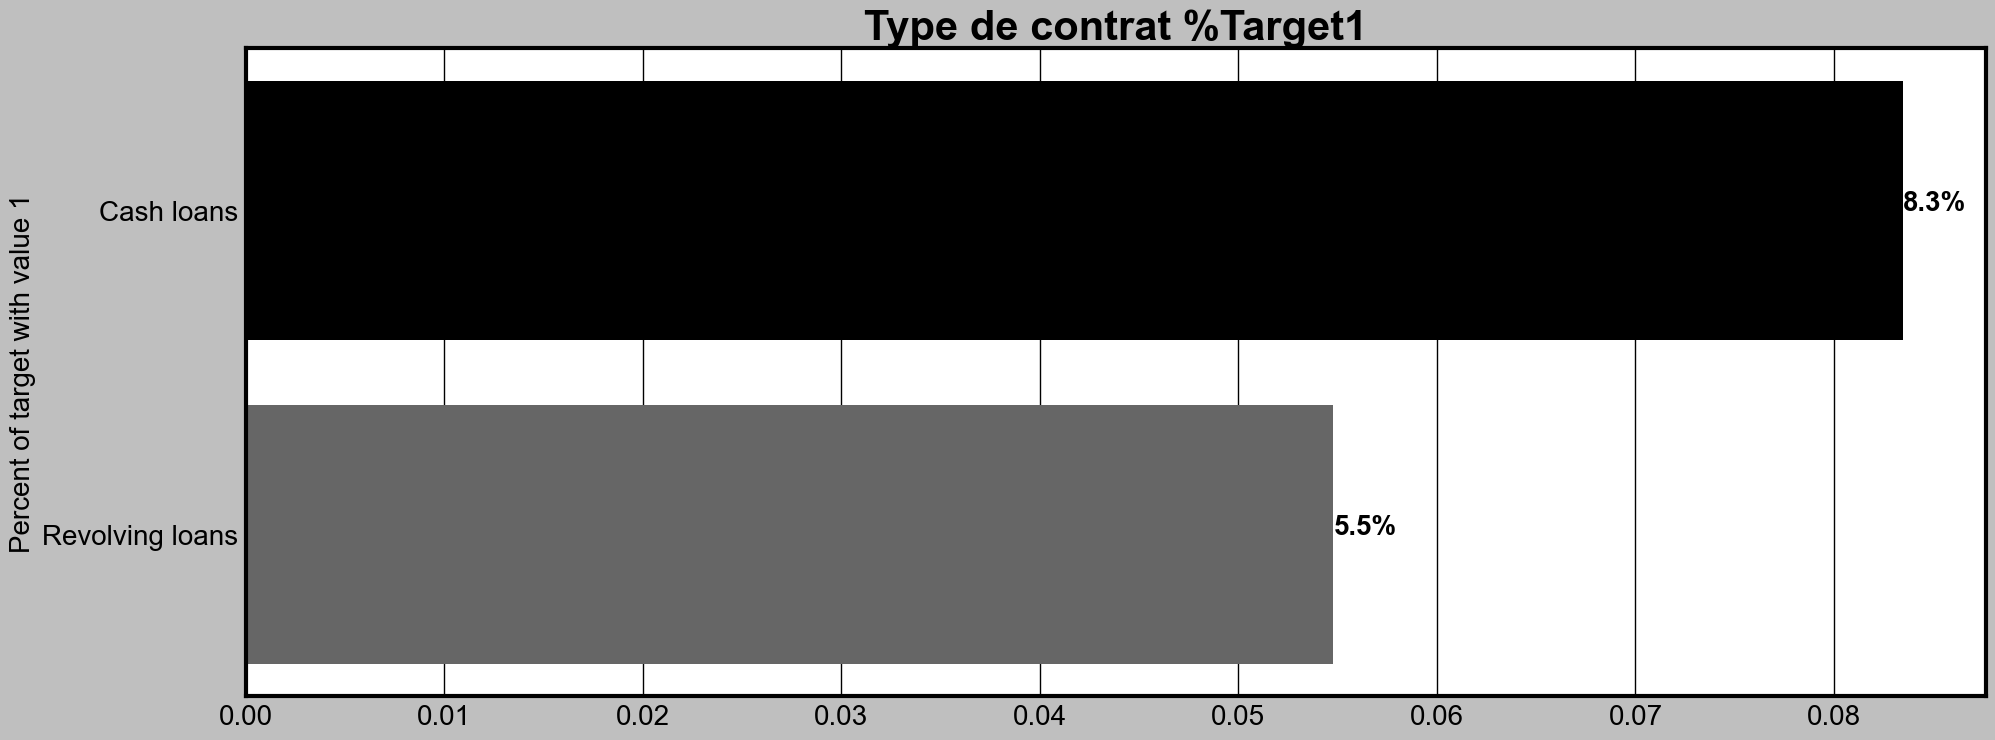

In [102]:
#NAME_CONTRACT_TYPE
plot_stat(df_train, 'NAME_CONTRACT_TYPE',"Type de contrat")
print("                                   -------------------------------------------------------")
plot_percent_target1(df_train, 'NAME_CONTRACT_TYPE',"Type de contrat %Target1")

Les prêts renouvelables ne représentent qu'une petite fraction (10%) du nombre total de prêts; dans le même temps, un plus grand nombre de crédits renouvelables, par rapport à leur fréquence, ne sont pas remboursés.

**Client gender** - Distribution H/F clients, mais aussi le pourcentage des prêts (par sexe du client) avec la valeur TARGET 1 (prêt non retourné).

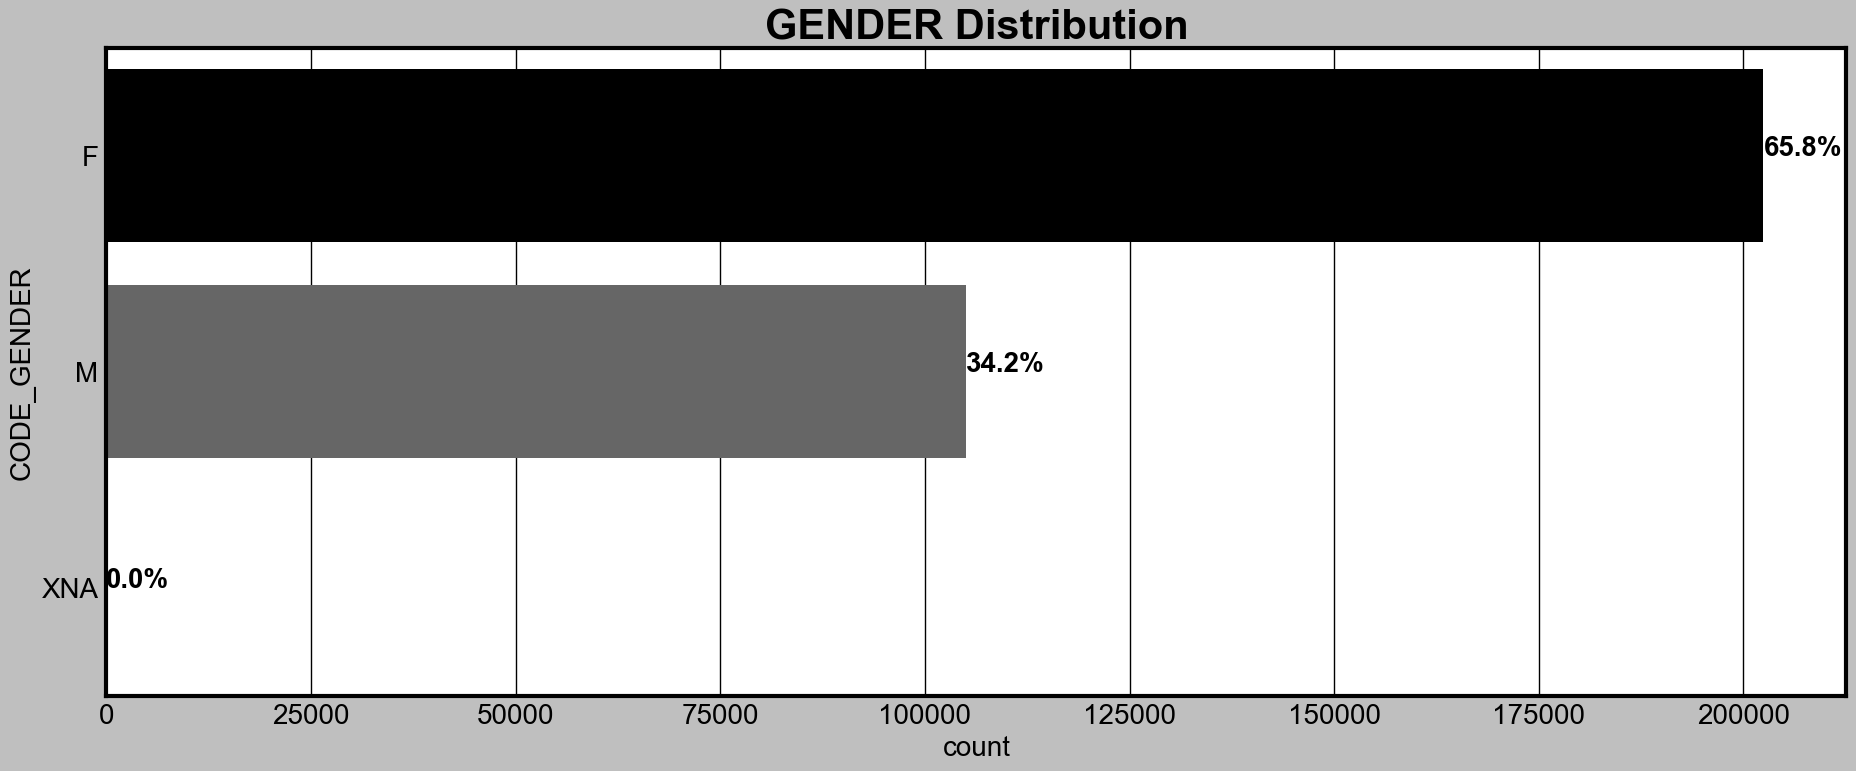

                                   -------------------------------------------------------


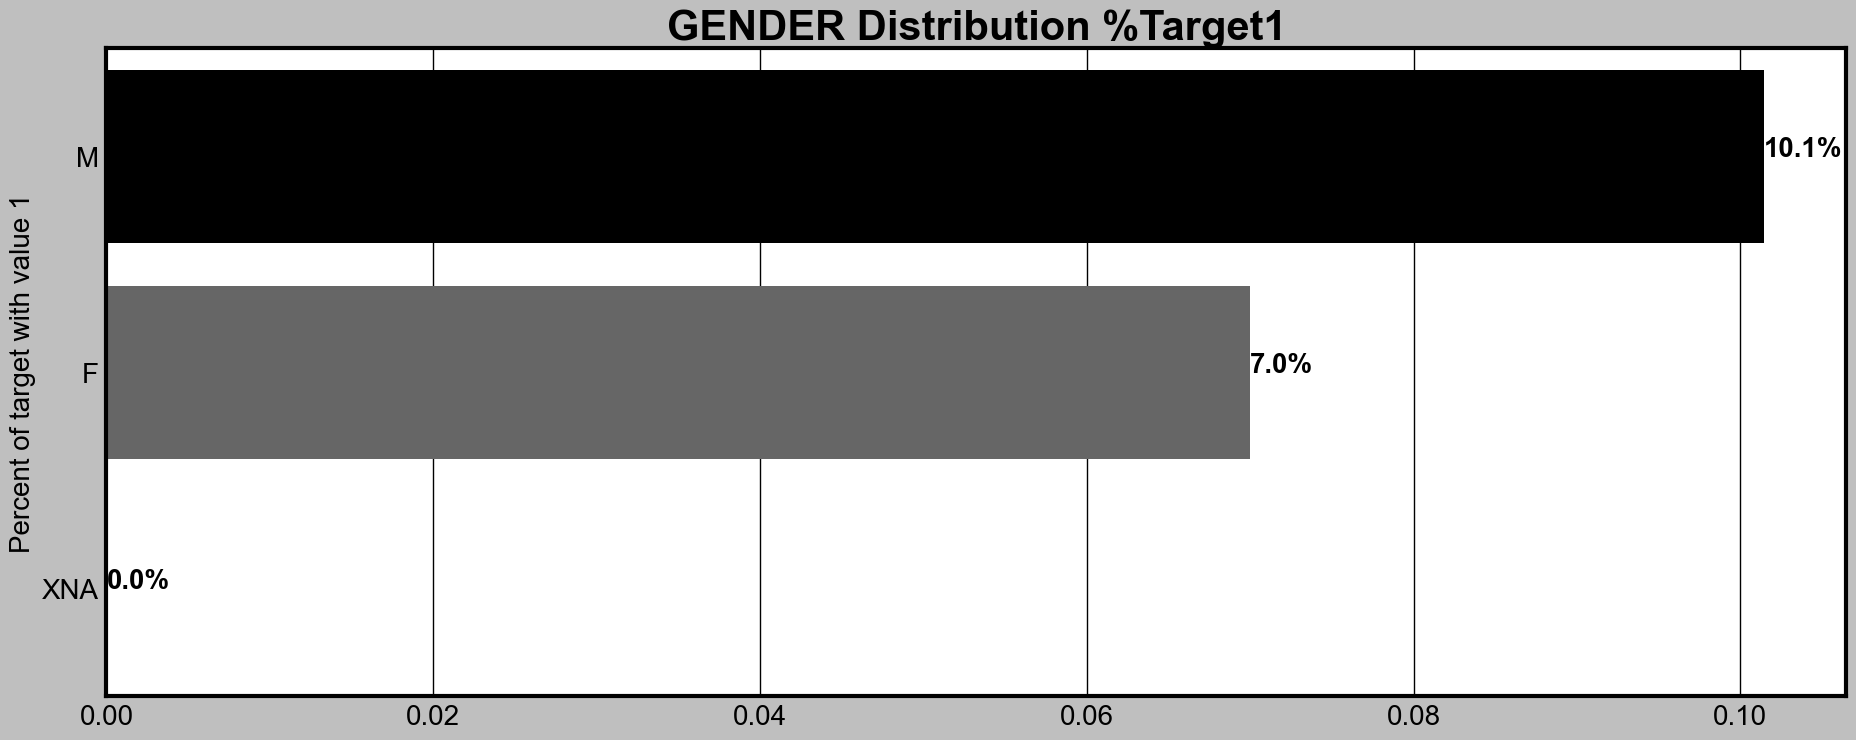

In [103]:
#CODE_GENDER
plot_stat(df_train, 'CODE_GENDER',"GENDER Distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(df_train, 'CODE_GENDER',"GENDER Distribution %Target1")

Le nombre de clients féminins est presque le double du nombre de clients masculins. En ce qui concerne le pourcentage de crédits en souffrance, les hommes ont plus de chances de ne pas rembourser leurs prêts (10%), comparativement aux femmes (7%).

**Flag own car** - Distribution d'un impact possible entre les clients propriétaire d'un véhicule et ceux qui ne le sont pas…

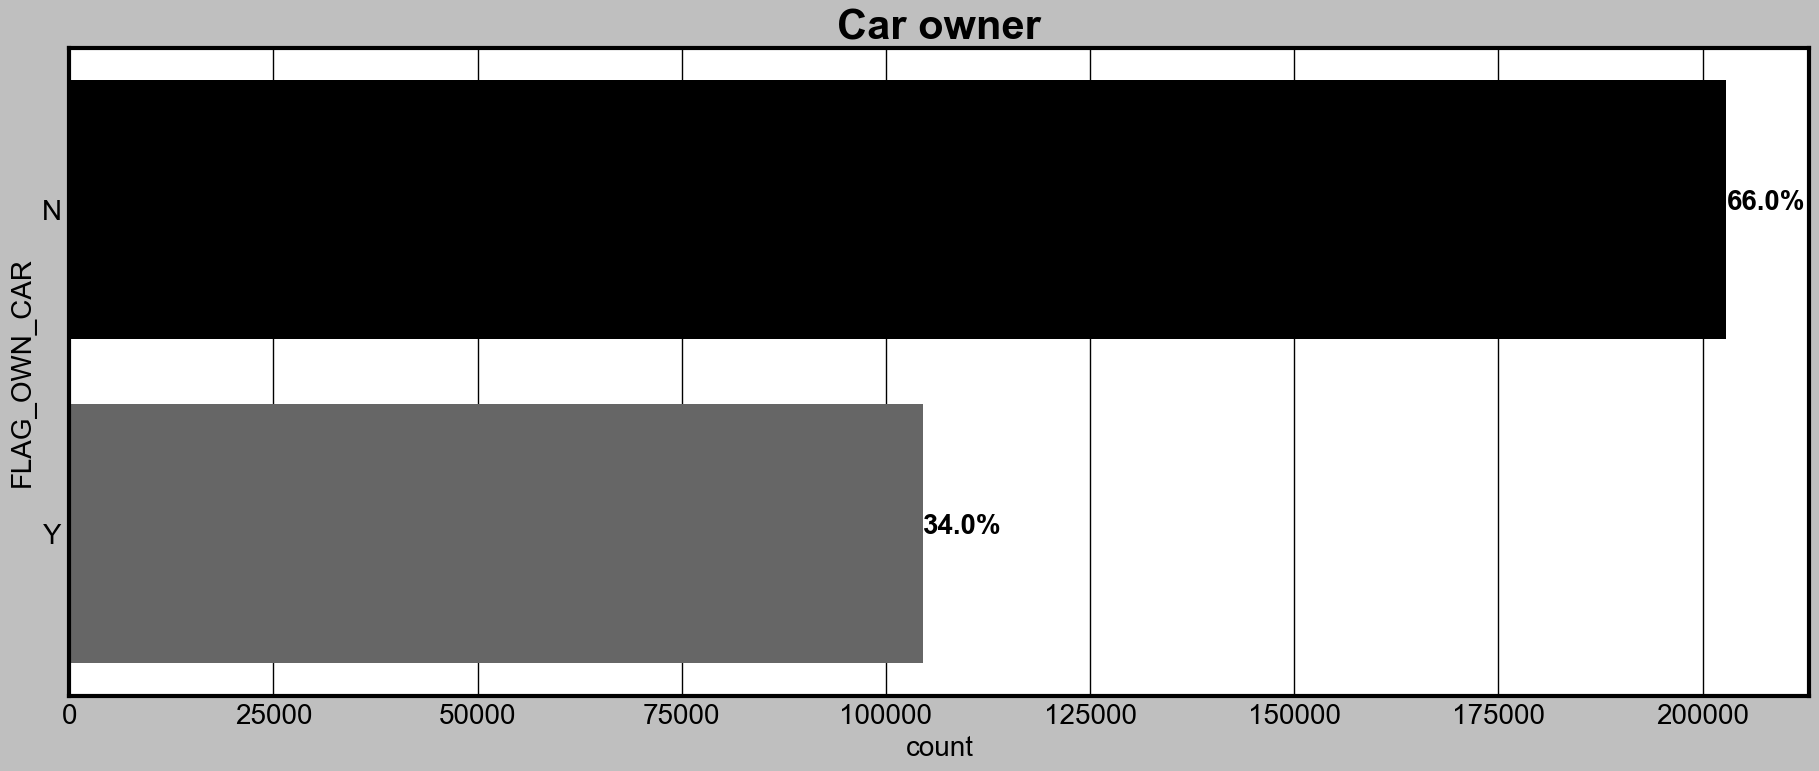

                                   -------------------------------------------------------


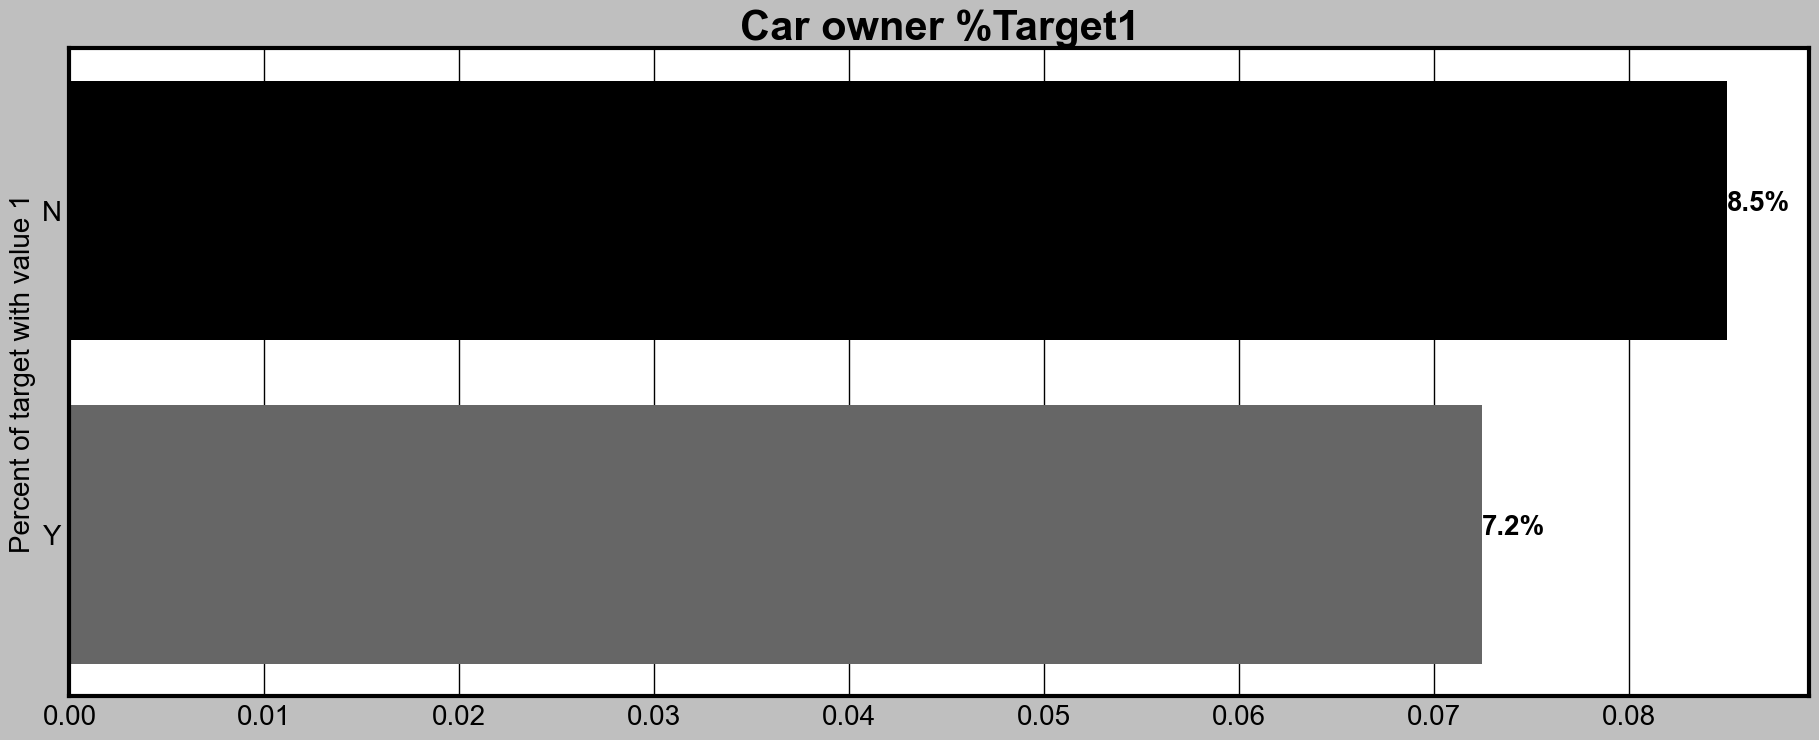

In [104]:
#FLAG_OWN_CAR
plot_stat(df_train, 'FLAG_OWN_CAR',"Car owner")
print("                                   -------------------------------------------------------")
plot_percent_target1(df_train, 'FLAG_OWN_CAR',"Car owner %Target1")

Les deux catégories (propriétaire ou non) ont des taux de non-remboursement d'environ 8%.

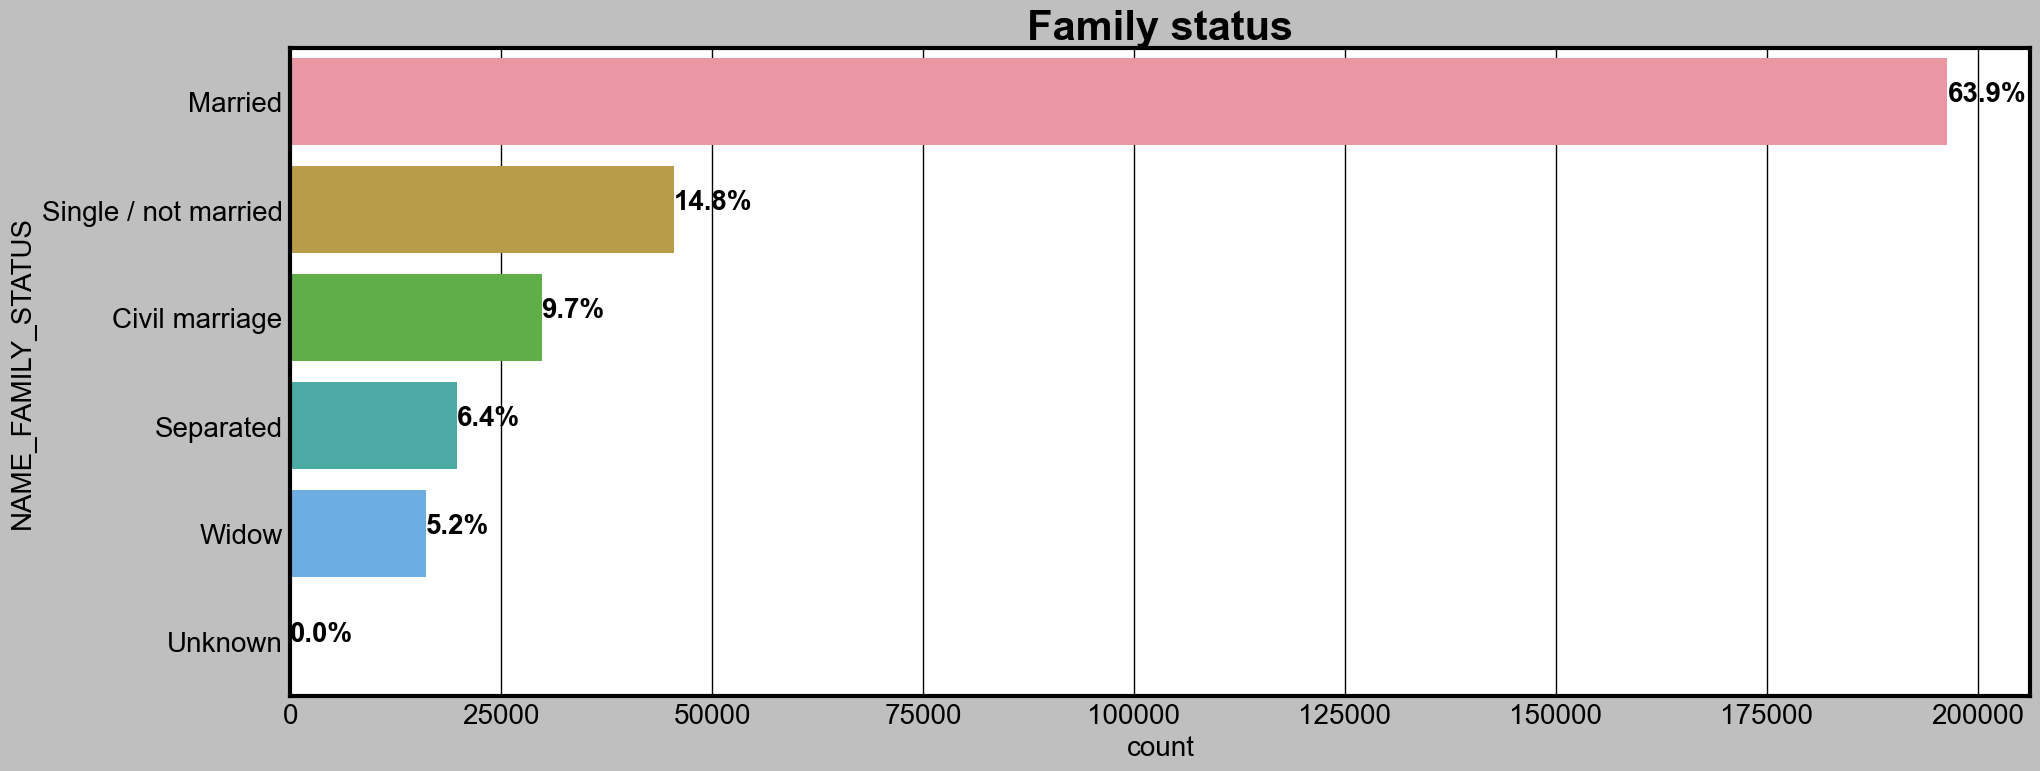

                                   -------------------------------------------------------


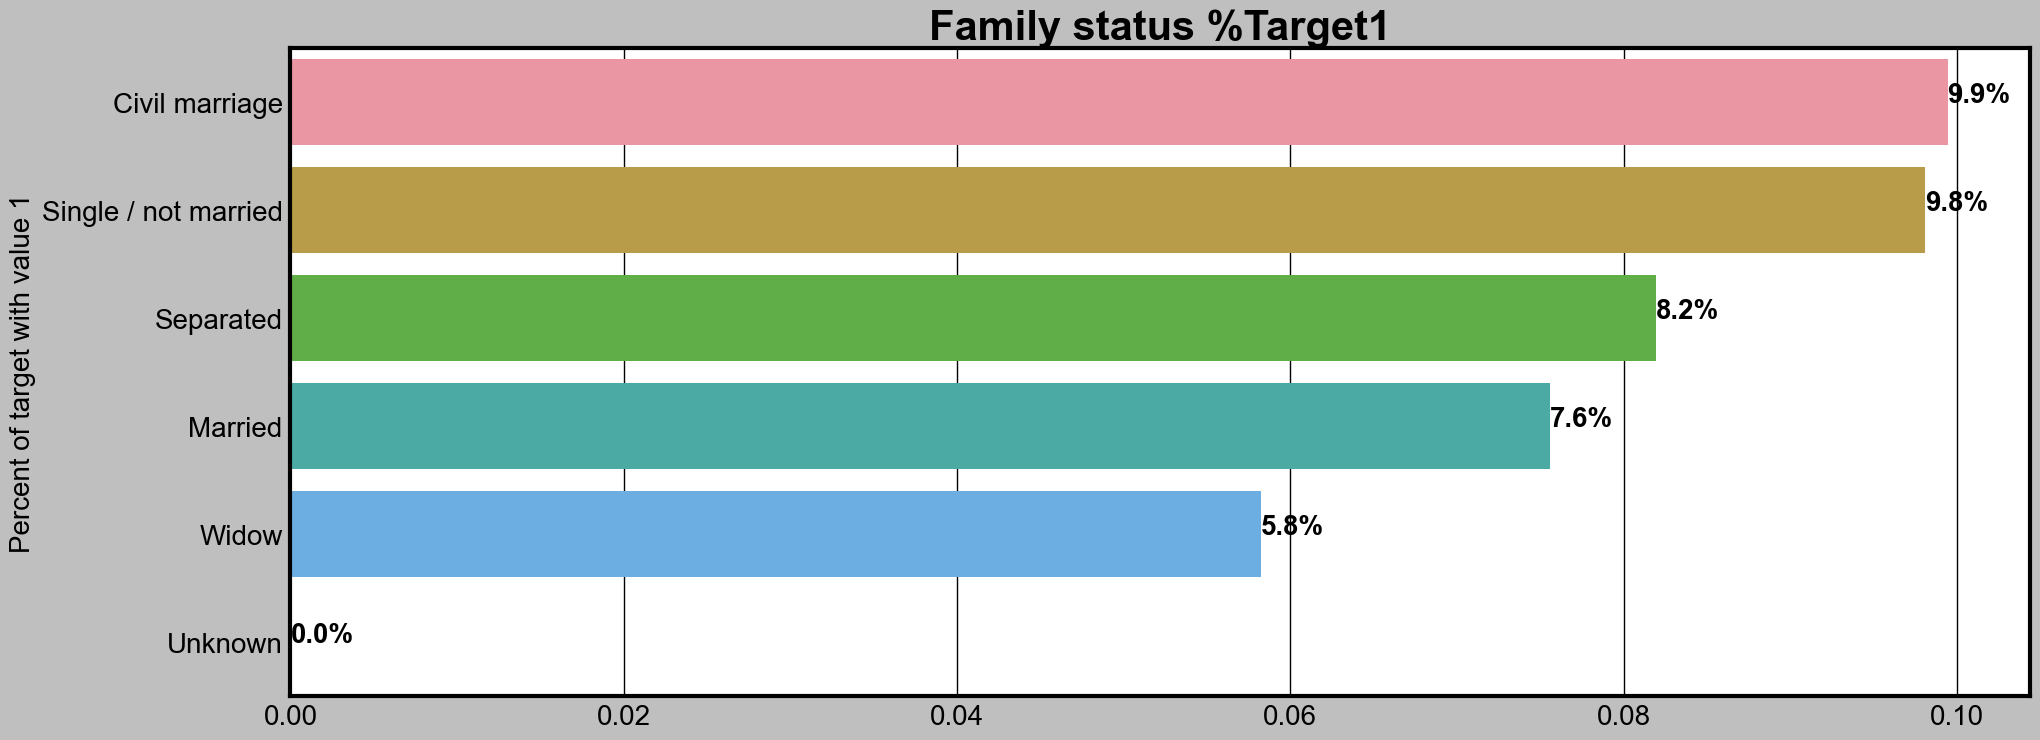

In [105]:
#NAME_FAMILY_STATUS
plot_stat(df_train, 'NAME_FAMILY_STATUS',"Family status")
print("                                   -------------------------------------------------------")
plot_percent_target1(df_train, 'NAME_FAMILY_STATUS',"Family status %Target1")

La plupart des clients sont mariés, suivis des célibataires / non mariés et des mariages civils.

En termes de pourcentage de non-remboursement du prêt, le mariage civil a le pourcentage le plus élevé de non-remboursement (10%), la veuve étant le plus bas (à l'exception de l'inconnu).

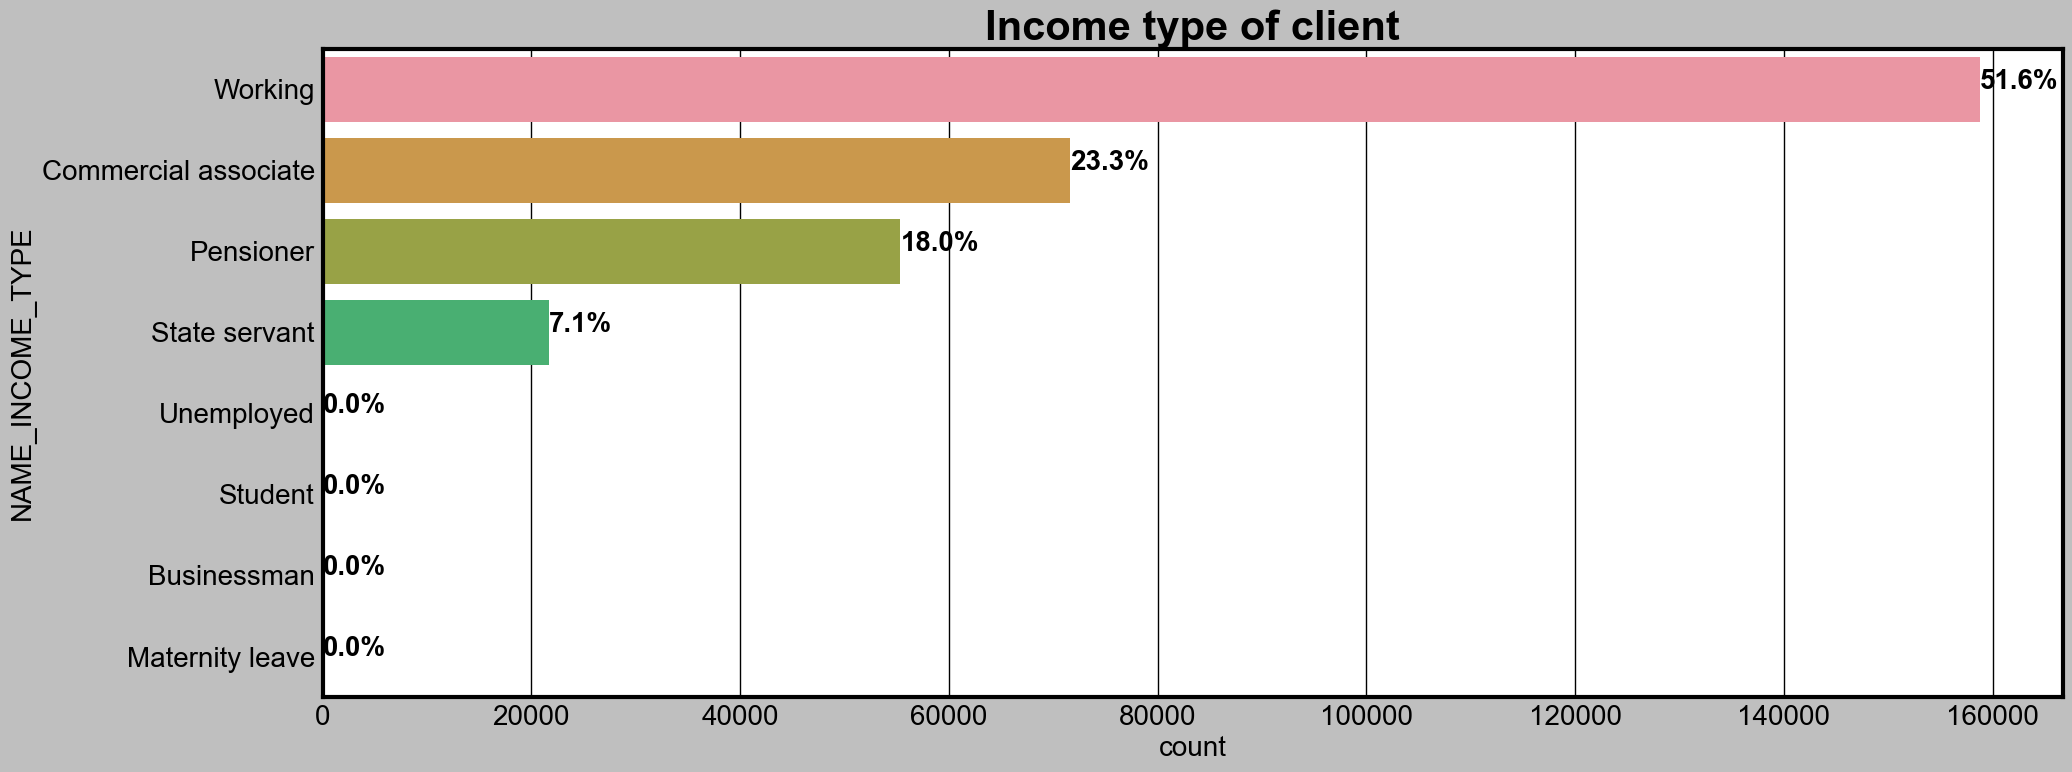

                                   -------------------------------------------------------


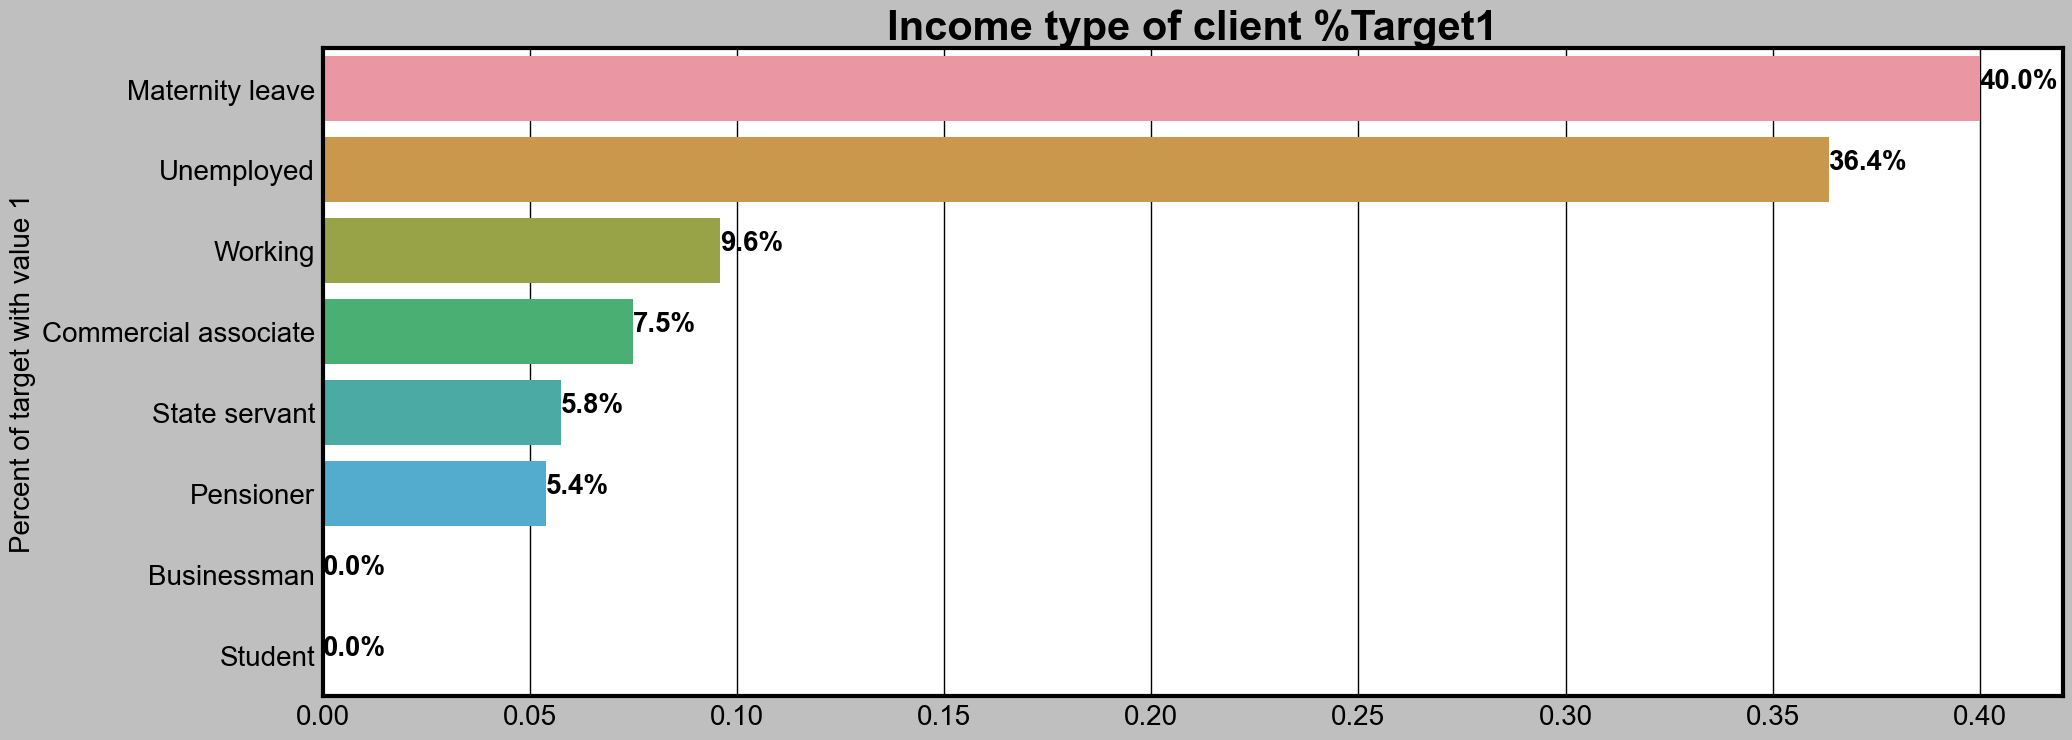

In [106]:
#NAME_INCOME_TYPE
plot_stat(df_train, 'NAME_INCOME_TYPE',"Income type of client")
print("                                   -------------------------------------------------------")
plot_percent_target1(df_train, 'NAME_INCOME_TYPE',"Income type of client %Target1")

La plupart des demandeurs de prêts sont des revenus du travail, suivis par un associé commercial, un retraité et un fonctionnaire.

Les demandeurs avec le type de revenu Congé de maternité ont un ratio de près de 40% de prêts non remboursés, suivis des chômeurs (37%). Les autres types de revenus sont inférieurs à la moyenne de 10% pour ne pas rembourser les prêts.

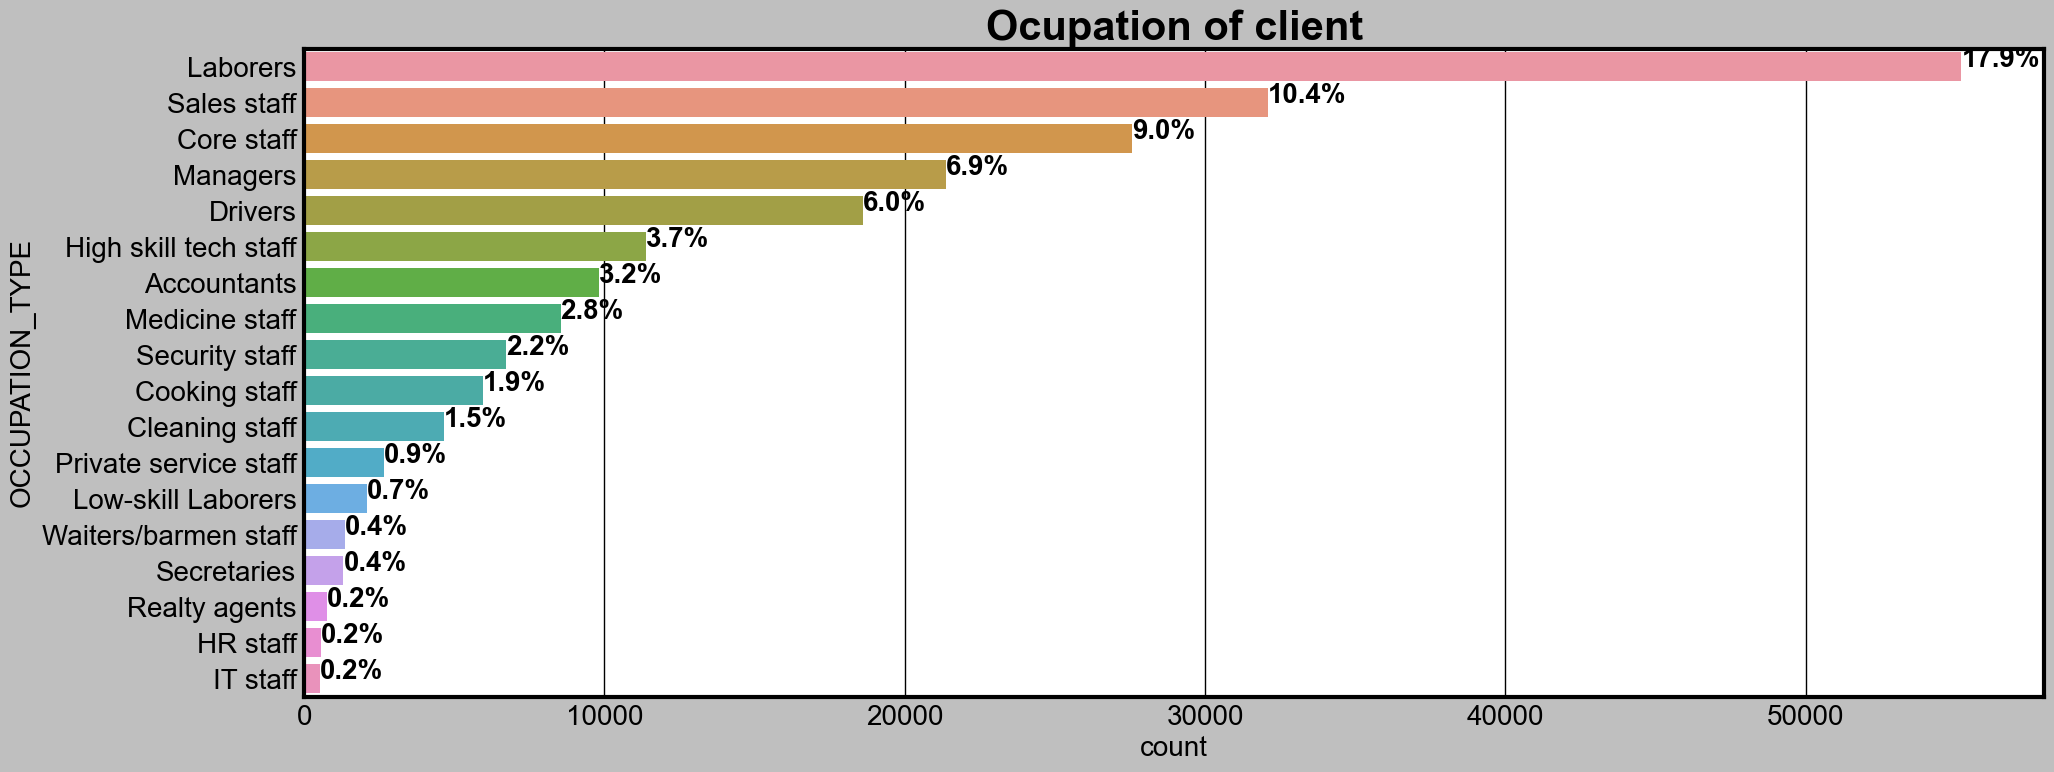

                                   -------------------------------------------------------


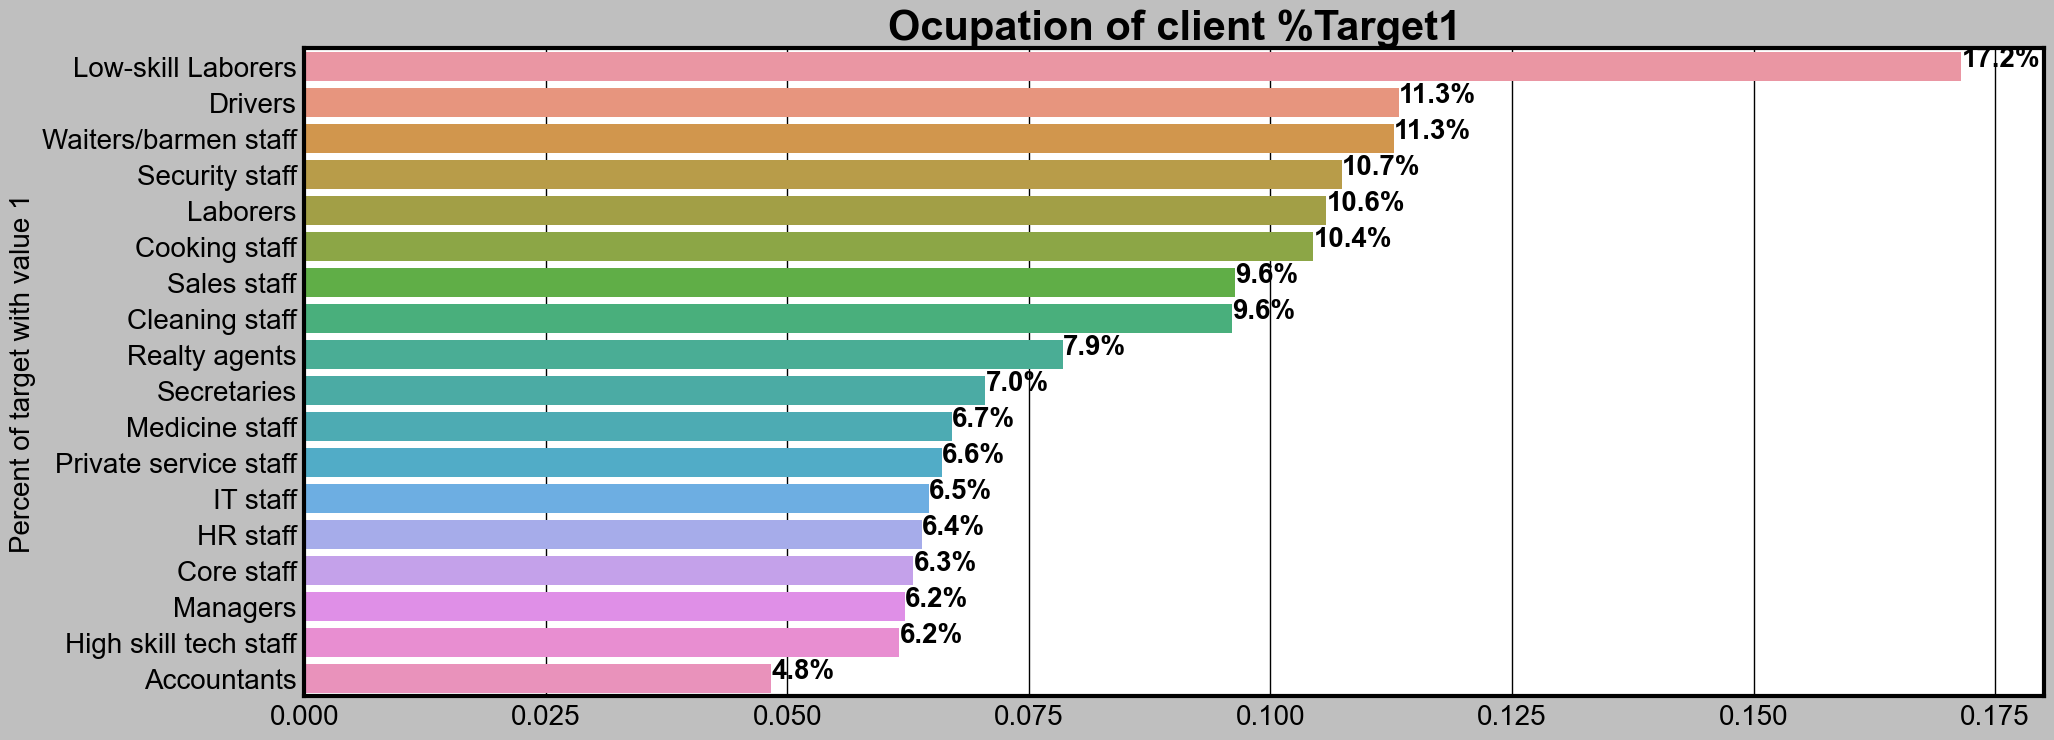

In [107]:
#OCCUPATION_TYPE
plot_stat(df_train, 'OCCUPATION_TYPE',"Ocupation of client")
print("                                   -------------------------------------------------------")
plot_percent_target1(df_train, 'OCCUPATION_TYPE',"Ocupation of client %Target1")

La plupart des prêts sont contractés par des ouvriers, suivis par les vendeurs/commerciaux. Le personnel informatique prend le montant de prêts le plus bas.

La catégorie avec le pourcentage le plus élevé de prêts non remboursés est celle des ouvriers peu qualifiés (plus de 17%), suivis des chauffeurs et des serveurs / barmen, du personnel de sécurité, des ouvriers et du personnel de cuisine.

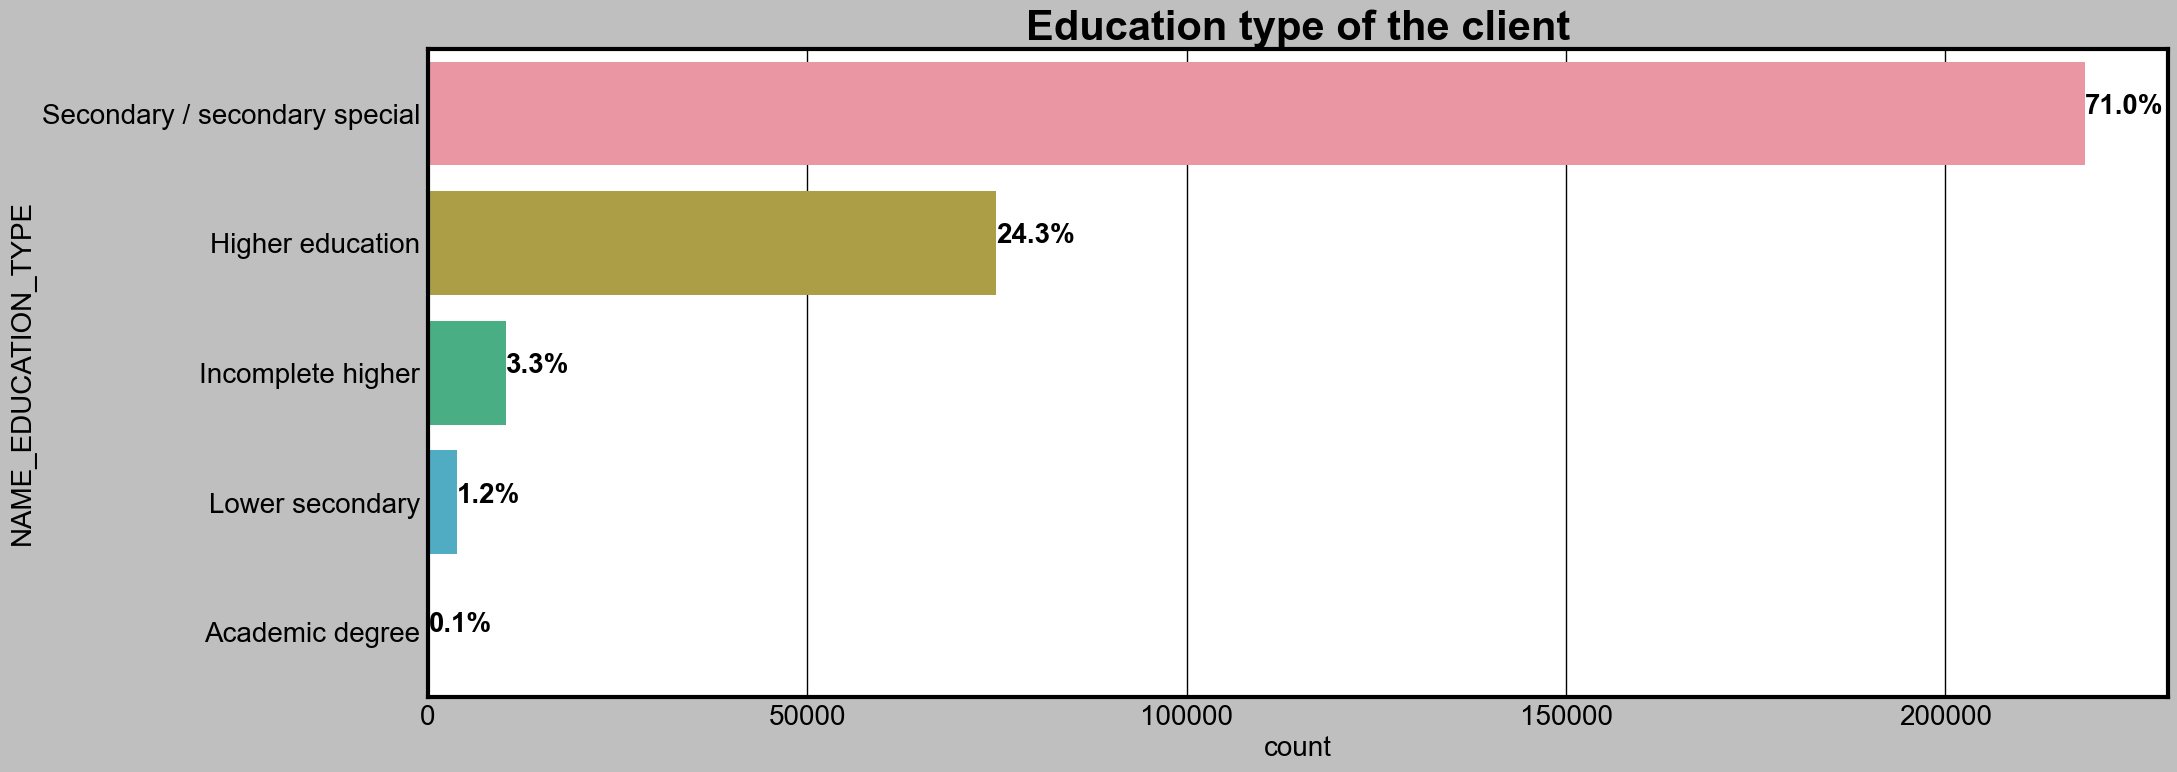

                                   -------------------------------------------------------


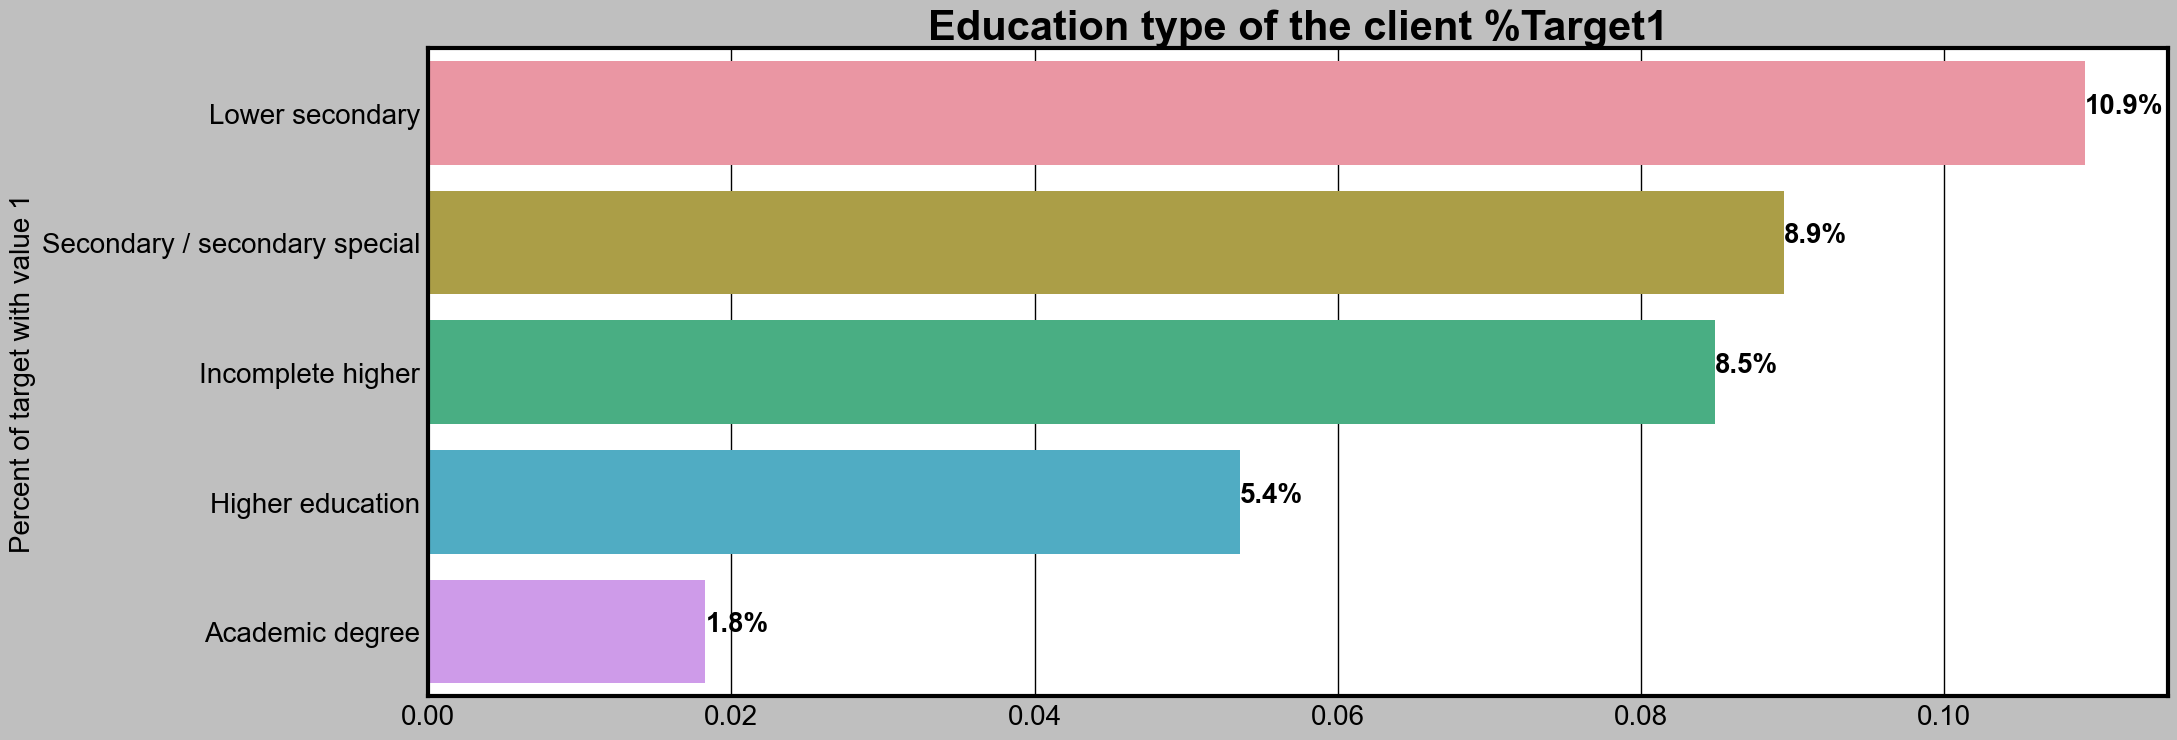

In [108]:
#NAME_EDUCATION_TYPE
plot_stat(df_train, 'NAME_EDUCATION_TYPE',"Education type of the client")
print("                                   -------------------------------------------------------")
plot_percent_target1(df_train, 'NAME_EDUCATION_TYPE',"Education type of the client %Target1")

La majorité des clients ont une éducation dans l'éducation secondaire, suivis des clients avec une éducation supérieure. Un très petit nombre d'emprunteur possède un diplôme universitaire.

La catégorie du premier cycle du secondaire, bien que rare, a le taux le plus élevé de non-remboursement du prêt (11%). Les personnes ayant un diplôme universitaire ont un taux de non-remboursement inférieur à 2%.

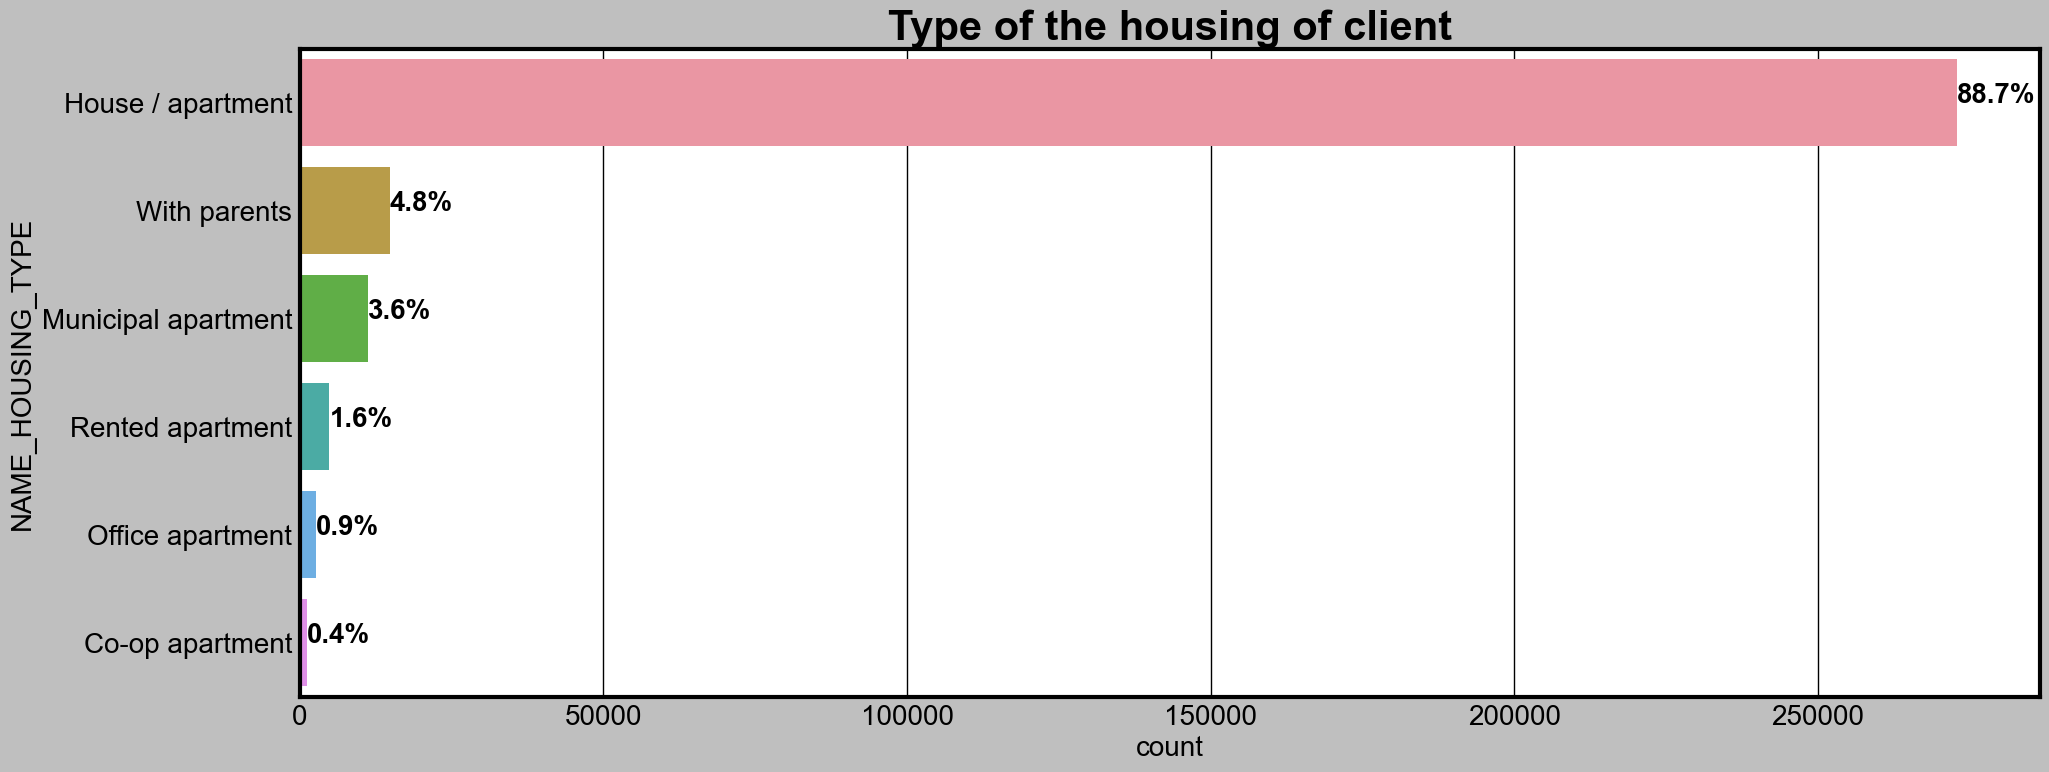

                                   -------------------------------------------------------


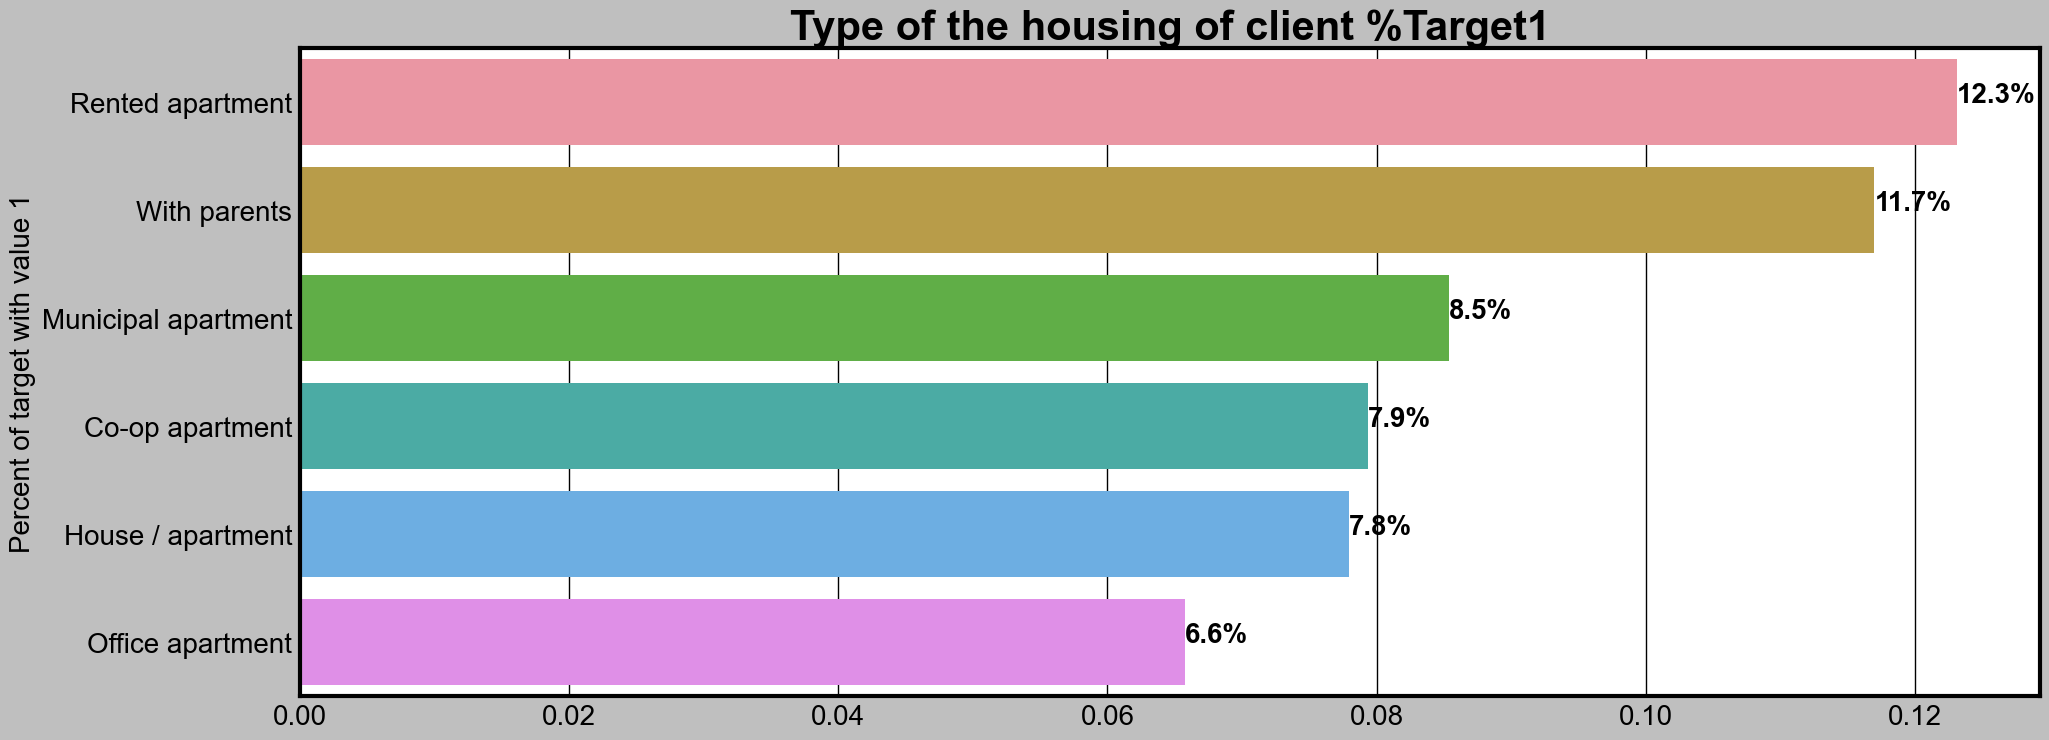

In [109]:
#NAME_HOUSING_TYPE
plot_stat(df_train, 'NAME_HOUSING_TYPE',"Type of the housing of client")
print("                                   -------------------------------------------------------")
plot_percent_target1(df_train, 'NAME_HOUSING_TYPE',"Type of the housing of client %Target1")

Plus de 250 000 demandeurs de crédits vivent en maison ou appartement. Les catégories suivantes, faible pourcentage, représentent une population moins "indépendante" (vivre chez ses parents, etc…).

Dans ces catégories, les loueurs d'appartements (non propriétaires de leur résidence principale), ainsi que ceux qui vivent chez leurs parents, ont un taux de non-remboursement supérieur à 10%.

**Corrélations**

L'analyse peut continuer par une étape de traitement des corrélations entre les caractéristiques et la Target. L'idée est de calculer le coefficient de corrélation de Pearson entre chaque variable et la Target. Cette étape permet d'avoir un aperçu des relations possibles entre les variables.

In [113]:
# Ne sélectionnez que les colonnes numériques
num_df_train = df_train.select_dtypes(include=[np.number])

print('Corrélations les plus positives :\n', num_df_train.corr()['TARGET'].sort_values().tail(15))
print("--------------------------")
print('Corrélations les plus négatives :\n', num_df_train.corr()['TARGET'].sort_values().head(15))


Corrélations les plus positives :
 DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
--------------------------
Corrélations les plus négatives :
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
R

Notons que la corrélation la plus forte est celle de la variable 'DAYS_BIRTH'. Ceci étant, pour faciliter la compréhension est retrouver la logique vue en préambule, les jours exprimés en valeurs négatives peuvent être traités en valeurs absolues. Alors le coef. de Person sera négatif, cela expose le fait qu'un client plus âgé sera moins susceptible de faire défaut au remboursement de son crédit (cela peut sembler logique, en tout cas ce n'est pas absurde).



In [114]:
# Trouver la corrélation entre les jours positifs depuis la naissance et la cible
df_train['DAYS_BIRTH'] = abs(df_train['DAYS_BIRTH'])
df_train['DAYS_BIRTH'].corr(df_train['TARGET'])


-0.07823930830982692

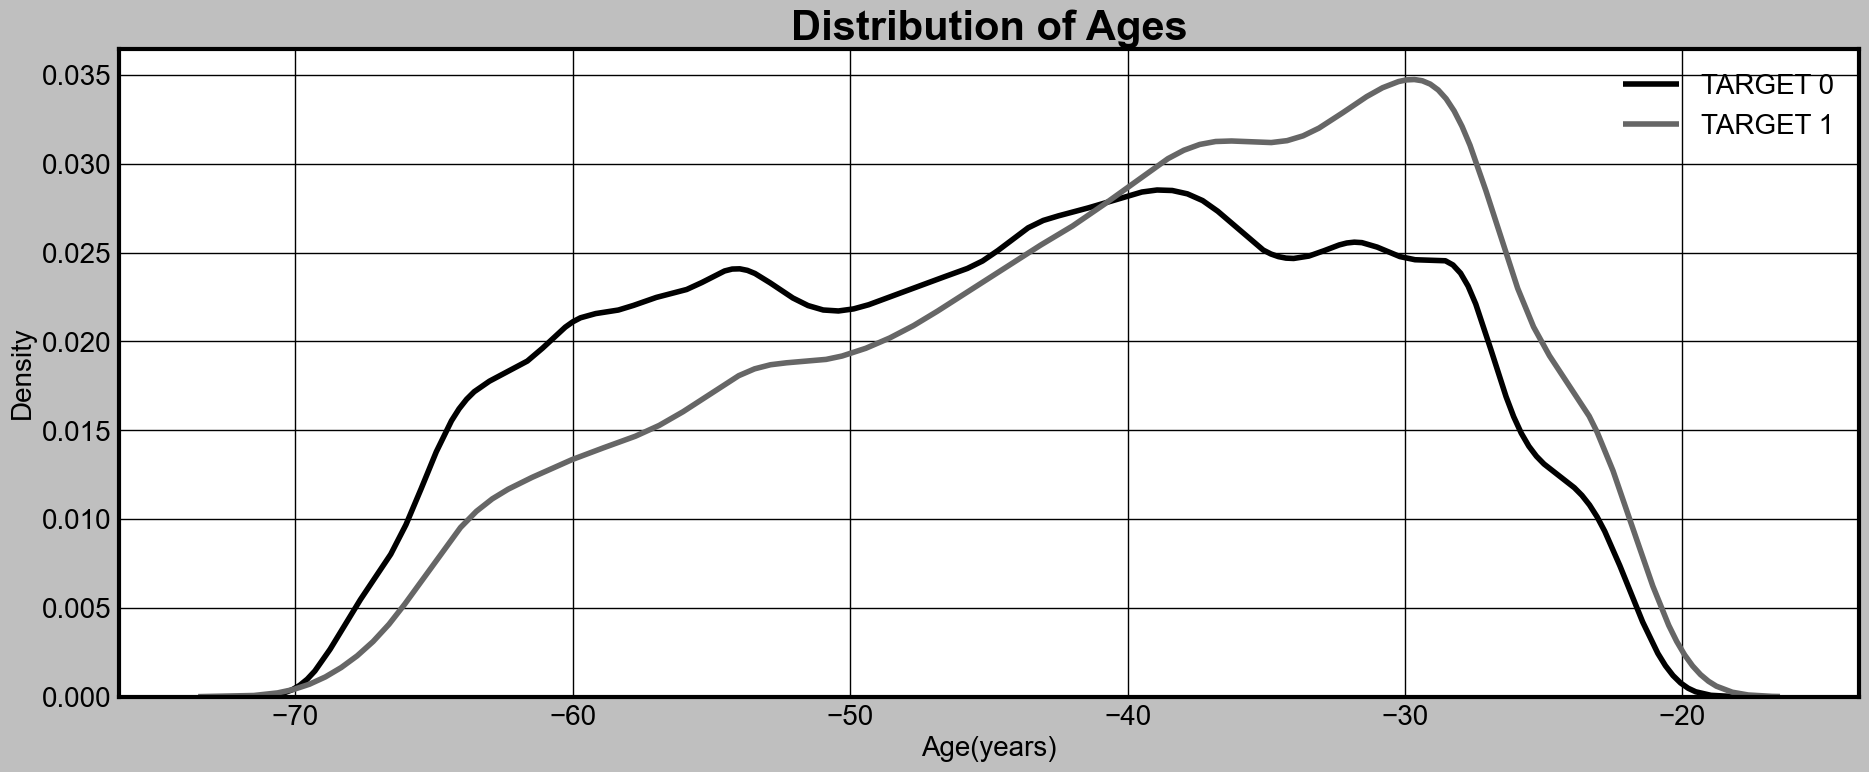

In [115]:
plt.figure(figsize = (20, 8))
sns.kdeplot(df_train[df_train['TARGET'] == 0]['DAYS_BIRTH'] / -365, label = 'TARGET 0')
sns.kdeplot(df_train[df_train['TARGET'] == 1]['DAYS_BIRTH'] / -365, label = 'TARGET 1')

plt.legend(), plt.xlabel('Age(years)'), plt.ylabel('Density'), plt.title('Distribution of Ages')
show()

**Sources extérieures, les plus fortes corrélations linéaires**

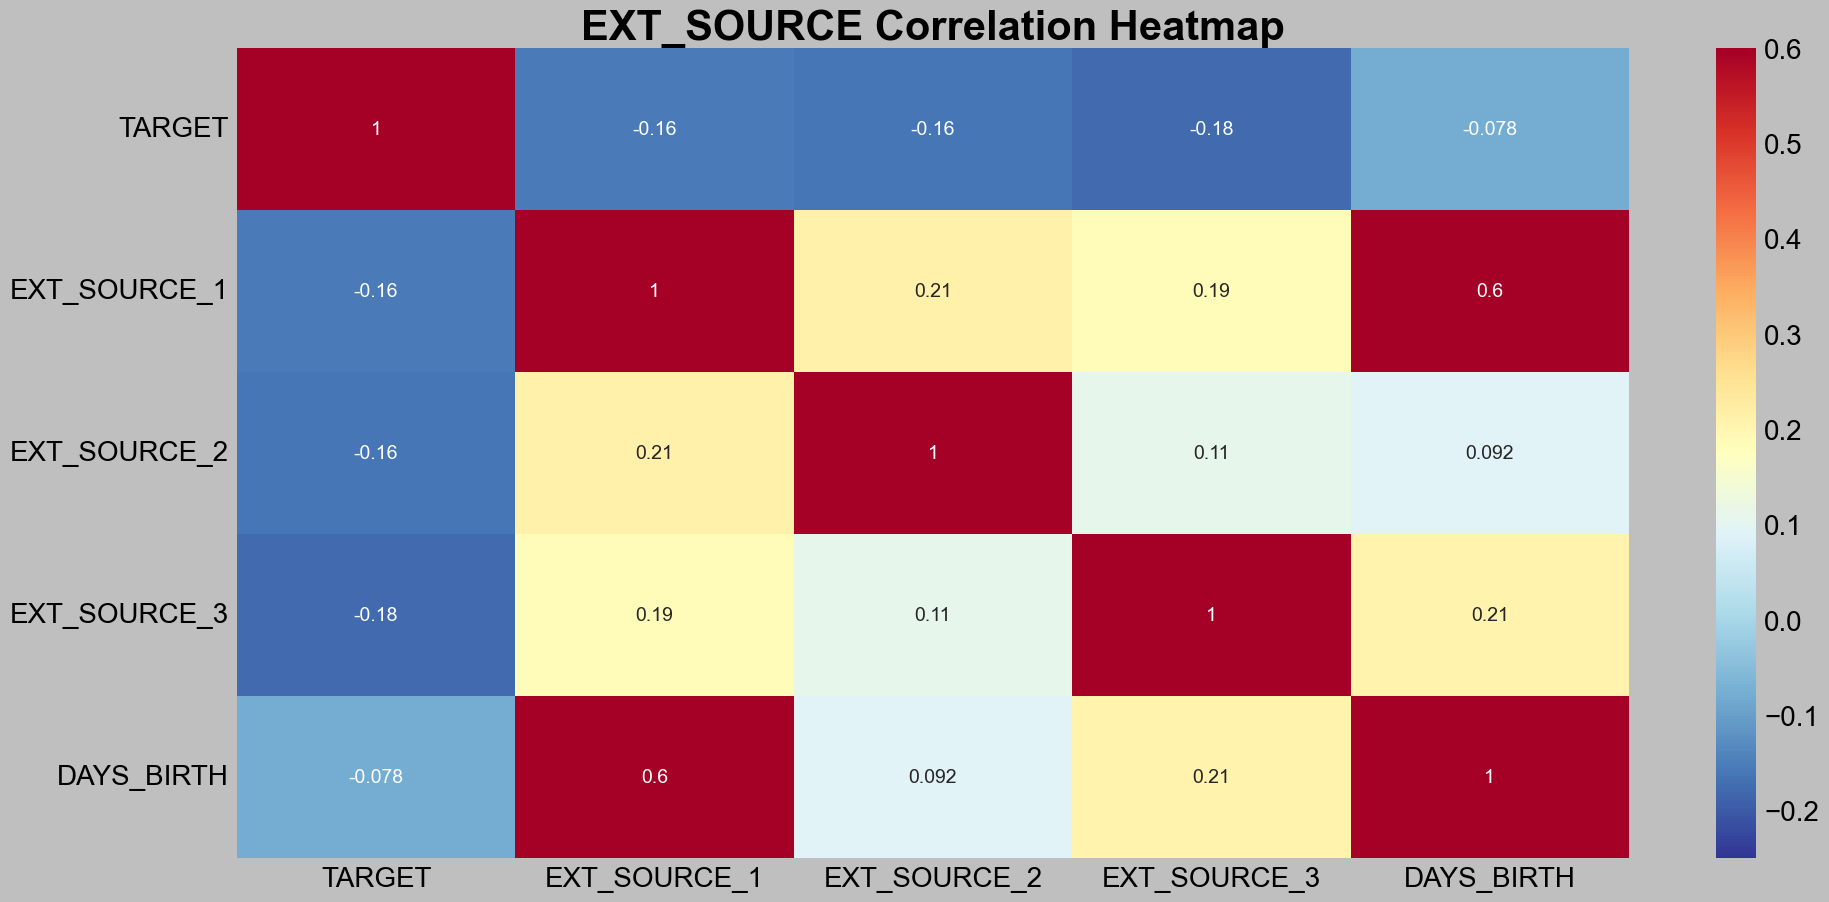

In [116]:
#Heatmap of correlations
plt.figure(figsize = (20,10))
sns.heatmap(df_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']].corr(),
            cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6,
           )
plt.title('EXT_SOURCE Correlation Heatmap')
show()


Ces sources extérieures sont corrélées négativement avec la Target (très faibles coefficients). Malgré tout, on peut penser que si la valeur augmente, le client est plus susceptible de pouvoir rembourser le crédit. Notons que 'DAYS_BIRTH' est corrélée avec 'EXT_SOURCE_1', peut-être l'un des facteurs de ce score est l'âge du client.

In [121]:
# Tracer la distribution d'une caractéristique
def plot_distribution(caracteristique, titre):
    plt.figure(figsize=(20,6))

    t0 = df_train.loc[df_train['TARGET'] == 0]
    t1 = df_train.loc[df_train['TARGET'] == 1]

    sns.kdeplot(t0[caracteristique].dropna(), color='blue', label="TARGET = 0")
    sns.kdeplot(t1[caracteristique].dropna(), color='red', label="TARGET = 1")
    plt.title(titre)
    plt.ylabel('')
    plt.legend()
    plt.show()


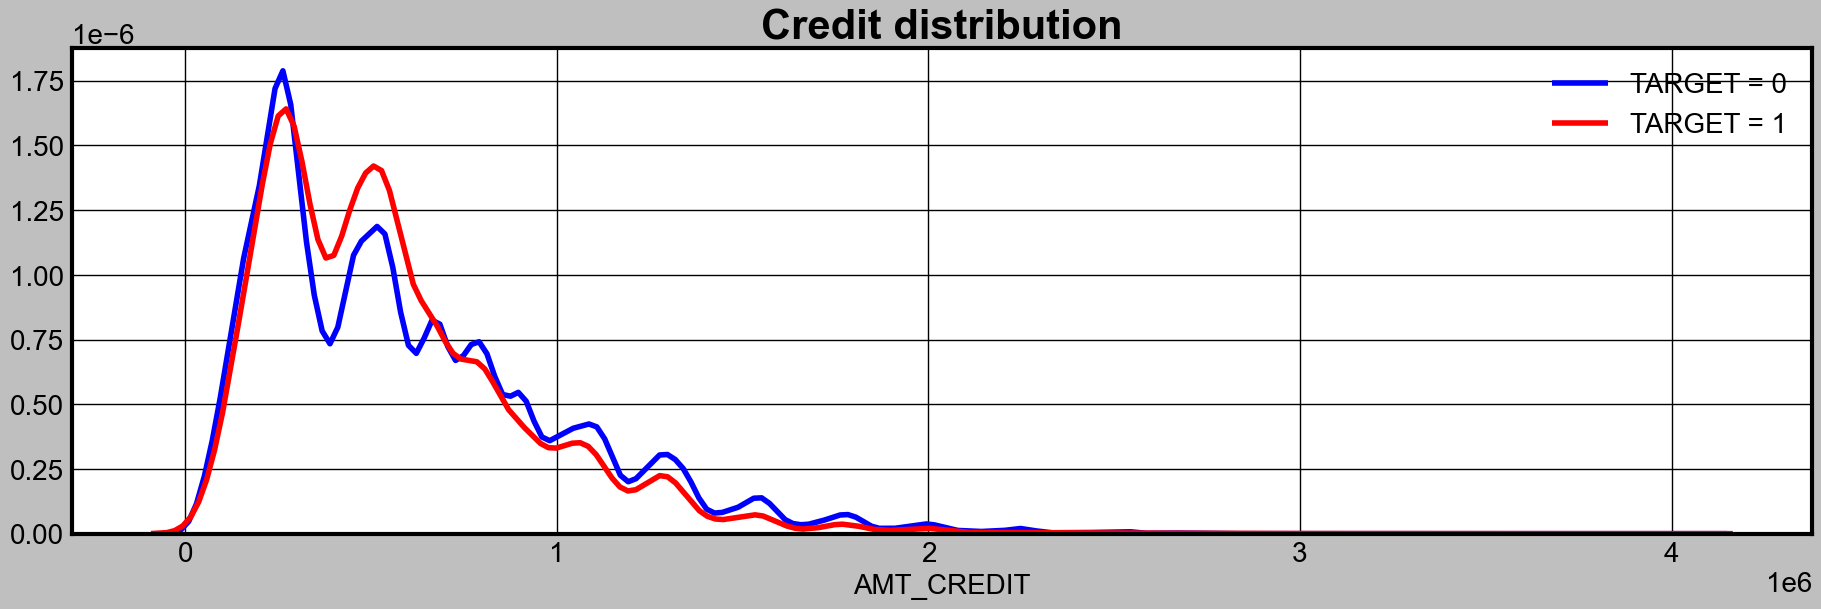

                                   -------------------------------------------------------


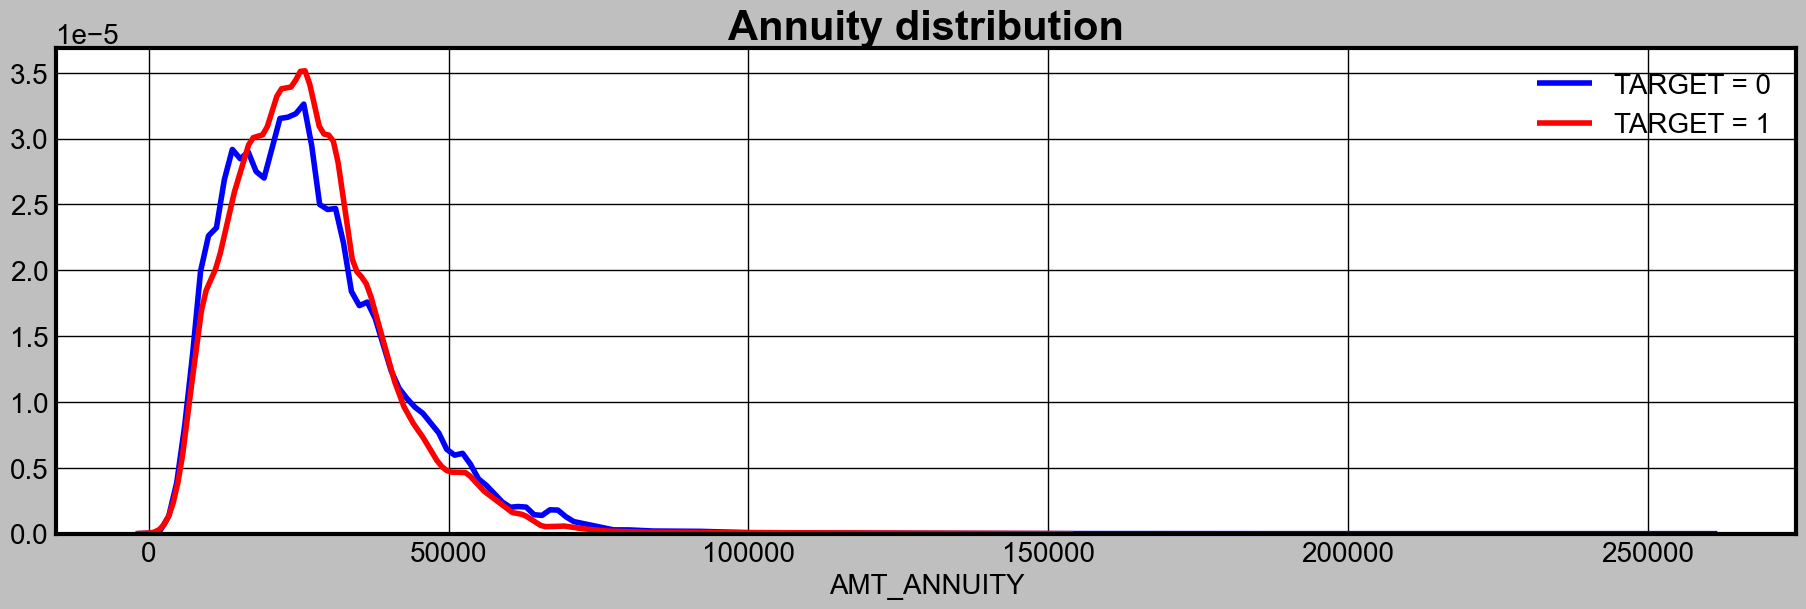

                                   -------------------------------------------------------


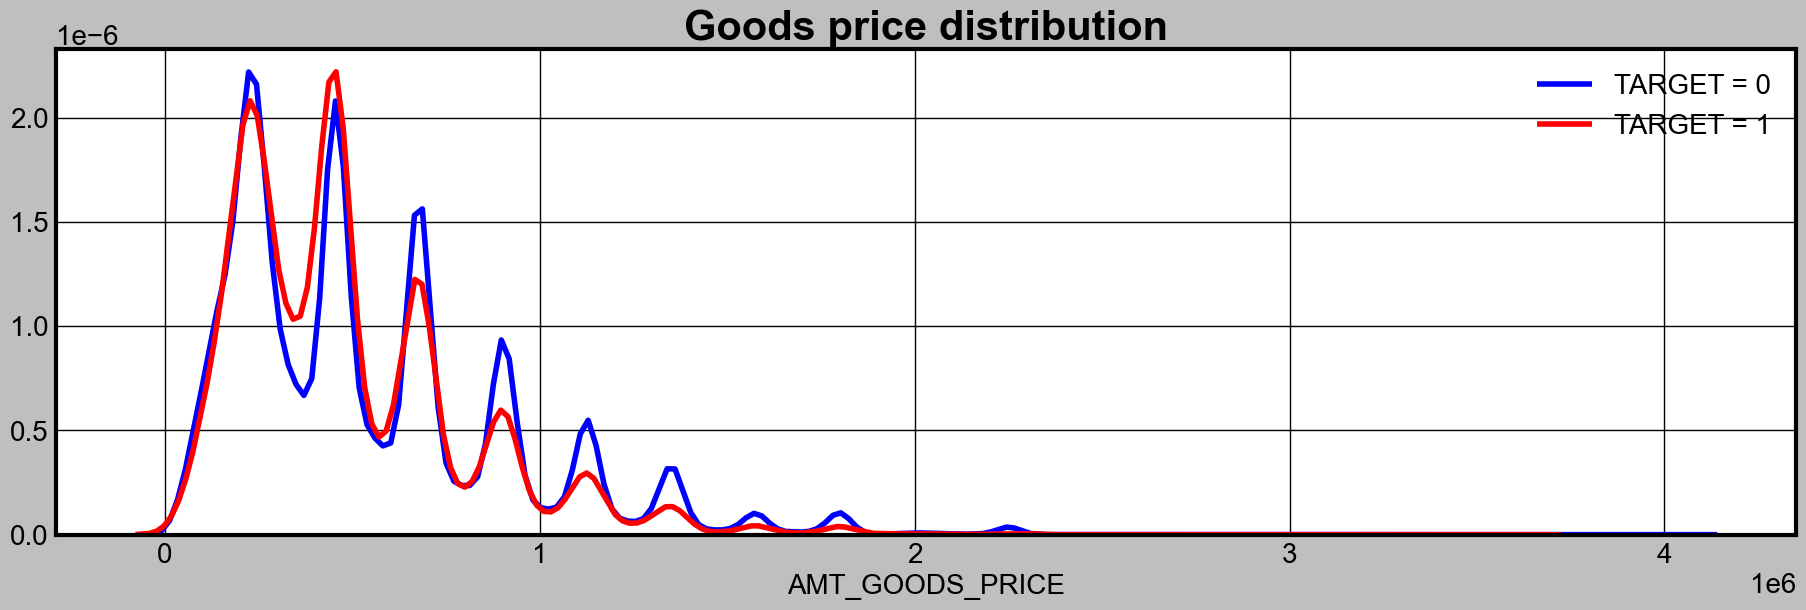

                                   -------------------------------------------------------


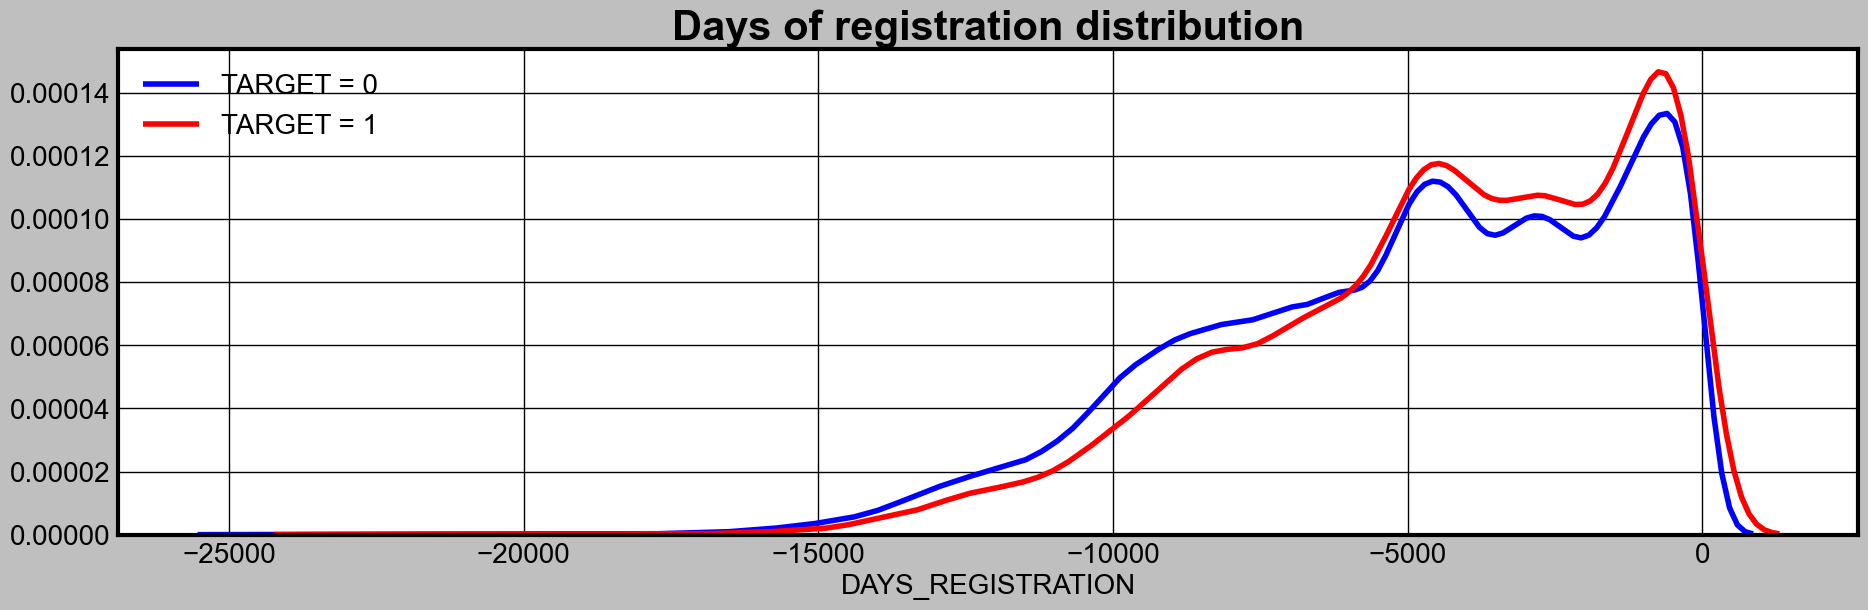

                                   -------------------------------------------------------


In [122]:
plot_distribution('AMT_CREDIT', "Credit distribution")
print("                                   -------------------------------------------------------")
plot_distribution('AMT_ANNUITY', "Annuity distribution")
print("                                   -------------------------------------------------------")
plot_distribution('AMT_GOODS_PRICE', "Goods price distribution")
print("                                   -------------------------------------------------------")
plot_distribution('DAYS_REGISTRATION', "Days of registration distribution")
print("                                   -------------------------------------------------------")

##### bureau

**EDA bureau**

In [124]:
df_bureau = pd.read_csv('.//data//bureau.csv').sort_values(['SK_ID_CURR', 'SK_ID_BUREAU'])
df_bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT   
248484      100001       5896630        Closed      currency 1         -857  \
248485      100001       5896631        Closed      currency 1         -909   
248486      100001       5896632        Closed      currency 1         -879   
248487      100001       5896633        Closed      currency 1        -1572   
248488      100001       5896634        Active      currency 1         -559   

        CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT   
248484                   0               -492.0             -553.0  \
248485                   0               -179.0             -877.0   
248486                   0               -514.0             -544.0   
248487                   0              -1329.0            -1328.0   
248488                   0                902.0                NaN   

        AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM   
248484                     NaN                   0        112500.0  \
248485                     NaN                   0        279720.0   
248486                     NaN                   0         91620.0   
248487                     NaN                   0         85500.0   
248488                     NaN                   0        337680.0   

        AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE   
248484                  0.0                   0.0                     0.0  \
248485                  0.0                   0.0                     0.0   
248486                  0.0                   0.0                     0.0   
248487                  0.0                   0.0                     0.0   
248488             113166.0                   0.0                     0.0   

            CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
248484  Consumer credit                -155          0.0  
248485  Consumer credit                -155          0.0  
248486  Consumer credit                -155          0.0  
248487  Consumer credit                -155          0.0  
248488  Consumer credit                  -6       4630.5

In [125]:
col_bureau = df_bureau.columns


une brève explication de chaque colonne:

1. **SK_ID_CURR**: ID du client dans l'ensemble de données d'application.
2. **SK_ID_BUREAU**: ID du client dans le Bureau de crédit. C'est un identifiant unique pour l'entrée actuelle dans le rapport de crédit.
3. **CREDIT_ACTIVE**: Statut du prêt ou de la carte de crédit - par exemple, actif, fermé, etc.
4. **CREDIT_CURRENCY**: Devise dans laquelle le prêt ou la carte de crédit est libellé.
5. **DAYS_CREDIT**: Combien de jours avant la demande actuelle le client a demandé un crédit au Bureau de crédit.
6. **CREDIT_DAY_OVERDUE**: Combien de jours le client est en retard sur son prêt ou sa carte de crédit précédent.
7. **DAYS_CREDIT_ENDDATE**: Combien de jours avant que le crédit bureau précédent ne se termine.
8. **DAYS_ENDDATE_FACT**: Combien de jours avant la fin réelle du crédit bureau précédent.
9. **AMT_CREDIT_MAX_OVERDUE**: Le montant maximal dû sur le prêt ou la carte de crédit précédent.
10. **CNT_CREDIT_PROLONG**: Combien de fois le client a prolongé son crédit bureau précédent.
11. **AMT_CREDIT_SUM**: Somme totale pour le crédit bureau précédent.
12. **AMT_CREDIT_SUM_DEBT**: Somme totale restant due sur le crédit bureau précédent.
13. **AMT_CREDIT_SUM_LIMIT**: Limite sur la carte de crédit pour le crédit bureau précédent.
14. **AMT_CREDIT_SUM_OVERDUE**: Montant total dû en retard pour le crédit bureau précédent.
15. **CREDIT_TYPE**: Type de crédit bureau précédent (par exemple, prêt à la consommation, prêt immobilier, etc.).
16. **DAYS_CREDIT_UPDATE**: Combien de jours avant la demande actuelle le rapport de crédit précédent a été mis à jour.
17. **AMT_ANNUITY**: Montant de l'annuité pour le crédit bureau précédent.

Ces colonnes fournissent des informations détaillées sur l'historique de crédit d'un client provenant d'une agence externe de rapport de crédit, qui sont essentielles pour évaluer la solvabilité d'un client et son risque de défaut.

Ce fichier contient tous les crédits antérieurs des clients fournis par d'autres institutions financières qui ont été déclarés au Bureau de crédit (pour les clients qui ont un prêt dans l'échantillon). Pour chaque prêt de l'échantillon, il y a autant de lignes que de nombre de crédits que le client avait au bureau de crédit avant la date de la demande. SK_ID_CURR est la clé reliant les données application_train | test aux données du bureau.

Il est nécessaire de fusionner "application_train" avec "bureau" pour pour pouvoir extraire la part de TARGET == 1.

In [128]:
application_bureau_train = df_train.merge(df_bureau, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')


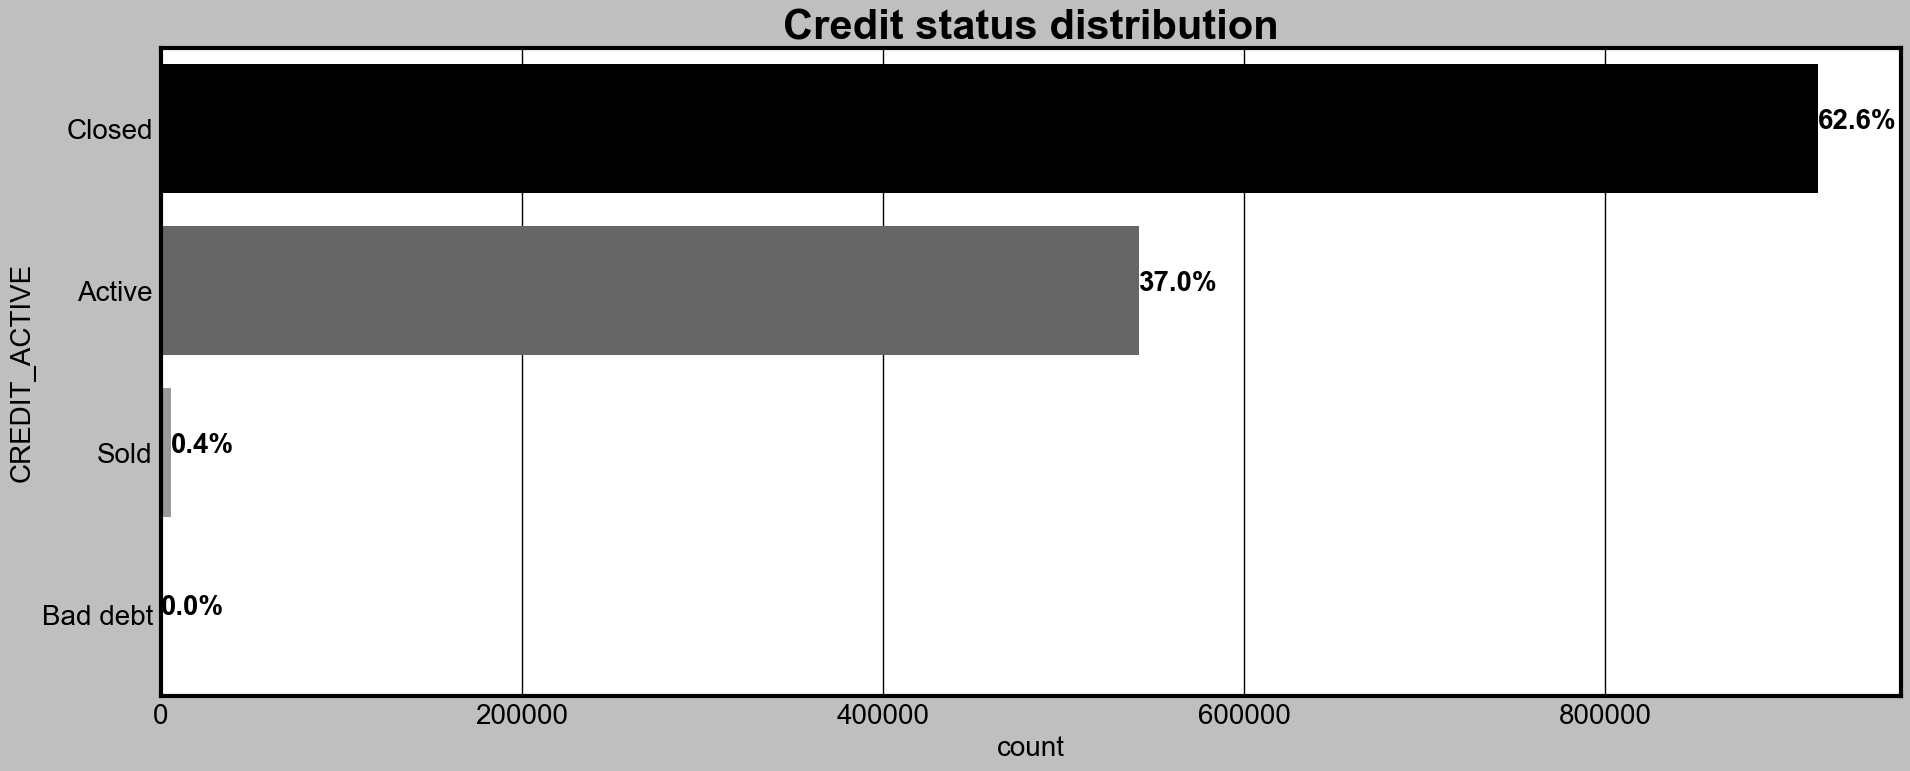

                                   -------------------------------------------------------


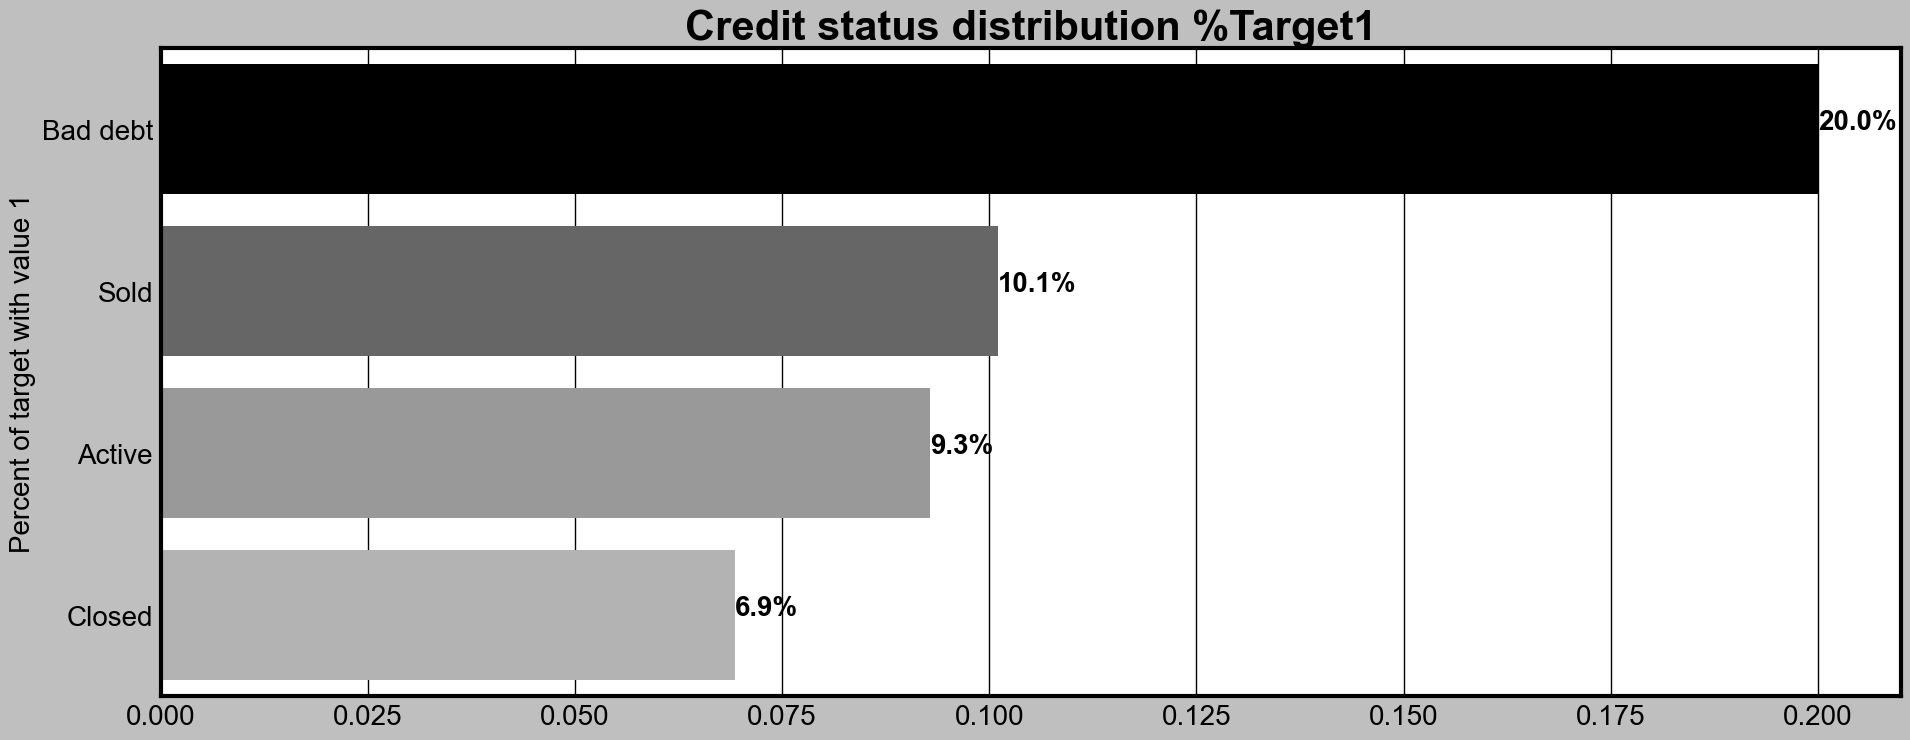

In [129]:

#CREDIT_ACTIVE
plot_stat(application_bureau_train, 'CREDIT_ACTIVE',"Credit status distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_bureau_train, 'CREDIT_ACTIVE',"Credit status distribution %Target1")

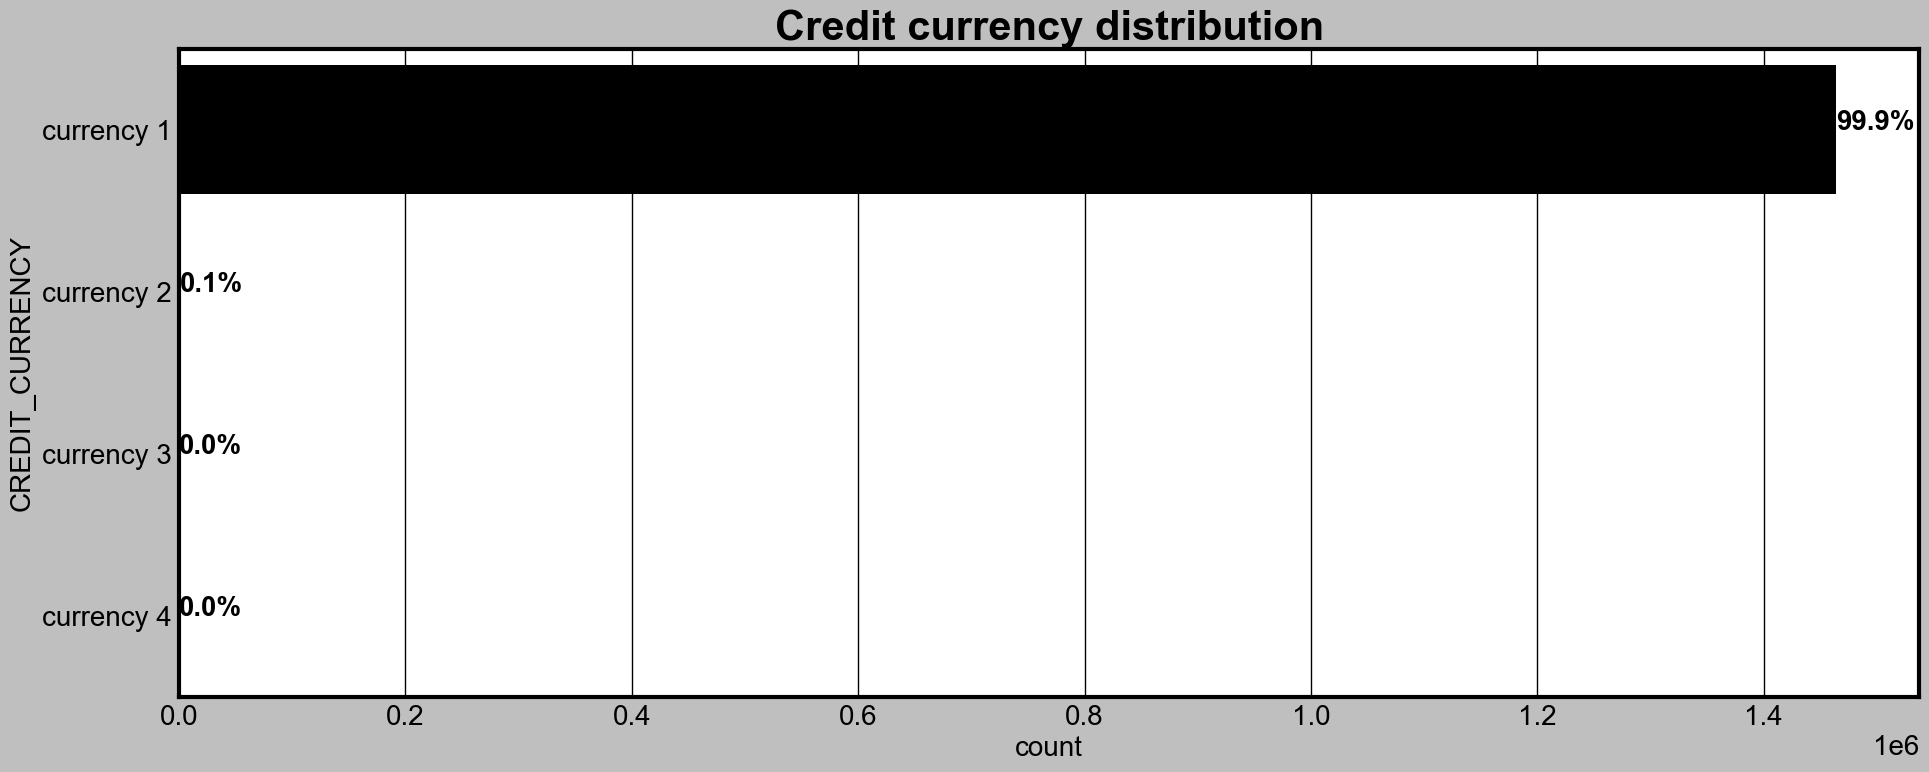

                                   -------------------------------------------------------


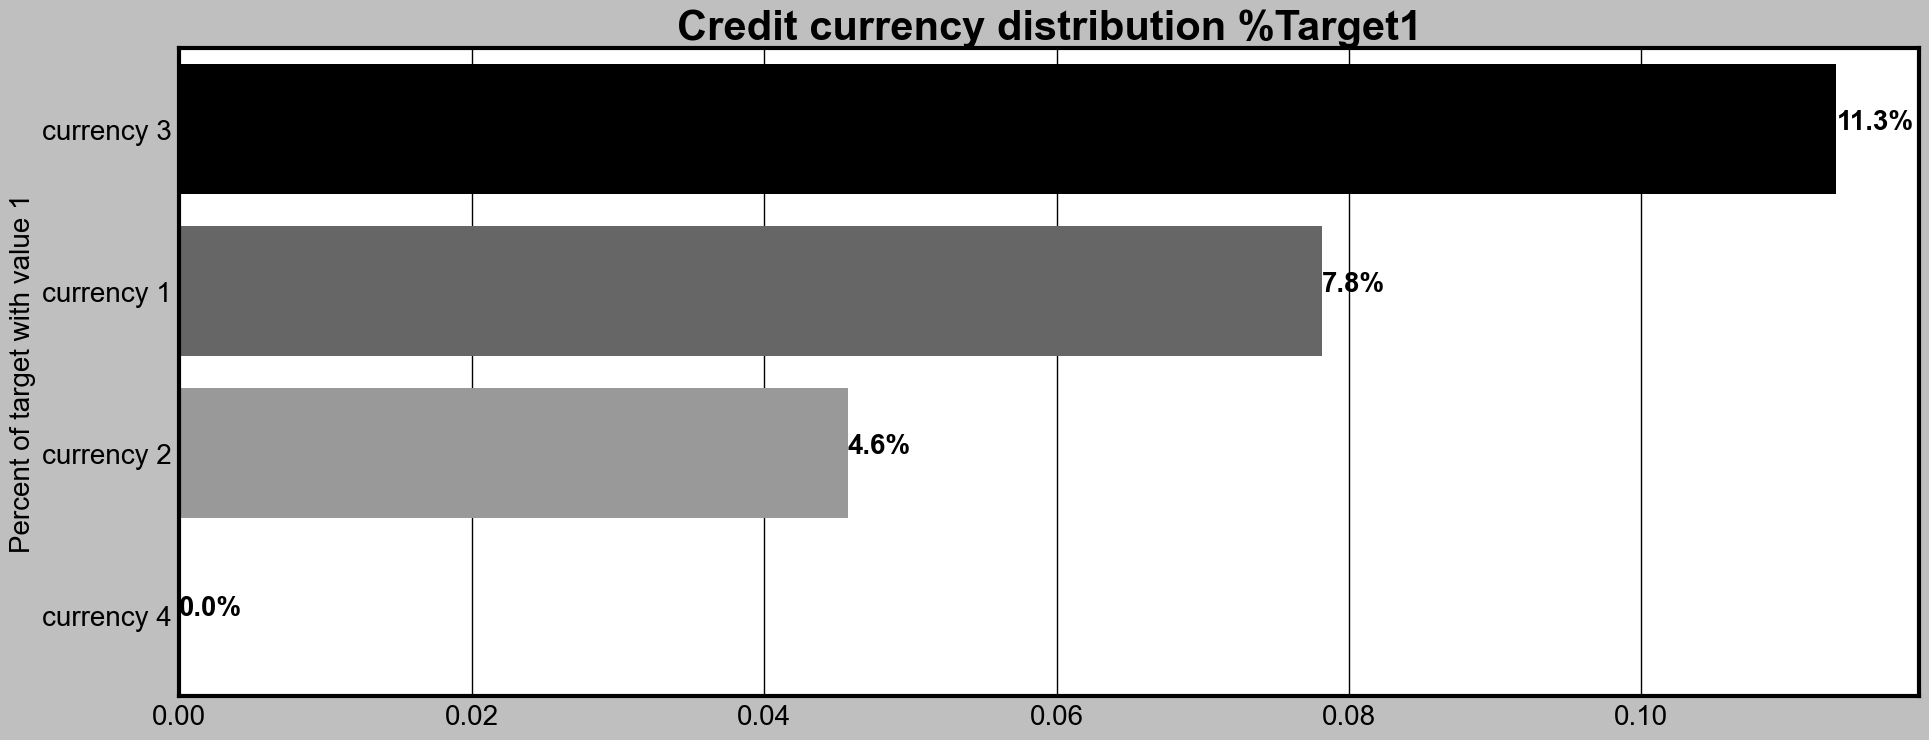

In [130]:
#CREDIT_CURRENCY
plot_stat(application_bureau_train, 'CREDIT_CURRENCY',"Credit currency distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_bureau_train, 'CREDIT_CURRENCY',"Credit currency distribution %Target1")

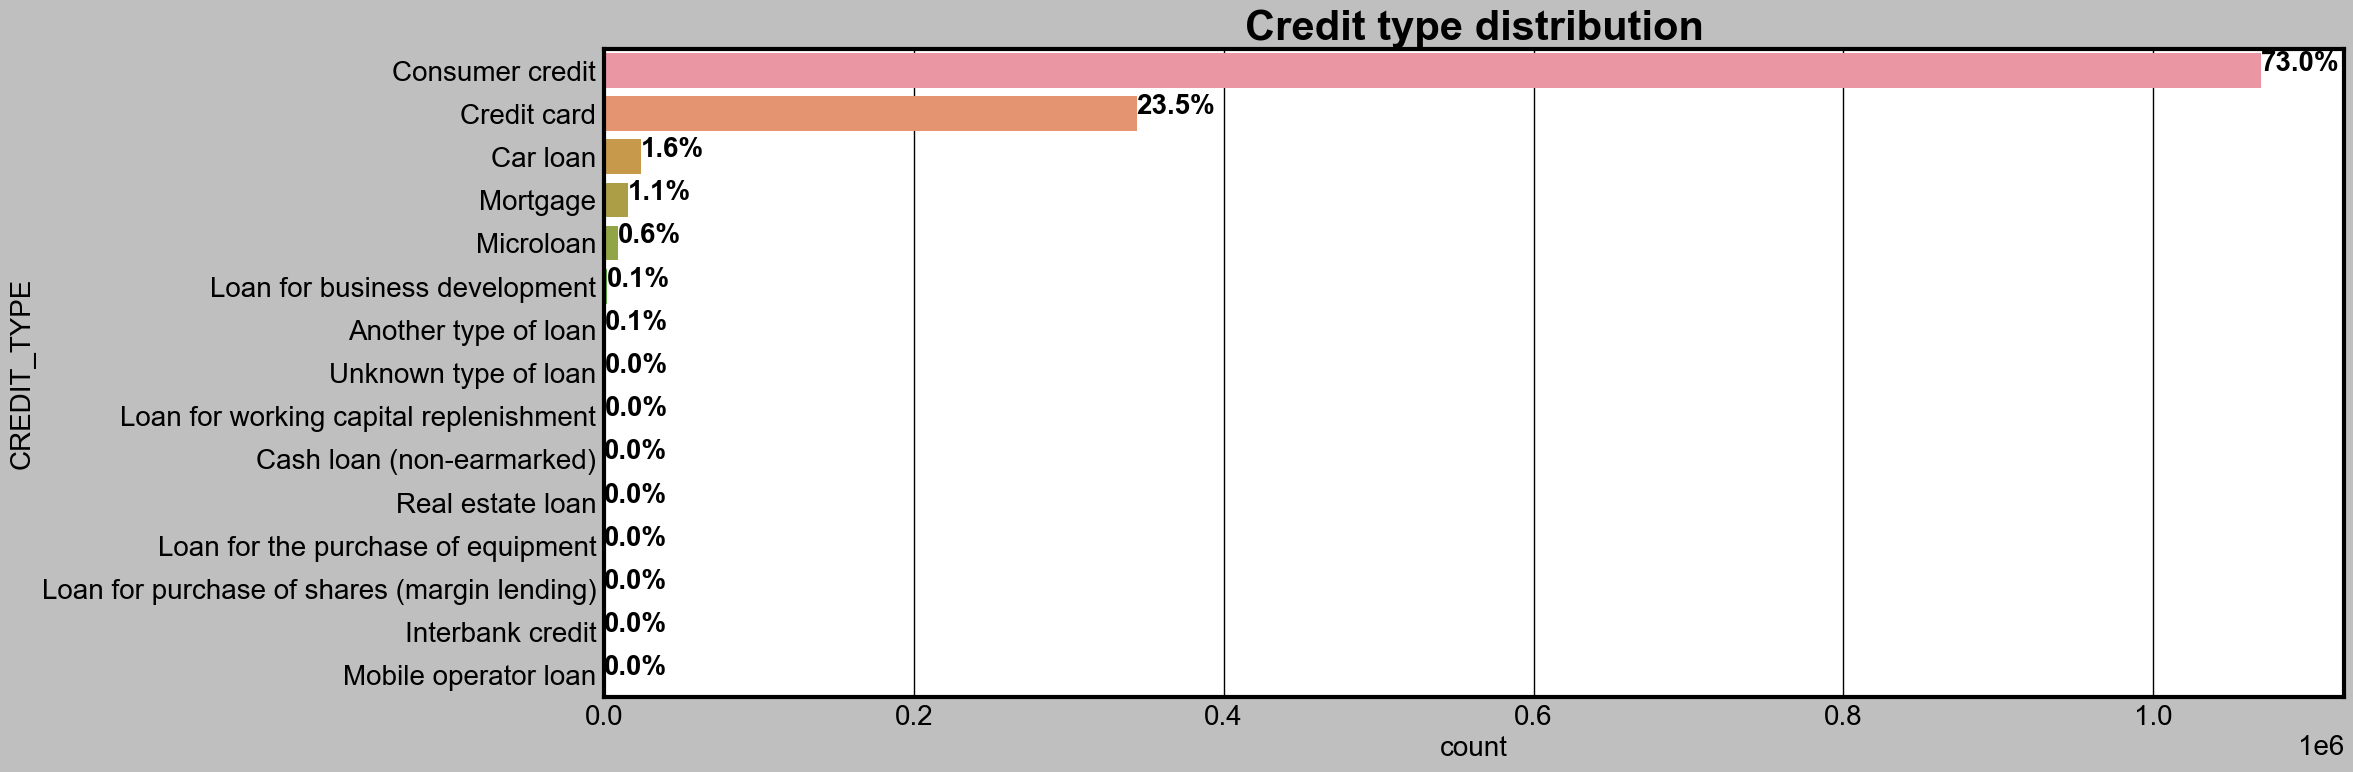

                                   -------------------------------------------------------


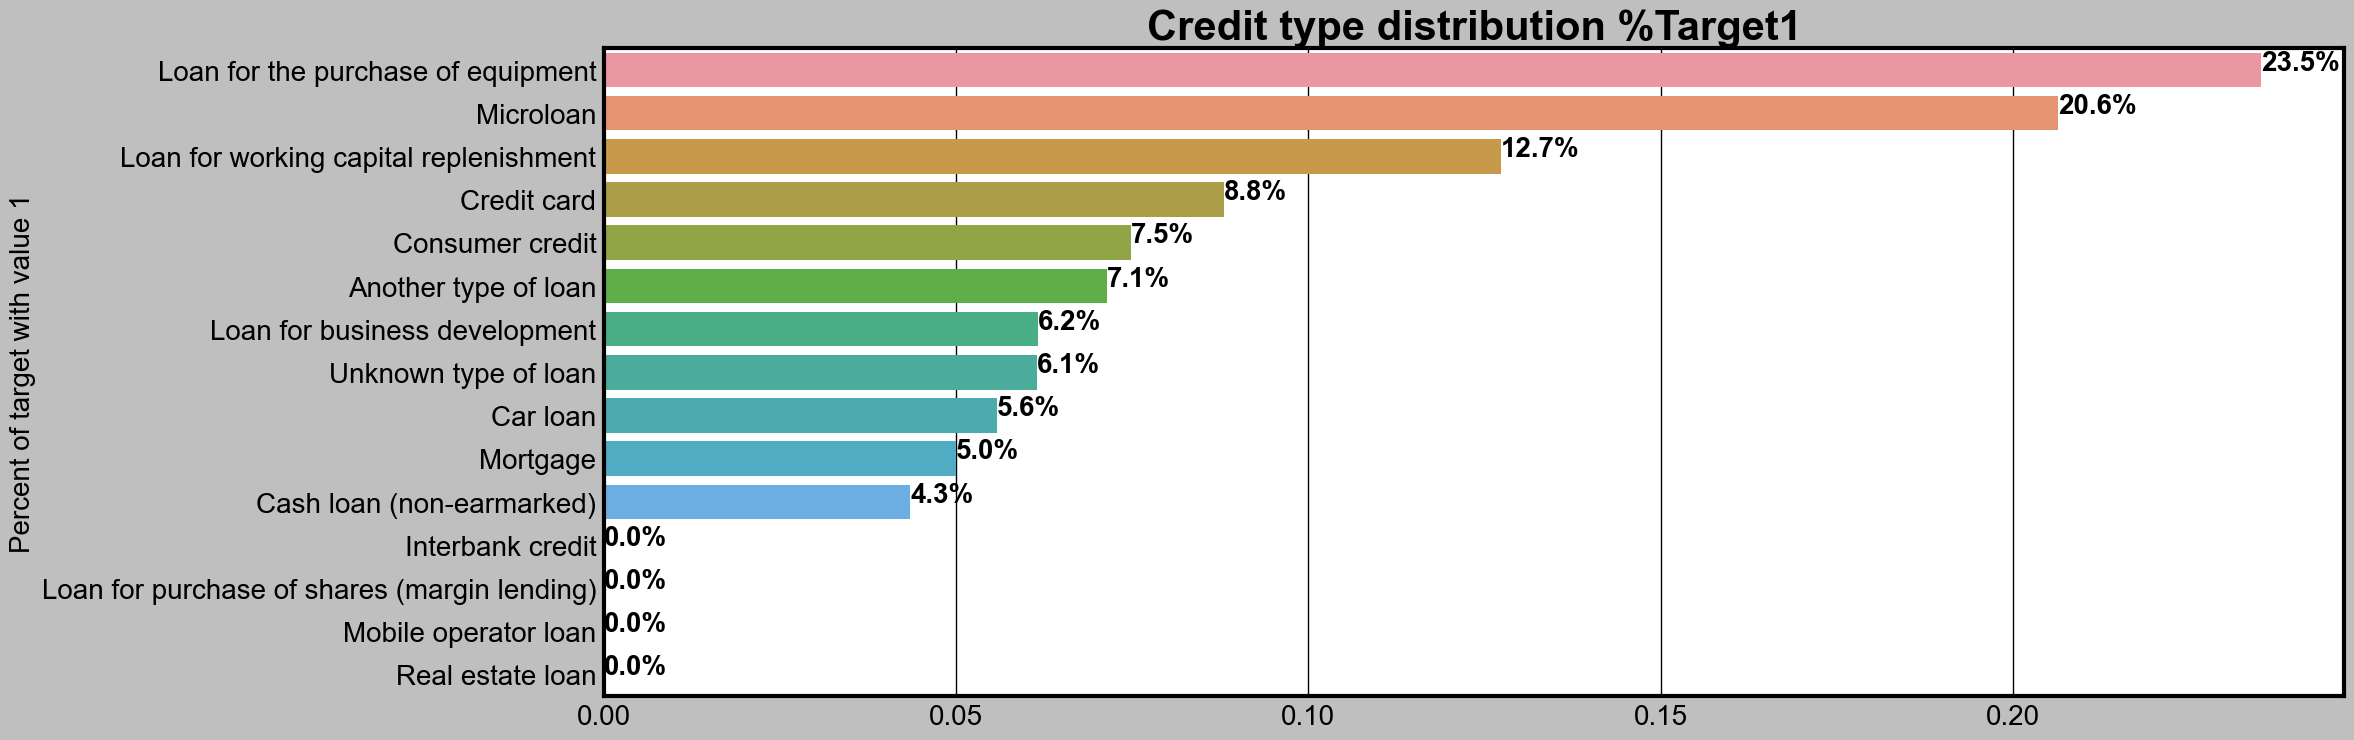

In [131]:
#CREDIT_TYPE
plot_stat(application_bureau_train, 'CREDIT_TYPE',"Credit type distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_bureau_train, 'CREDIT_TYPE',"Credit type distribution %Target1")

##### previous_application

In [132]:
df_previous_application = pd.read_csv('.//data//previous_application.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV'])
df_previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY   
201668      1369693      100001     Consumer loans     3951.000  \
892077      1038818      100002     Consumer loans     9251.775   
575941      1810518      100003         Cash loans    98356.995   
1223745     2396755      100003     Consumer loans     6737.310   
1021650     2636178      100003     Consumer loans    64567.665   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE   
201668           24835.5     23787.0            2520.0          24835.5  \
892077          179055.0    179055.0               0.0         179055.0   
575941          900000.0   1035882.0               NaN         900000.0   
1223745          68809.5     68053.5            6885.0          68809.5   
1021650         337500.0    348637.5               0.0         337500.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START   
201668                      FRIDAY                       13  \
892077                    SATURDAY                        9   
575941                      FRIDAY                       12   
1223745                   SATURDAY                       15   
1021650                     SUNDAY                       17   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY   
201668                            Y                       1  \
892077                            Y                       1   
575941                            Y                       1   
1223745                           Y                       1   
1021650                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED   
201668            0.104326                    NaN                       NaN  \
892077            0.000000                    NaN                       NaN   
575941                 NaN                    NaN                       NaN   
1223745           0.100061                    NaN                       NaN   
1021650           0.000000                    NaN                       NaN   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION   
201668                     XAP             Approved          -1740  \
892077                     XAP             Approved           -606   
575941                     XNA             Approved           -746   
1223745                    XAP             Approved          -2341   
1021650                    XAP             Approved           -828   

             NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE   
201668   Cash through the bank                XAP          Family  \
892077                     XNA                XAP             NaN   
575941                     XNA                XAP   Unaccompanied   
1223745  Cash through the bank                XAP          Family   
1021650  Cash through the bank                XAP          Family   

        NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO   
201668         Refreshed                Mobile            POS  \
892077               New              Vehicles            POS   
575941          Repeater                   XNA           Cash   
1223745        Refreshed  Consumer Electronics            POS   
1021650        Refreshed             Furniture            POS   

        NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA   
201668                XNA             Country-wide                23  \
892077                XNA                    Stone               500   
575941             x-sell  Credit and cash offices                -1   
1223745               XNA             Country-wide               200   
1021650               XNA                    Stone              1400   

         NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP   
201668           Connectivity          8.0             high  \
892077        Auto technology         24.0       low_normal   
575941                    XNA         12.0       low_normal   
1223745  C

Une explication pour chaque colonne :

1. **SK_ID_PREV**: ID unique de la précédente demande de crédit du client chez Home Credit.
2. **SK_ID_CURR**: ID unique du client dans la base de données actuelle de Home Credit.
3. **NAME_CONTRACT_TYPE**: Type de contrat de crédit (par exemple, prêt à la consommation, prêt renouvelable).
4. **AMT_ANNUITY**: Montant de l'annuité de la demande précédente.
5. **AMT_APPLICATION**: Montant demandé initialement par le client.
6. **AMT_CREDIT**: Montant final du crédit accordé.
7. **AMT_DOWN_PAYMENT**: Acompte pour la précédente demande.
8. **AMT_GOODS_PRICE**: Prix des biens pour lesquels le prêt est accordé.
9. **WEEKDAY_APPR_PROCESS_START**: Jour de la semaine où la demande précédente a été initiée.
10. **HOUR_APPR_PROCESS_START**: Heure de la journée où la demande précédente a été initiée.
11. **FLAG_LAST_APPL_PER_CONTRACT**: Indique s'il s'agit de la dernière demande par contrat.
12. **NFLAG_LAST_APPL_IN_DAY**: Indique s'il s'agit de la dernière demande du jour.
13. **RATE_DOWN_PAYMENT**: Taux de l'acompte pour la demande précédente.
14. **RATE_INTEREST_PRIMARY**: Taux d'intérêt initial.
15. **RATE_INTEREST_PRIVILEGED**: Taux d'intérêt privilégié.
16. **NAME_CASH_LOAN_PURPOSE**: Raison du prêt pour la demande précédente.
17. **NAME_CONTRACT_STATUS**: Statut actuel de la demande (par exemple, approuvée, refusée).
18. **DAYS_DECISION**: Nombre de jours depuis la prise de décision concernant la demande précédente.
19. **NAME_PAYMENT_TYPE**: Type de paiement choisi (par exemple, espèces, non-cash).
20. **CODE_REJECT_REASON**: Raison du refus de la demande.
21. **NAME_TYPE_SUITE**: Type de client par rapport à la demande précédente (par exemple, client seul, accompagné).
22. **NAME_CLIENT_TYPE**: Type de client lors de la demande précédente.
23. **NAME_GOODS_CATEGORY**: Catégorie de biens.
24. **NAME_PORTFOLIO**: Portfolio auquel appartient la demande précédente.
25. **NAME_PRODUCT_TYPE**: Type de produit pour la demande précédente.
26. **CHANNEL_TYPE**: Type de canal par lequel le client a été attiré.
27. **SELLERPLACE_AREA**: Zone géographique du vendeur.
28. **NAME_SELLER_INDUSTRY**: Industrie du vendeur.
29. **CNT_PAYMENT**: Terme de paiement précédent.
30. **NAME_YIELD_GROUP**: Groupe de rendement pour la demande précédente.
31. **PRODUCT_COMBINATION**: Combinaison de produit pour la demande précédente.
32. **DAYS_FIRST_DRAWING**: Nombre de jours depuis la première échéance de la demande précédente.
33. **DAYS_FIRST_DUE**: Nombre de jours avant la première échéance.
34. **DAYS_LAST_DUE_1ST_VERSION**: Nombre de jours avant la dernière échéance (première version).
35. **DAYS_LAST_DUE**: Nombre de jours avant la dernière échéance.
36. **DAYS_TERMINATION**: Nombre de jours avant la fin du contrat.
37. **NFLAG_INSURED_ON_APPROVAL**: Indique si le client a souscrit une assurance lors de l'approbation de la demande précédente.

Ces colonnes fournissent des détails sur l'historique des demandes de crédit antérieures du client chez Home Credit, couvrant divers aspects tels que le montant du crédit, les détails du contrat, le canal d'acquisition et le comportement de paiement.

"previous_application" contient des informations sur toutes les demandes précédentes de crédit immobilier des clients qui ont des prêts dans l'échantillon. Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données. SK_ID_CURR est la clé reliant les données application_train | test aux données previous_application.

Il est nécessaire de fusionner "application_train" avec "previous_application" pour pour pouvoir extraire la part de TARGET == 1.

In [134]:
application_prev_train = df_train.merge(df_previous_application, 
                                                 left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

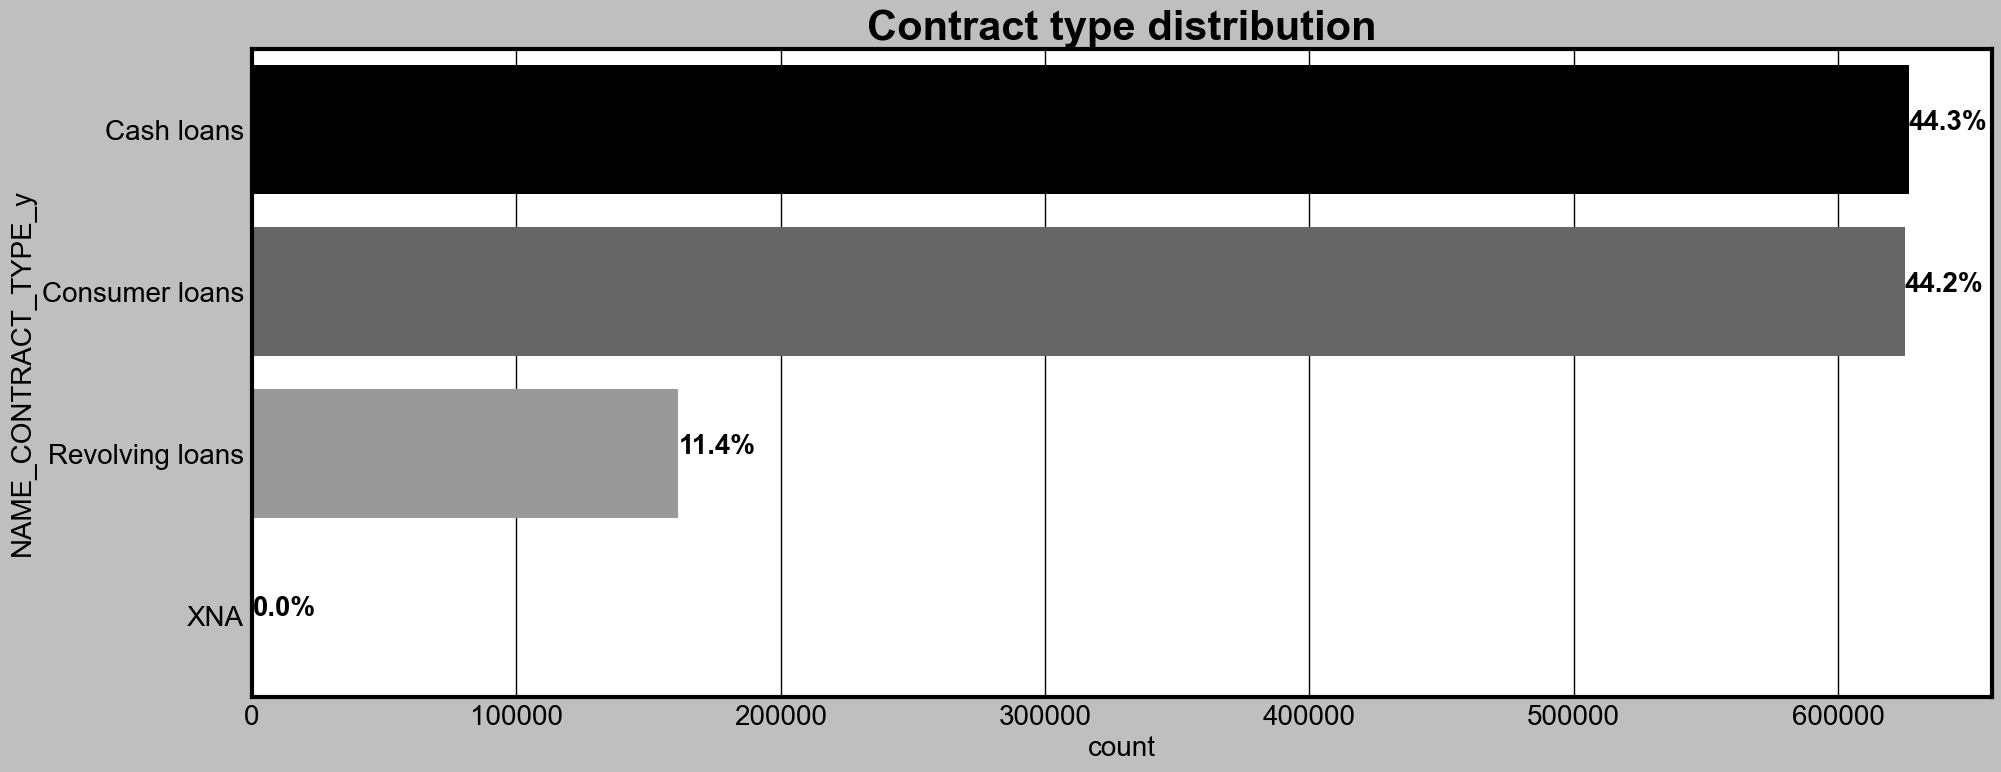

                                   -------------------------------------------------------


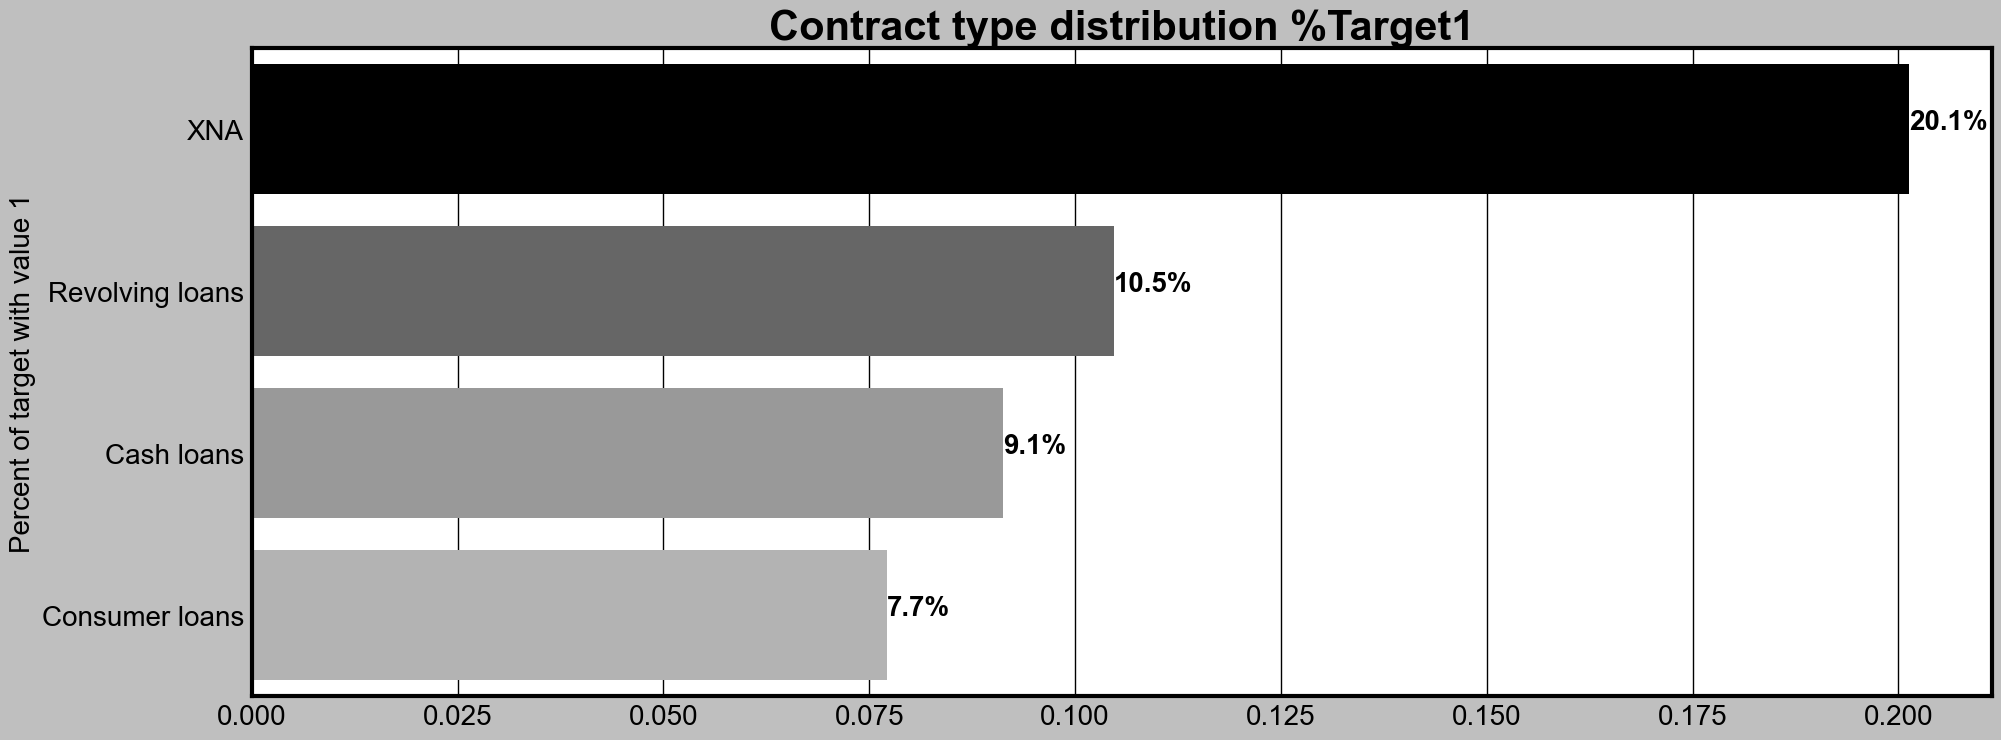

In [135]:
#NAME_CONTRACT_TYPE_y
plot_stat(application_prev_train, 'NAME_CONTRACT_TYPE_y',"Contract type distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_prev_train, 'NAME_CONTRACT_TYPE_y',"Contract type distribution %Target1")

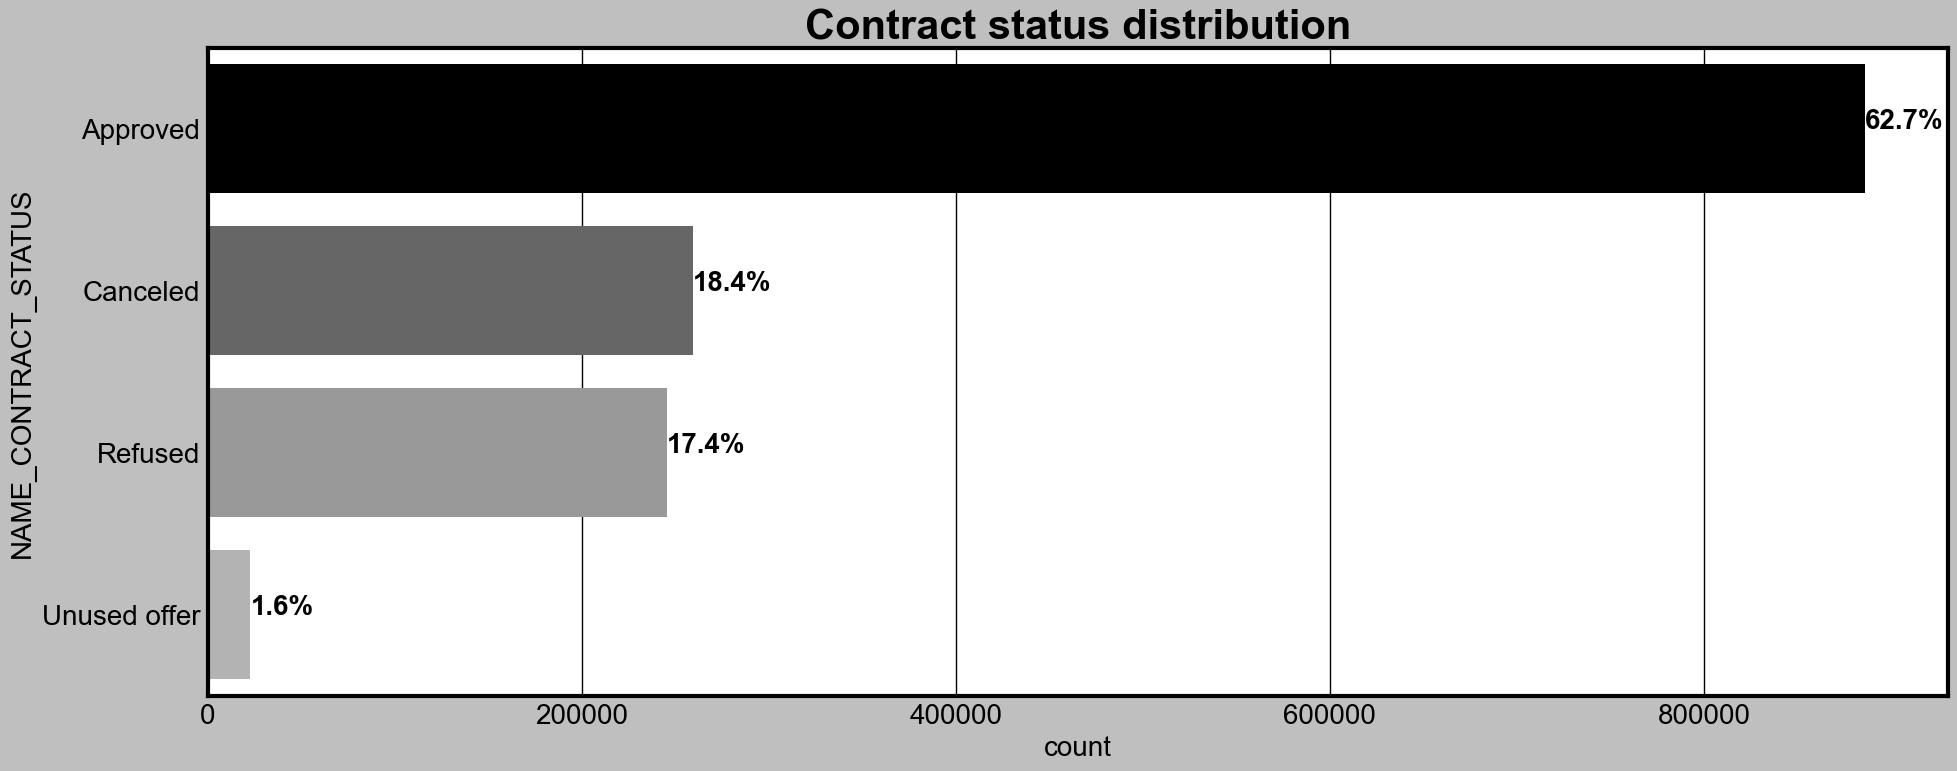

                                   -------------------------------------------------------


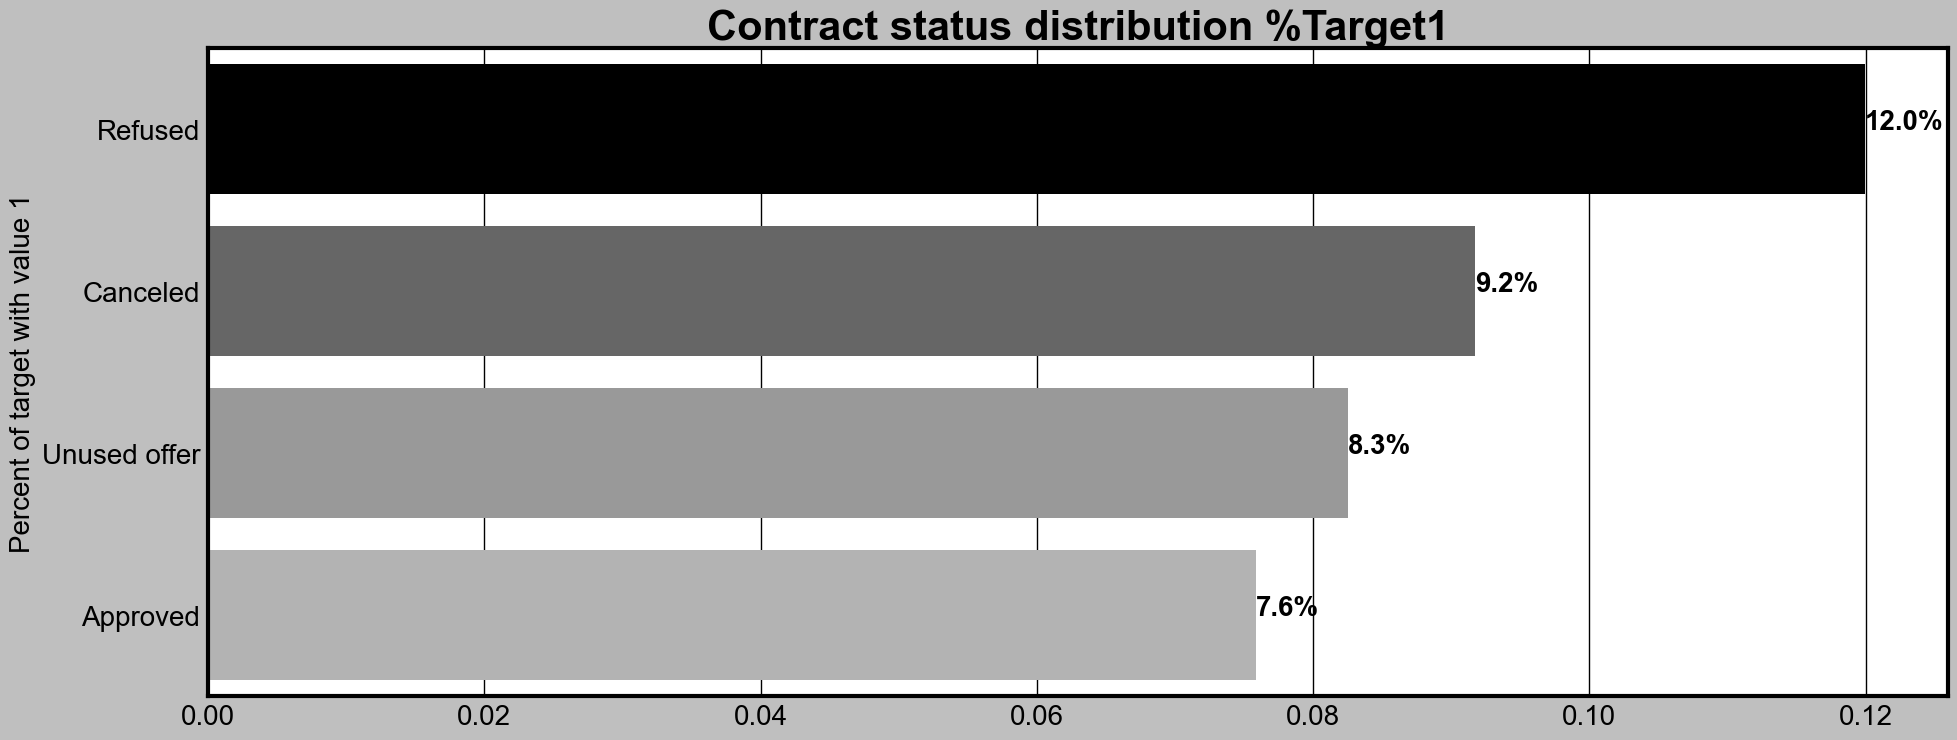

In [136]:
#NAME_CONTRACT_STATUS
plot_stat(application_prev_train, 'NAME_CONTRACT_STATUS',"Contract status distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_prev_train, 'NAME_CONTRACT_STATUS',"Contract status distribution %Target1")

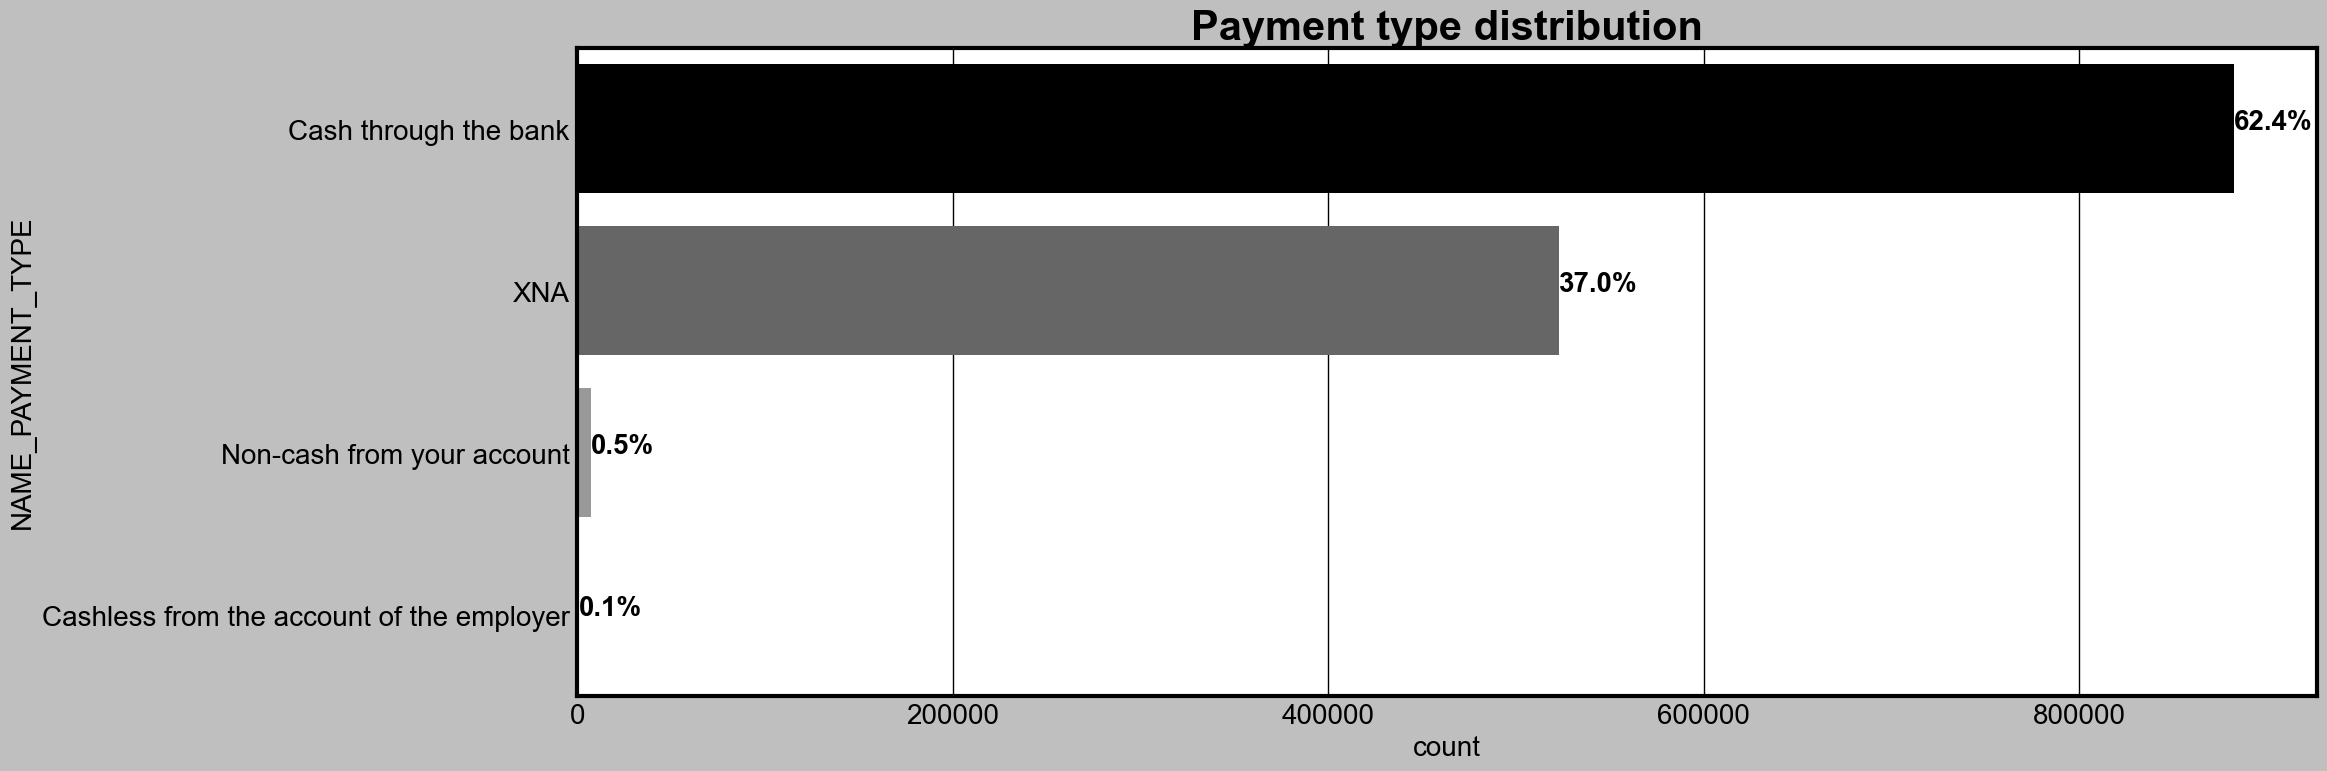

                                   -------------------------------------------------------


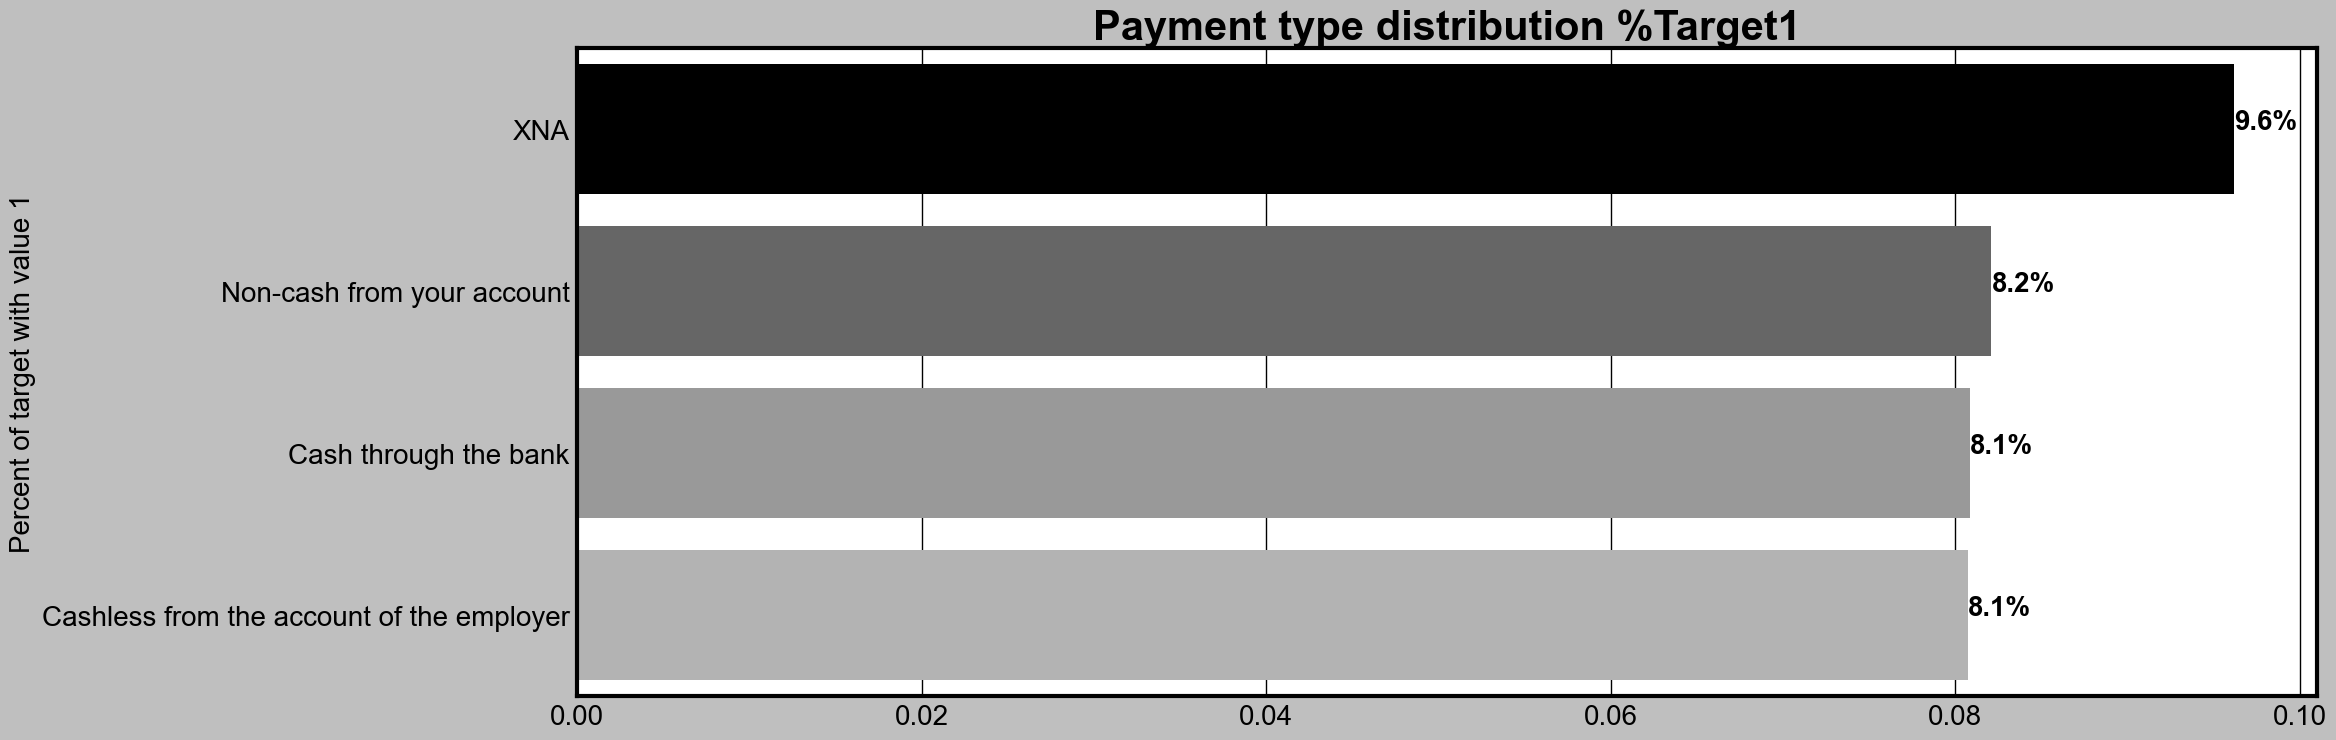

In [137]:
#NAME_PAYMENT_TYPE
plot_stat(application_prev_train, 'NAME_PAYMENT_TYPE',"Payment type distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_prev_train, 'NAME_PAYMENT_TYPE',"Payment type distribution %Target1")

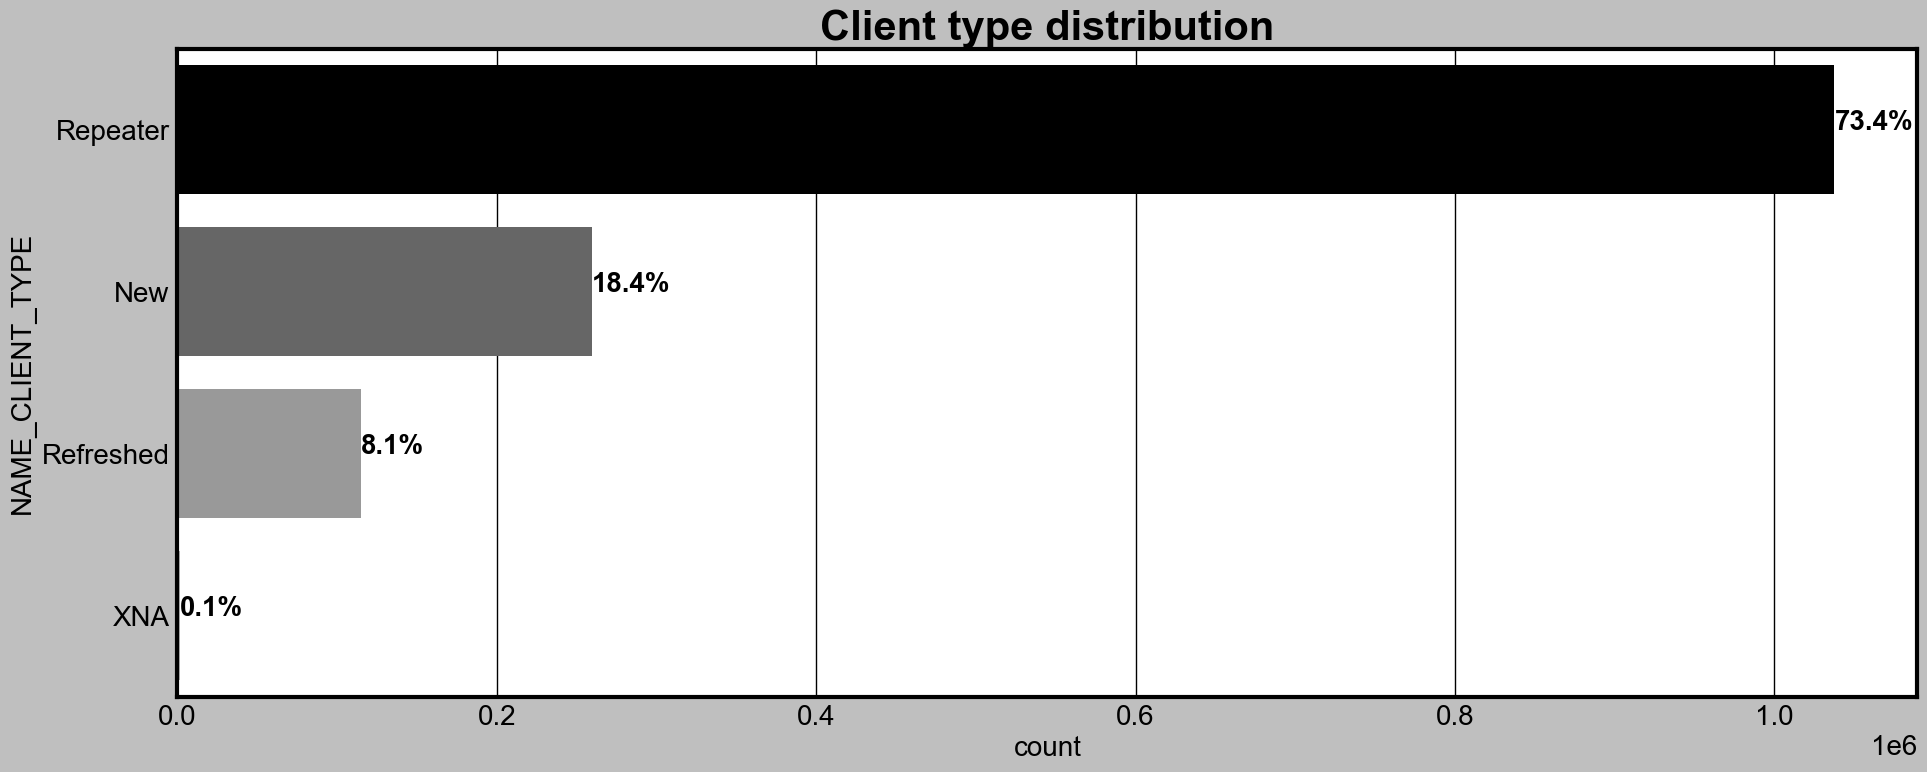

                                   -------------------------------------------------------


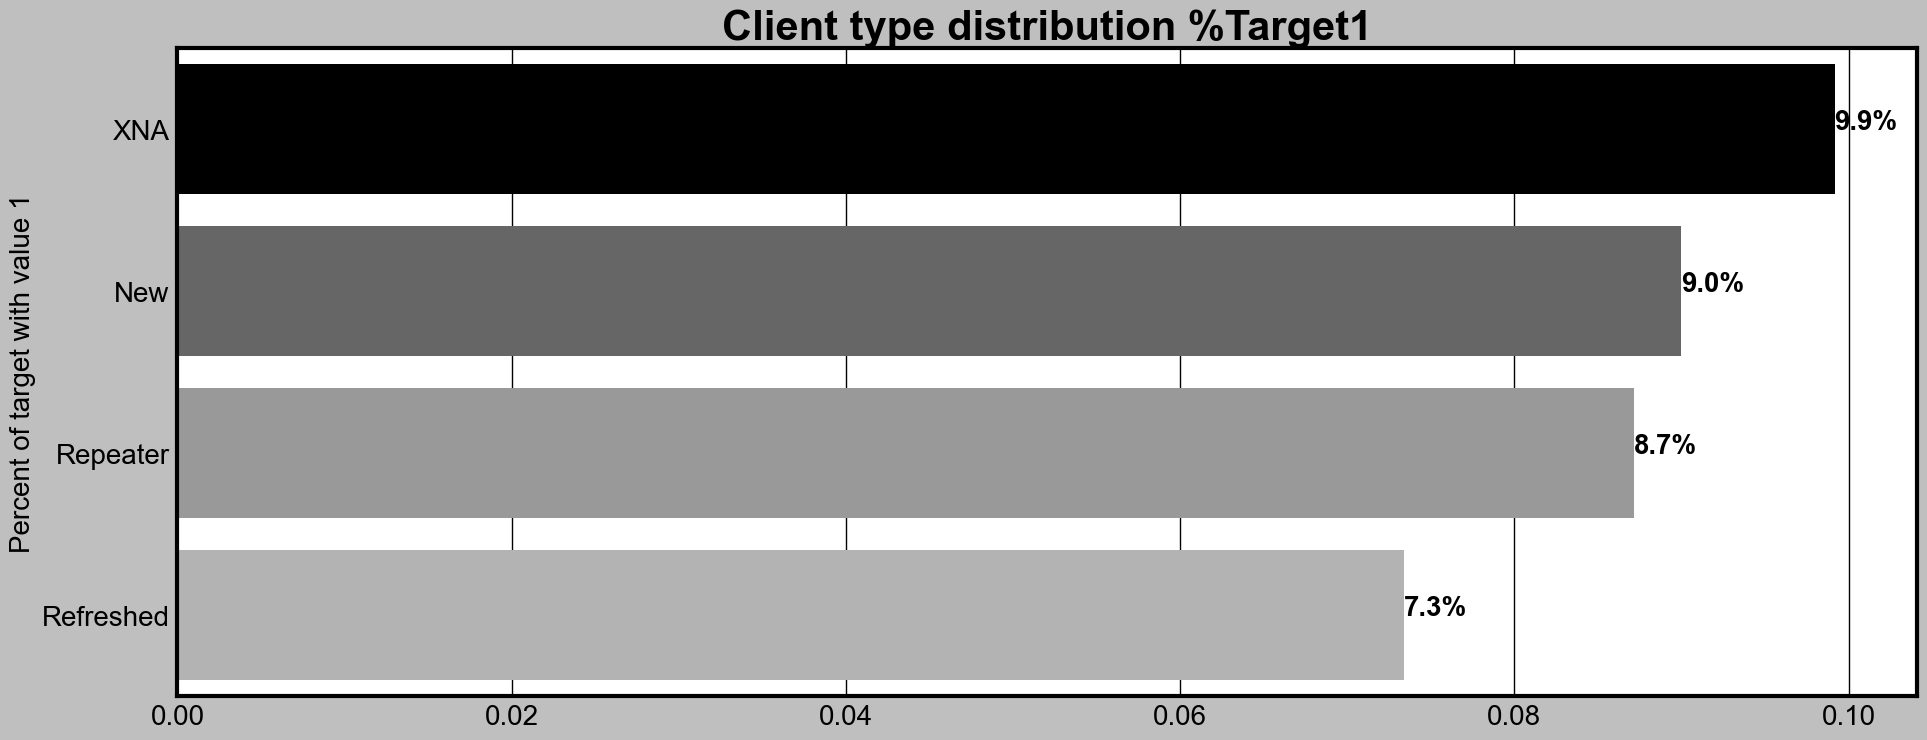

In [138]:
#NAME_CLIENT_TYPE
plot_stat(application_prev_train, 'NAME_CLIENT_TYPE',"Client type distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_prev_train, 'NAME_CLIENT_TYPE',"Client type distribution %Target1")

##### bureau_balance

In [139]:
df_bureau_balance = pd.read_csv('.//data//bureau_balance.csv').sort_values("SK_ID_BUREAU")
print(df_bureau_balance.shape)
df_bureau_balance.head(3)

(27299925, 3)


SK_ID_BUREAU  MONTHS_BALANCE STATUS
26079760       5001709              -7      C
26079756       5001709              -3      C
26079757       5001709              -4      C

Une explication pour chaque colonne :

1. **SK_ID_BUREAU**: ID du client dans le Bureau de crédit. C'est un identifiant unique pour l'entrée actuelle dans le rapport de crédit.
   
2. **MONTHS_BALANCE**: Le mois de l'enregistrement par rapport à l'application actuelle. Par exemple, `0` est le mois courant de la demande, `-1` est le mois précédent, etc. Cela permet d'indiquer la périodicité de l'enregistrement.

3. **STATUS**: Statut de l'emprunt mensuel. Il peut avoir plusieurs valeurs :
   - **0** : Pas de DPD (Days Past Due).
   - **1** : DPD 1-30, c'est-à-dire que le paiement est en retard de 1 à 30 jours.
   - **2** : DPD 31-60, c'est-à-dire que le paiement est en retard de 31 à 60 jours.
   - **3** : DPD 61-90.
   - **4** : DPD 91-120.
   - **5** : DPD 121+.
   - **C** : Le prêt a été remboursé ce mois-là.
   - **X** : Pas de prêt pour le mois.

Ces colonnes fournissent une représentation mensuelle des paiements antérieurs du client pour d'autres prêts, ce qui est utile pour évaluer le comportement de paiement historique du client.

In [140]:
df_bureau_balance['STATUS'].value_counts()

STATUS
C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: count, dtype: int64

##### POS_CASH_balance

In [141]:
df_POS_CASH_balance = pd.read_csv('.//data//POS_CASH_balance.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV'])
print(df_POS_CASH_balance.shape)
df_POS_CASH_balance.head(3)

(10001358, 8)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT   
2197888     1369693      100001             -53             4.0  \
4704415     1369693      100001             -54             4.0   
7167007     1369693      100001             -57             4.0   

         CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
2197888                    0.0            Completed       0           0  
4704415                    1.0               Active       0           0  
7167007                    4.0               Active       0           0

Une explication pour chaque colonne :

1. **SK_ID_PREV**: ID unique de l'application précédente du client chez Home Credit.

2. **SK_ID_CURR**: ID unique du client dans la base de données actuelle de Home Credit.

3. **MONTHS_BALANCE**: Le mois de l'enregistrement par rapport à l'application actuelle. Par exemple, `0` est le mois courant de la demande, `-1` est le mois précédent, etc. Cela sert à indiquer la périodicité de l'enregistrement.

4. **CNT_INSTALMENT**: Nombre total d'échéances (paiements) que le client avait à payer au moment de la demande précédente.

5. **CNT_INSTALMENT_FUTURE**: Nombre d'échéances restantes que le client devait payer au moment de la demande précédente.

6. **NAME_CONTRACT_STATUS**: Statut actuel du contrat (actif, terminé, etc.).

7. **SK_DPD**: DPD (Days Past Due) indique combien de jours le client est en retard sur le paiement à ce stade. C'est un indicateur de la performance de paiement du client.

8. **SK_DPD_DEF**: DPD (Days Past Due) avec tolérance, indiquant combien de jours le client est en retard sur le paiement, mais seulement pour les défaillances pour lesquelles le client pourrait subir des conséquences juridiques ou autres (par exemple, la saisie).

Ces colonnes offrent un aperçu détaillé des paiements précédents du client pour les prêts accordés par Home Credit, aidant à évaluer la fiabilité et la solvabilité du client.

In [143]:
# col_POS_CASH_balance = df_POS_CASH_balance.columns
# POS_CASH_balance_sup = [col for col in col_POS_CASH_balance  if col not in col_train]
# print('Nombre commun avec train :',len(POS_CASH_balance_sup))
# POS_CASH_balance_sup

##### credit_card_balance

In [144]:
df_credit_card_balance = pd.read_csv('.//data//credit_card_balance.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV'])
df_credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE   
520387      1489396      100006              -2          0.0  \
584804      1489396      100006              -1          0.0   
655566      1489396      100006              -5          0.0   
1347528     1489396      100006              -3          0.0   
1399895     1489396      100006              -4          0.0   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT   
520387                    270000                       NaN  \
584804                    270000                       NaN   
655566                    270000                       NaN   
1347528                   270000                       NaN   
1399895                   270000                       NaN   

         AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT   
520387                    0.0                         NaN  \
584804                    0.0                         NaN   
655566                    0.0                         NaN   
1347528                   0.0                         NaN   
1399895                   0.0                         NaN   

         AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY   
520387                        NaN                      0.0  \
584804                        NaN                      0.0   
655566                        NaN                      0.0   
1347528                       NaN                      0.0   
1399895                       NaN                      0.0   

         AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT   
520387                   NaN                        0.0  \
584804                   NaN                        0.0   
655566                   NaN                        0.0   
1347528                  NaN                        0.0   
1399895                  NaN                        0.0   

         AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE   
520387                        0.0            0.0                   0.0  \
584804                        0.0            0.0                   0.0   
655566                        0.0            0.0                   0.0   
1347528                       0.0            0.0                   0.0   
1399895                       0.0            0.0                   0.0   

         CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT   
520387                        NaN                     0  \
584804                        NaN                     0   
655566                        NaN                     0   
1347528                       NaN                     0   
1399895                       NaN                     0   

         CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT   
520387                          NaN                       NaN  \
584804                          NaN                       NaN   
655566                          NaN                       NaN   
1347528                         NaN                       NaN   
1399895                         NaN                       NaN   

         CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
520387                         0.0               Active       0           0  
584804                         0.0               Active       0           0  
655566                         0.0               Active       0           0  
1347528                        0.0               Active       0           0  
1399895                        0.0               Active       0           0

Une explication pour chaque colonne :

1. **SK_ID_PREV**: ID unique de l'application précédente du client chez Home Credit.
2. **SK_ID_CURR**: ID unique du client dans la base de données actuelle de Home Credit.
3. **MONTHS_BALANCE**: Le mois de l'enregistrement par rapport à l'application actuelle.
4. **AMT_BALANCE**: Solde actuel sur la carte de crédit au moment de l'enregistrement mensuel.
5. **AMT_CREDIT_LIMIT_ACTUAL**: Limite de crédit sur la carte pendant le mois de l'enregistrement.
6. **AMT_DRAWINGS_ATM_CURRENT**: Montant retiré ou utilisé au guichet automatique (ATM) pendant le mois courant.
7. **AMT_DRAWINGS_CURRENT**: Montant total retiré ou utilisé pendant le mois courant.
8. **AMT_DRAWINGS_OTHER_CURRENT**: Montant retiré ou utilisé pour d'autres raisons que les guichets automatiques ou les points de vente pendant le mois courant.
9. **AMT_DRAWINGS_POS_CURRENT**: Montant retiré ou utilisé aux points de vente pendant le mois courant.
10. **AMT_INST_MIN_REGULARITY**: Montant minimal régulièrement payé sur la carte.
11. **AMT_PAYMENT_CURRENT**: Montant du paiement actuel.
12. **AMT_PAYMENT_TOTAL_CURRENT**: Montant total payé pendant le mois courant.
13. **AMT_RECEIVABLE_PRINCIPAL**: Montant principal restant à recevoir.
14. **AMT_RECIVABLE**: Montant total restant à recevoir.
15. **AMT_TOTAL_RECEIVABLE**: Montant total encore dû.
16. **CNT_DRAWINGS_ATM_CURRENT**: Nombre de retraits ou d'utilisations au guichet automatique pendant le mois courant.
17. **CNT_DRAWINGS_CURRENT**: Nombre total de retraits ou d'utilisations pendant le mois courant.
18. **CNT_DRAWINGS_OTHER_CURRENT**: Nombre de retraits ou d'utilisations pour d'autres raisons que les guichets automatiques ou les points de vente pendant le mois courant.
19. **CNT_DRAWINGS_POS_CURRENT**: Nombre de retraits ou d'utilisations aux points de vente pendant le mois courant.
20. **CNT_INSTALMENT_MATURE_CUM**: Nombre total de versements payés jusqu'à la date de l'enregistrement.
21. **NAME_CONTRACT_STATUS**: Statut actuel du contrat (par exemple, actif, terminé, etc.).
22. **SK_DPD**: DPD (Days Past Due) indiquant combien de jours le client est en retard sur le paiement.
23. **SK_DPD_DEF**: DPD avec tolérance, indiquant combien de jours le client est en retard, mais seulement pour les défaillances où le client pourrait subir des conséquences.

Ces colonnes offrent un aperçu détaillé de l'utilisation des cartes de crédit du client et de son historique de paiement, aidant à évaluer son comportement financier et sa fiabilité.

##### installments_payments

In [145]:
df_installments_payments = pd.read_csv('.//data//installments_payments.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV'])
df_installments_payments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION   
1478621     1369693      100001                     1.0  \
2568722     1369693      100001                     1.0   
2624024     1369693      100001                     2.0   
3458712     1369693      100001                     1.0   
1761012     1851984      100001                     1.0   

         NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT   
1478621                      1          -1709.0             -1715.0  \
2568722                      2          -1679.0             -1715.0   
2624024                      4          -1619.0             -1628.0   
3458712                      3          -1649.0             -1660.0   
1761012                      2          -2916.0             -2916.0   

         AMT_INSTALMENT  AMT_PAYMENT  
1478621         3951.00      3951.00  
2568722         3951.00      3951.00  
2624024        17397.90     17397.90  
3458712         3951.00      3951.00  
1761012         3982.05      3982.05

Une explication pour chaque colonne :

1. **SK_ID_PREV**: ID unique de la précédente demande de crédit du client chez Home Credit.
2. **SK_ID_CURR**: ID unique du client dans la base de données actuelle de Home Credit.
3. **NUM_INSTALMENT_VERSION**: Indique un changement dans l'une des conditions de paiement (client peut avoir une ou plusieurs périodes de remboursement).
4. **NUM_INSTALMENT_NUMBER**: Indique le numéro de l'échéance dans la séquence.
5. **DAYS_INSTALMENT**: Combien de jours avant l'application actuelle le client devait payer l'échéance.
6. **DAYS_ENTRY_PAYMENT**: Combien de jours avant l'application actuelle le client a effectivement payé l'échéance.
7. **AMT_INSTALMENT**: Montant de l'échéance que le client devait payer.
8. **AMT_PAYMENT**: Montant réel que le client a payé.

Ces colonnes fournissent des informations sur les paiements précédents du client pour ses crédits antérieurs, permettant d'évaluer le comportement de paiement du client et sa régularité dans le remboursement de ses dettes.

##### sample_submission

In [146]:
df_sample_submission = pd.read_csv('.//data//sample_submission.csv')
df_sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SK_ID_CURR  48744 non-null  int64  
 1   TARGET      48744 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 761.8 KB


## 2. Merging et agrégations des données <a class="anchor" id="partie2"></a>

Indispensable d'avoir une réflexion et une étape d'agrégation des données. Des informations complémentaires aux principaux fichiers peuvent en effet avoir un impact dans nos modélisations. Voyons comment traiter l'ensemble des jeux de données…

In [151]:
#Créer un ensemble de données simple en fusionnant application_train et application_test
data = pd.concat([df_train, df_test], axis=0)


In [153]:
data.sort_values('SK_ID_CURR')

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
0           100001     NaN         Cash loans           F            N  \
0           100002     1.0         Cash loans           M            N   
1           100003     0.0         Cash loans           F            N   
2           100004     0.0    Revolving loans           M            Y   
1           100005     NaN         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251     0.0         Cash loans           M            N   
307507      456252     0.0         Cash loans           F            N   
307508      456253     0.0         Cash loans           F            N   
307509      456254     1.0         Cash loans           F            N   
307510      456255     0.0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT   
0                    Y             0          135000.0    568800.0  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
1                    Y             0           99000.0    222768.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE   
0           20560.5         450000.0   Unaccompanied               Working  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
1           17370.0         180000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS   
0                    Higher education               Married  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
1       Secondary / secondary special               Married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH   
0       House / apartment                    0.018850      -19241  \
0       House / apartment                    0.018801        9461   
1       House / apartment                    0.003541       16765   
2       House / apartment                    0.010032       19046   
1       House / apartment                    0.035792      -18064   
...                   ...                         ...         ...   
307506       With parents                    0.032561        9327   
307507  House / apartment       

Les deux jeux de données ont exactement le même format avec une seule différence, la TARGET dispo dans le train.

In [155]:
print('Train:' + str(df_train.shape))
print('Test:' + str(df_test.shape))
print('>>> Data:' + str(data.shape))

Train:(307511, 123)
Test:(48744, 122)
>>> Data:(356255, 123)


In [157]:
#Verification
data.TARGET.isna().sum()


48744

In [160]:
sum(data.SK_ID_CURR[data.TARGET.isna()] == df_test.SK_ID_CURR)

48744

In [161]:
sum(data.SK_ID_CURR.isin(df_test.SK_ID_CURR)) == len(df_test) 

True

A partir du fichier bureau.csv, il est possible d'extraire un historique sur les précédents crédits enregistrés par les clients. Il peut donc être intéressant d'enrichir l'échantillon avec ce type de données.

In [163]:
display(df_bureau.head())
display(df_bureau.shape)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT   
248484      100001       5896630        Closed      currency 1         -857  \
248485      100001       5896631        Closed      currency 1         -909   
248486      100001       5896632        Closed      currency 1         -879   
248487      100001       5896633        Closed      currency 1        -1572   
248488      100001       5896634        Active      currency 1         -559   

        CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT   
248484                   0               -492.0             -553.0  \
248485                   0               -179.0             -877.0   
248486                   0               -514.0             -544.0   
248487                   0              -1329.0            -1328.0   
248488                   0                902.0                NaN   

        AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM   
248484                     NaN                   0        112500.0  \
248485                     NaN                   0        279720.0   
248486                     NaN                   0         91620.0   
248487                     NaN                   0         85500.0   
248488                     NaN                   0        337680.0   

        AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE   
248484                  0.0                   0.0                     0.0  \
248485                  0.0                   0.0                     0.0   
248486                  0.0                   0.0                     0.0   
248487                  0.0                   0.0                     0.0   
248488             113166.0                   0.0                     0.0   

            CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
248484  Consumer credit                -155          0.0  
248485  Consumer credit                -155          0.0  
248486  Consumer credit                -155          0.0  
248487  Consumer credit                -155          0.0  
248488  Consumer credit                  -6       4630.5

(1716428, 17)

In [166]:
# Nombre total de crédits précédents pris par chaque client
previous_loan_counts = df_bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(
                                       columns = {'SK_ID_BUREAU': 'NOMBRE_PRETS_PRECEDENTS'})
previous_loan_counts.head()


SK_ID_CURR  NOMBRE_PRETS_PRECEDENTS
0      100001                        7
1      100002                        8
2      100003                        4
3      100004                        2
4      100005                        3

In [167]:
#Merge 
data = data.merge(previous_loan_counts, on='SK_ID_CURR', how='left')
data.shape

(356255, 124)

**bureau_balance**

In [169]:
display(df_bureau_balance.head())
display(df_bureau_balance.shape)

SK_ID_BUREAU  MONTHS_BALANCE STATUS
26079760       5001709              -7      C
26079756       5001709              -3      C
26079757       5001709              -4      C
26079758       5001709              -5      C
26079759       5001709              -6      C

(27299925, 3)

In [173]:
# Calcul des soldes mensuels moyens des crédits précédents enregistrés dans le Bureau de Crédit.
bureau_bal_mean = df_bureau_balance[['SK_ID_BUREAU','MONTHS_BALANCE']].groupby('SK_ID_BUREAU', as_index=False).mean().rename(columns = 
                                        {'MONTHS_BALANCE': 'MONTHS_BALANCE_MEAN'})
bureau_bal_mean.head()


SK_ID_BUREAU  MONTHS_BALANCE_MEAN
0       5001709                -48.0
1       5001710                -41.0
2       5001711                 -1.5
3       5001712                 -9.0
4       5001713                -10.5

In [174]:
bureau_full = df_bureau.merge(bureau_bal_mean, on='SK_ID_BUREAU', how='left')
bureau_full.drop('SK_ID_BUREAU', axis=1, inplace=True)
display(bureau_full.head())
display(bureau_full.shape)

SK_ID_CURR CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  CREDIT_DAY_OVERDUE   
0      100001        Closed      currency 1         -857                   0  \
1      100001        Closed      currency 1         -909                   0   
2      100001        Closed      currency 1         -879                   0   
3      100001        Closed      currency 1        -1572                   0   
4      100001        Active      currency 1         -559                   0   

   DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE   
0               -492.0             -553.0                     NaN  \
1               -179.0             -877.0                     NaN   
2               -514.0             -544.0                     NaN   
3              -1329.0            -1328.0                     NaN   
4                902.0                NaN                     NaN   

   CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT   
0                   0        112500.0                  0.0  \
1                   0        279720.0                  0.0   
2                   0         91620.0                  0.0   
3                   0         85500.0                  0.0   
4                   0        337680.0             113166.0   

   AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE   
0                   0.0                     0.0  Consumer credit  \
1                   0.0                     0.0  Consumer credit   
2                   0.0                     0.0  Consumer credit   
3                   0.0                     0.0  Consumer credit   
4                   0.0                     0.0  Consumer credit   

   DAYS_CREDIT_UPDATE  AMT_ANNUITY  MONTHS_BALANCE_MEAN  
0                -155          0.0                -14.0  
1                -155          0.0                -14.5  
2                -155          0.0                -14.0  
3                -155          0.0                -25.5  
4                  -6       4630.5                 -9.0

(1716428, 17)

In [176]:

# Sélection des colonnes numériques
bureau_numeric = bureau_full.select_dtypes(include=[np.number])

# Calcul de la moyenne et ajout du préfixe
bureau_mean = bureau_numeric.groupby('SK_ID_CURR', as_index=False).mean().add_prefix('PREV_BUR_MEAN_')
bureau_mean = bureau_mean.rename(columns = {'PREV_BUR_MEAN_SK_ID_CURR' : 'SK_ID_CURR'})
bureau_mean.shape


(305811, 14)

In [177]:
# Fusionner toutes ces caractéristiques avec notre échantillon de données
data = data.merge(bureau_mean, on='SK_ID_CURR', how='left')
data.shape

(356255, 137)

Notons l'enrichissement avec 13 nouvelles features, créées et ajoutées à notre ensemble de données application train/test appelé data

**previous_application**

In [178]:
display(df_previous_application.head())
display(df_previous_application.shape)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY   
201668      1369693      100001     Consumer loans     3951.000  \
892077      1038818      100002     Consumer loans     9251.775   
575941      1810518      100003         Cash loans    98356.995   
1223745     2396755      100003     Consumer loans     6737.310   
1021650     2636178      100003     Consumer loans    64567.665   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE   
201668           24835.5     23787.0            2520.0          24835.5  \
892077          179055.0    179055.0               0.0         179055.0   
575941          900000.0   1035882.0               NaN         900000.0   
1223745          68809.5     68053.5            6885.0          68809.5   
1021650         337500.0    348637.5               0.0         337500.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START   
201668                      FRIDAY                       13  \
892077                    SATURDAY                        9   
575941                      FRIDAY                       12   
1223745                   SATURDAY                       15   
1021650                     SUNDAY                       17   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY   
201668                            Y                       1  \
892077                            Y                       1   
575941                            Y                       1   
1223745                           Y                       1   
1021650                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED   
201668            0.104326                    NaN                       NaN  \
892077            0.000000                    NaN                       NaN   
575941                 NaN                    NaN                       NaN   
1223745           0.100061                    NaN                       NaN   
1021650           0.000000                    NaN                       NaN   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION   
201668                     XAP             Approved          -1740  \
892077                     XAP             Approved           -606   
575941                     XNA             Approved           -746   
1223745                    XAP             Approved          -2341   
1021650                    XAP             Approved           -828   

             NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE   
201668   Cash through the bank                XAP          Family  \
892077                     XNA                XAP             NaN   
575941                     XNA                XAP   Unaccompanied   
1223745  Cash through the bank                XAP          Family   
1021650  Cash through the bank                XAP          Family   

        NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO   
201668         Refreshed                Mobile            POS  \
892077               New              Vehicles            POS   
575941          Repeater                   XNA           Cash   
1223745        Refreshed  Consumer Electronics            POS   
1021650        Refreshed             Furniture            POS   

        NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA   
201668                XNA             Country-wide                23  \
892077                XNA                    Stone               500   
575941             x-sell  Credit and cash offices                -1   
1223745               XNA             Country-wide               200   
1021650               XNA                    Stone              1400   

         NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP   
201668           Connectivity          8.0             high  \
892077        Auto technology         24.0       low_normal   
575941                    XNA         12.0       low_normal   
1223745  C

(1670214, 37)

In [179]:
#Check 
len(df_previous_application.SK_ID_CURR.isin(data.SK_ID_CURR)) == len(df_previous_application)

True

Comme précédemment, commençons par quantifier le nombre de demandes précédentes des clients au crédit immobilier et ajoutons cette données à l'échantillon.

In [180]:
# Nombre de demandes précédentes des clients à Home Credit
previous_application_counts = df_previous_application.groupby('SK_ID_CURR', 
                                                           as_index=False)['SK_ID_PREV'].count().rename(
                                                           columns = {'SK_ID_PREV': 'PREVIOUS_APPLICATION_COUNT'})
previous_application_counts.head()




SK_ID_CURR  PREVIOUS_APPLICATION_COUNT
0      100001                           1
1      100002                           1
2      100003                           3
3      100004                           1
4      100005                           2

In [181]:
#Merge cette nouvelle colonne dans notre échantillon de données

data = data.merge(previous_application_counts, on='SK_ID_CURR', how='left')
data.shape

(356255, 138)

**credit_card_balance**


In [182]:
display(df_credit_card_balance.head())
display(df_credit_card_balance.shape)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE   
520387      1489396      100006              -2          0.0  \
584804      1489396      100006              -1          0.0   
655566      1489396      100006              -5          0.0   
1347528     1489396      100006              -3          0.0   
1399895     1489396      100006              -4          0.0   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT   
520387                    270000                       NaN  \
584804                    270000                       NaN   
655566                    270000                       NaN   
1347528                   270000                       NaN   
1399895                   270000                       NaN   

         AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT   
520387                    0.0                         NaN  \
584804                    0.0                         NaN   
655566                    0.0                         NaN   
1347528                   0.0                         NaN   
1399895                   0.0                         NaN   

         AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY   
520387                        NaN                      0.0  \
584804                        NaN                      0.0   
655566                        NaN                      0.0   
1347528                       NaN                      0.0   
1399895                       NaN                      0.0   

         AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT   
520387                   NaN                        0.0  \
584804                   NaN                        0.0   
655566                   NaN                        0.0   
1347528                  NaN                        0.0   
1399895                  NaN                        0.0   

         AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE   
520387                        0.0            0.0                   0.0  \
584804                        0.0            0.0                   0.0   
655566                        0.0            0.0                   0.0   
1347528                       0.0            0.0                   0.0   
1399895                       0.0            0.0                   0.0   

         CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT   
520387                        NaN                     0  \
584804                        NaN                     0   
655566                        NaN                     0   
1347528                       NaN                     0   
1399895                       NaN                     0   

         CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT   
520387                          NaN                       NaN  \
584804                          NaN                       NaN   
655566                          NaN                       NaN   
1347528                         NaN                       NaN   
1399895                         NaN                       NaN   

         CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
520387                         0.0               Active       0           0  
584804                         0.0               Active       0           0  
655566                         0.0               Active       0           0  
1347528                        0.0               Active       0           0  
1399895                        0.0               Active       0           0

(3840312, 23)

In [184]:
df_credit_card_balance.drop('SK_ID_CURR', axis=1, inplace=True)

In [186]:
credit_card_balance_numeric = df_credit_card_balance.select_dtypes(include=[np.number])

credit_card_balance_mean = credit_card_balance_numeric.groupby('SK_ID_PREV', as_index=False).mean().add_prefix('CARD_MEAN_')
credit_card_balance_mean.rename(columns = {'CARD_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace=True)
credit_card_balance_mean.shape

(104307, 21)

In [188]:
#Merge avec previous_application
previous_application = df_previous_application.merge(credit_card_balance_mean, on='SK_ID_PREV', how='left')
previous_application.shape

(1670214, 57)

**installments_payments**

In [189]:
display(df_installments_payments.head())
display(df_installments_payments.shape)

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION   
1478621     1369693      100001                     1.0  \
2568722     1369693      100001                     1.0   
2624024     1369693      100001                     2.0   
3458712     1369693      100001                     1.0   
1761012     1851984      100001                     1.0   

         NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT   
1478621                      1          -1709.0             -1715.0  \
2568722                      2          -1679.0             -1715.0   
2624024                      4          -1619.0             -1628.0   
3458712                      3          -1649.0             -1660.0   
1761012                      2          -2916.0             -2916.0   

         AMT_INSTALMENT  AMT_PAYMENT  
1478621         3951.00      3951.00  
2568722         3951.00      3951.00  
2624024        17397.90     17397.90  
3458712         3951.00      3951.00  
1761012         3982.05      3982.05

(13605401, 8)

In [190]:
df_installments_payments.drop('SK_ID_CURR', axis=1, inplace=True)


In [191]:
install_pay_mean = df_installments_payments.groupby('SK_ID_PREV', as_index=False).mean().add_prefix('INSTALL_MEAN_')
install_pay_mean.rename(columns = {'INSTALL_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace=True)
install_pay_mean.shape

(997752, 7)

In [192]:
#Merge avec previous_application
previous_application = previous_application.merge(install_pay_mean, on='SK_ID_PREV', how='left')
previous_application.shape

(1670214, 63)

**POS_CASH_balance**

In [193]:
display(df_POS_CASH_balance.head())
display(df_POS_CASH_balance.shape)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT   
2197888     1369693      100001             -53             4.0  \
4704415     1369693      100001             -54             4.0   
7167007     1369693      100001             -57             4.0   
7823681     1369693      100001             -55             4.0   
8789081     1369693      100001             -56             4.0   

         CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
2197888                    0.0            Completed       0           0  
4704415                    1.0               Active       0           0  
7167007                    4.0               Active       0           0  
7823681                    2.0               Active       0           0  
8789081                    3.0               Active       0           0

(10001358, 8)

In [194]:
df_POS_CASH_balance.drop('SK_ID_CURR', axis=1, inplace=True)


In [197]:
POS_mean =df_installments_payments.groupby('SK_ID_PREV', as_index=False).mean().add_prefix('POS_MEAN_')
POS_mean.rename(columns = {'POS_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace=True)
POS_mean.shape

(997752, 7)

In [198]:
#Merge avec previous_application
previous_application = previous_application.merge(POS_mean, on='SK_ID_PREV', how='left')
previous_application.shape

(1670214, 69)

Retour sur previous_application pour assembles les lignes d'observation selon 'SK_ID_CURR'

In [199]:
display(previous_application.head())
display(previous_application.shape)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION   
0     1369693      100001     Consumer loans     3951.000          24835.5  \
1     1038818      100002     Consumer loans     9251.775         179055.0   
2     1810518      100003         Cash loans    98356.995         900000.0   
3     2396755      100003     Consumer loans     6737.310          68809.5   
4     2636178      100003     Consumer loans    64567.665         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START   
0     23787.0            2520.0          24835.5                     FRIDAY  \
1    179055.0               0.0         179055.0                   SATURDAY   
2   1035882.0               NaN         900000.0                     FRIDAY   
3     68053.5            6885.0          68809.5                   SATURDAY   
4    348637.5               0.0         337500.0                     SUNDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT   
0                       13                           Y  \
1                        9                           Y   
2                       12                           Y   
3                       15                           Y   
4                       17                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY   
0                       1           0.104326                    NaN  \
1                       1           0.000000                    NaN   
2                       1                NaN                    NaN   
3                       1           0.100061                    NaN   
4                       1           0.000000                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS   
0                       NaN                    XAP             Approved  \
1                       NaN                    XAP             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XAP             Approved   
4                       NaN                    XAP             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE   
0          -1740  Cash through the bank                XAP          Family  \
1           -606                    XNA                XAP             NaN   
2           -746                    XNA                XAP   Unaccompanied   
3          -2341  Cash through the bank                XAP          Family   
4           -828  Cash through the bank                XAP          Family   

  NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE   
0        Refreshed                Mobile            POS               XNA  \
1              New              Vehicles            POS               XNA   
2         Repeater                   XNA           Cash            x-sell   
3        Refreshed  Consumer Electronics            POS               XNA   
4        Refreshed             Furniture            POS               XNA   

              CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY   
0             Country-wide                23          Connectivity  \
1                    Stone               500       Auto technology   
2  Credit and cash offices                -1                   XNA   
3             Country-wide               200  Consumer electronics   
4                    Stone              1400             Furniture   

   CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION   
0          8.0             high     POS mobile with interest  \
1         24.0       low_normal      POS other with interest   
2         12.0       low_normal             Cash X-Sell: low   
3         12.0           middle  POS household with interest   
4          6.0           middle   POS industry with interest   

   DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION   
0            365243.0     

(1670214, 69)

In [201]:

# Sélection des colonnes numériques
prev_appl_numeric = previous_application.select_dtypes(include=[np.number])

# Calcul de la moyenne et ajout du préfixe
prev_appl_mean = prev_appl_numeric.groupby('SK_ID_CURR', as_index=False).mean().add_prefix('PREV_APPL_MEAN_')
prev_appl_mean.rename(columns = {'PREV_APPL_MEAN_SK_ID_CURR' : 'SK_ID_CURR'}, inplace=True)

# Suppression de la colonne non nécessaire
prev_appl_mean = prev_appl_mean.drop('PREV_APPL_MEAN_SK_ID_PREV', axis=1)


In [202]:
display(prev_appl_mean.head())
display(prev_appl_mean.shape)

SK_ID_CURR  PREV_APPL_MEAN_AMT_ANNUITY  PREV_APPL_MEAN_AMT_APPLICATION   
0      100001                    3951.000                        24835.50  \
1      100002                    9251.775                       179055.00   
2      100003                   56553.990                       435436.50   
3      100004                    5357.250                        24282.00   
4      100005                    4813.200                        22308.75   

   PREV_APPL_MEAN_AMT_CREDIT  PREV_APPL_MEAN_AMT_DOWN_PAYMENT   
0                   23787.00                           2520.0  \
1                  179055.00                              0.0   
2                  484191.00                           3442.5   
3                   20106.00                           4860.0   
4                   20076.75                           4464.0   

   PREV_APPL_MEAN_AMT_GOODS_PRICE  PREV_APPL_MEAN_HOUR_APPR_PROCESS_START   
0                         24835.5                               13.000000  \
1                        179055.0                                9.000000   
2                        435436.5                               14.666667   
3                         24282.0                                5.000000   
4                         44617.5                               10.500000   

   PREV_APPL_MEAN_NFLAG_LAST_APPL_IN_DAY  PREV_APPL_MEAN_RATE_DOWN_PAYMENT   
0                                    1.0                          0.104326  \
1                                    1.0                          0.000000   
2                                    1.0                          0.050030   
3                                    1.0                          0.212008   
4                                    1.0                          0.108964   

   PREV_APPL_MEAN_RATE_INTEREST_PRIMARY   
0                                   NaN  \
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

   PREV_APPL_MEAN_RATE_INTEREST_PRIVILEGED  PREV_APPL_MEAN_DAYS_DECISION   
0                                      NaN                       -1740.0  \
1                                      NaN                        -606.0   
2                                      NaN                       -1305.0   
3                                      NaN                        -815.0   
4                                      NaN                        -536.0   

   PREV_APPL_MEAN_SELLERPLACE_AREA  PREV_APPL_MEAN_CNT_PAYMENT   
0                             23.0                         8.0  \
1                            500.0                        24.0   
2                            533.0                        10.0   
3                             30.0                         4.0   
4                             18.0                        12.0   

   PREV_APPL_MEAN_DAYS_FIRST_DRAWING  PREV_APPL_MEAN_DAYS_FIRST_DUE   
0                           365243.0                   -1709.000000  \
1                           365243.0                    -565.000000   
2                           365243.0                   -1274.333333   
3                           365243.0                    -784.000000   
4                           365243.0                    -706.000000   

   PREV_APPL_MEAN_DAYS_LAST_DUE_1ST_VERSION  PREV_APPL_MEAN_DAYS_LAST_DUE   
0                              -1499.000000                  -1619.000000  \
1                                125.000000                    -25.000000   
2                              -1004.333333                  -1054.333333   
3                               -694.000000                   -724.000000   
4                               -376.000000                   -466.000000   

   PREV_APPL_MEAN_DAYS_TERMINATION  PREV_APPL_MEAN_NFLAG_INSURED_ON_APPROVAL   
0                     -1612.000000                                  0.000000  \
1                       -17.000000                    

(338857, 52)

In [203]:
#data
print('data shape', data.shape)

data shape (356255, 138)


In [204]:
# merge avec notre échantillon de données
data = data.merge(prev_appl_mean, on='SK_ID_CURR', how='left')
#data.set_index('SK_ID_CURR', inplace=True)
display(data.head())
display(data.shape)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
0      100002     1.0         Cash loans           M            N  \
1      100003     0.0         Cash loans           F            N   
2      100004     0.0    Revolving loans           M            Y   
3      100006     0.0         Cash loans           F            N   
4      100007     0.0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY   
0               Y             0          202500.0    406597.5      24700.5  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE   
0         351000.0   Unaccompanied          Working  \
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE   
0  Secondary / secondary special  Single / not married  House / apartment  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION   
0                    0.018801        9461         -637.0            -3648.0  \
1                    0.003541       16765        -1188.0            -1186.0   
2                    0.010032       19046         -225.0            -4260.0   
3                    0.008019       19005        -3039.0            -9833.0   
4                    0.028663       19932        -3038.0            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE   
0            -2120          NaN           1               1                0  \
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS   
0                 1           1           0        Laborers              1.0  \
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY   
0                     2                            2  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START   
0                  WEDNESDAY                       10  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION   
0                           0                           0  \
1                           0                           0   
2                        

(356255, 189)

50 nouvelles features ont été ajoutées à l'échantillon suite aux opérations de merging.

## 3.  Features engineering 

**Variable 'CODE_GENDER'**

Le jeu d'entrainement contient seulement 4 valeurs nommés 'XNA' pour la colonne renseignant le genre. Ces emprunts sont supprimés

In [ ]:
# Supprime les individus dont le genre est 'XNA'
df_combined = df_combined[df_combined['CODE_GENDER'] != 'XNA']

**Variable 'NAME_INCOME_TYPE'**

La colonne 'NAME_INCOME_TYPE' prend la valeur 'Maternity leave' uniquement pour le jeu d'entrainement , et pour seulement 5 emprunteurs. Les lignes renseignant ces emprunts sont supprimées

In [ ]:
# Supprime les individus dont 'NAME_INCOME_TYPE' vient d'un congé maternité
df_combined = df_combined[df_combined['NAME_INCOME_TYPE'] != 'Maternity leave']

**Variable 'NAME_FAMILY_STATUS'**

De la même manière, pour la colonne NAME_FAMILY_STATUS, il y a seulement deux fois la valeur Unknown et uniquement pour le jeu d'entrainement. Les lignes correspondantes sont supprimées

In [ ]:
# Supprime les individus dont la statut familial est inconnu
df_combined = df_combined[df_combined['NAME_FAMILY_STATUS'] != 'Unknown']
print(f"{df_combined.shape}")

In [ ]:
# Create an entity set
es = ft.EntitySet(id='applications')